# (Archive for imports)

In [3]:
# from datetime import datetime
# from matplotlib import dates
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from statsmodels.tsa.statespace.tools import diff
# from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
# from pandas.plotting import lag_plot
# from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
# from pmdarima import auto_arima
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Standard imports 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [2]:
cd C:\Users\tammo\OneDrive\Desktop\FC

C:\Users\tammo\OneDrive\Desktop\FC


In [3]:
pwd

'C:\\Users\\tammo\\OneDrive\\Desktop\\FC'

In [364]:
# WITHOUT INDEX COLUMN 
df = pd.read_excel('Daten_ForecastingChallenge - Q42017.xlsx').drop('Unnamed: 0',axis=1)

In [312]:
# WITH INDEX COLUMN
# df = pd.read_excel('Daten_ForecastingChallenge - Q42017.xlsx',index_col=2).drop('Unnamed: 0',axis=1)

# Transform week number into an isodate, set column 'isodate' as index

In [365]:
df['isodate'] = df[['Due_date']].apply(lambda x: dt.datetime.strptime(str(x['Due_date'])+'-1', "%Y%W-%w"),axis=1)

In [366]:
df.set_index(['isodate'],inplace=True)

In [367]:
df.index = pd.DatetimeIndex(df.index).to_period('W')

In [8]:
# TO CUSTOMIZE AND APPLY!

# Set "date" to be the index
# df.set_index('date',inplace=True)
# df.index.freq = 'MS'
# df.head()

In [9]:
# df.index.freq = 'W' # Weekly frequency

In [368]:
# SHOW HEAD VALUES FOR 2014
df.head()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2018-03-26/2018-04-01  Product_19    201813          13   201752   
2018-03-26/2018-04-01  Product_20    201813          13   201752   
2018-03-26/2018-04-01  Product_22    201813          13   201752   
2018-03-26/2018-04-01  Product_30    201813          13   201752   
2018-03-26/2018-04-01  Product_39    201813          13   201752   

                       Fc_and_order  Billing  
isodate                                       
2018-03-26/2018-04-01        176316      NaN  
2018-03-26/2018-04-01        516510      NaN  
2018-03-26/2018-04-01        237587      NaN  
2018-03-26/2018-04-01        393741      NaN  
2018-03-26/2018-04-01         92112      NaN

# Prepare Data

## Only selected certain product and drop duplicates

In [316]:
len(df)

27064

In [369]:
df19 = df[df['Sp_number']=='Product_19']
df20 = df[df['Sp_number']=='Product_20']
df22 = df[df['Sp_number']=='Product_22']
df30 = df[df['Sp_number']=='Product_30']
df39 = df[df['Sp_number']=='Product_39']
df48 = df[df['Sp_number']=='Product_48']
df50 = df[df['Sp_number']=='Product_50']
df55 = df[df['Sp_number']=='Product_55']
df57 = df[df['Sp_number']=='Product_57']
df67 = df[df['Sp_number']=='Product_67']

In [318]:
len(df19)

2717

In [319]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-01-06/2014-01-12  Product_19    201401           5   201348   
2014-01-06/2014-01-12  Product_19    201401           4   201349   
2014-01-06/2014-01-12  Product_19    201401           3   201350   
2014-01-06/2014-01-12  Product_19    201401           2   201351   
2014-01-06/2014-01-12  Product_19    201401           1   201352   

                       Fc_and_order   Billing  
isodate                                        
2014-01-06/2014-01-12        421559  209000.0  
2014-01-06/2014-01-12        425917  209000.0  
2014-01-06/2014-01-12        250756  209000.0  
2014-01-06/2014-01-12        244710  209000.0  
2014-01-06/2014-01-12        220834  209000.0

In [320]:
# Durch Mikhails Funktion ersetzt, nur zu Testzwecken!

# df19 = df19[df19['Fc_horizon']==1]
# df20 = df20[df20['Fc_horizon']==1]
# df22 = df22[df22['Fc_horizon']==1]
# df30 = df30[df30['Fc_horizon']==1]
# df39 = df39[df39['Fc_horizon']==1]
# df48 = df48[df48['Fc_horizon']==1]
# df50 = df50[df50['Fc_horizon']==1]
# df55 = df55[df55['Fc_horizon']==1]
# df57 = df57[df57['Fc_horizon']==1]
# df67 = df67[df67['Fc_horizon']==1]

In [370]:
len(df19)

2717

In [371]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-01-06/2014-01-12  Product_19    201401           5   201348   
2014-01-06/2014-01-12  Product_19    201401           4   201349   
2014-01-06/2014-01-12  Product_19    201401           3   201350   
2014-01-06/2014-01-12  Product_19    201401           2   201351   
2014-01-06/2014-01-12  Product_19    201401           1   201352   

                       Fc_and_order   Billing  
isodate                                        
2014-01-06/2014-01-12        421559  209000.0  
2014-01-06/2014-01-12        425917  209000.0  
2014-01-06/2014-01-12        250756  209000.0  
2014-01-06/2014-01-12        244710  209000.0  
2014-01-06/2014-01-12        220834  209000.0

In [323]:
# df20 = df20.sort_index(ascending=True)

In [324]:
df20.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-01-06/2014-01-12  Product_20    201401           5   201348   
2014-01-06/2014-01-12  Product_20    201401           4   201349   
2014-01-06/2014-01-12  Product_20    201401           3   201350   
2014-01-06/2014-01-12  Product_20    201401           2   201351   
2014-01-06/2014-01-12  Product_20    201401           1   201352   

                       Fc_and_order   Billing  
isodate                                        
2014-01-06/2014-01-12        654476  628000.0  
2014-01-06/2014-01-12        552284  628000.0  
2014-01-06/2014-01-12        543829  628000.0  
2014-01-06/2014-01-12        545530  628000.0  
2014-01-06/2014-01-12        523579  628000.0

## Prepare exogenous data

In [372]:
def calculate_forecast(df):
    '''
    Returns youngest available forecasted values for next quartal in new column 'Forecast', especially for SARIMAX models.
    input: df with columns Fc_horizon, Fc_and_Order. Index format is ...
    output: df with an additional column 'Forecast'
    '''
    df_ = df[:'2018-01-01/2018-01-07'].copy()
    dates = df_.index.unique()
    # print(len(dates),dates)
    horizons = df_.Fc_horizon.unique()
    counter = 13
    data = {}
    
    for date in dates:
        forecast = df_.Fc_and_order.loc[(df_.Fc_horizon == counter) & (df_.index == date)].values.tolist()
        counter-=1
        data[date] = forecast
        
    df__ = pd.DataFrame.from_dict(data, orient='index', columns=['Forecast_NEW'])
    df["NEW"] = df__['Forecast_NEW']
    df1 = df.loc[df['Fc_horizon'] == 1]
    df_new = df[df['NEW'].notna()].drop_duplicates(subset=['Fc_horizon'])
    df_conc = pd.concat([df1,df_new])
    df_conc.sort_index(ascending=False, inplace=True)
    df_conc['Fc_and_order'][df_conc['NEW'].notna()] = 0
    df_conc['NEW'][df_conc['NEW'].isna()] = 0
    # df_conc[df_conc['Billing'].isna()] = 0
    df_conc['Forecast'] = df_conc["Fc_and_order"] + df_conc['NEW']
    return df_conc[['Sp_number', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Forecast', 'Billing']]

In [373]:
df19 = calculate_forecast(df19)
df20 = calculate_forecast(df20)
df22 = calculate_forecast(df22)
df30 = calculate_forecast(df30)
df39 = calculate_forecast(df39)
df48 = calculate_forecast(df48)
df50 = calculate_forecast(df50)
df55 = calculate_forecast(df55)
df57 = calculate_forecast(df57)
df67 = calculate_forecast(df67)

In [374]:
df20.head()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2018-03-26/2018-04-01  Product_20    201813          13   201752   
2018-03-19/2018-03-25  Product_20    201812          12   201752   
2018-03-12/2018-03-18  Product_20    201811          11   201752   
2018-03-05/2018-03-11  Product_20    201810          10   201752   
2018-02-26/2018-03-04  Product_20    201809           9   201752   

                       Fc_and_order   Forecast  Billing  
isodate                                                  
2018-03-26/2018-04-01             0   516510.0      NaN  
2018-03-19/2018-03-25             0   780216.0      NaN  
2018-03-12/2018-03-18             0   642180.0      NaN  
2018-03-05/2018-03-11             0   783618.0      NaN  
2018-02-26/2018-03-04             0  1091404.0      NaN

In [375]:
df20.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_20    201405           1   201404   
2014-01-27/2014-02-02  Product_20    201404           1   201403   
2014-01-20/2014-01-26  Product_20    201403           1   201402   
2014-01-13/2014-01-19  Product_20    201402           1   201401   
2014-01-06/2014-01-12  Product_20    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        414438  414438.0  432000.0  
2014-01-27/2014-02-02        549350  549350.0  568000.0  
2014-01-20/2014-01-26        759243  759243.0  788000.0  
2014-01-13/2014-01-19        644972  644972.0  752000.0  
2014-01-06/2014-01-12        523579  523579.0  628000.0

In [376]:
df19 = df19.drop_duplicates(['Due_date'])
df20 = df20.drop_duplicates(['Due_date'])
df22 = df22.drop_duplicates(['Due_date'])
df30 = df30.drop_duplicates(['Due_date'])
df39 = df39.drop_duplicates(['Due_date'])
df48 = df48.drop_duplicates(['Due_date'])
df50 = df50.drop_duplicates(['Due_date'])
df55 = df55.drop_duplicates(['Due_date'])
df57 = df57.drop_duplicates(['Due_date'])
df67 = df67.drop_duplicates(['Due_date'])

In [377]:
len(df19)

215

In [378]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_19    201405           1   201404   
2014-01-27/2014-02-02  Product_19    201404           1   201403   
2014-01-20/2014-01-26  Product_19    201403           1   201402   
2014-01-13/2014-01-19  Product_19    201402           1   201401   
2014-01-06/2014-01-12  Product_19    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        126028  126028.0  269000.0  
2014-01-27/2014-02-02        206085  206085.0  207000.0  
2014-01-20/2014-01-26        449633  449633.0  459000.0  
2014-01-13/2014-01-19        262289  262289.0  279997.0  
2014-01-06/2014-01-12        220834  220834.0  209000.0

In [379]:
df19exo = df19
df20exo = df20
df22exo = df22
df30exo = df30
df39exo = df39
df48exo = df48
df50exo = df50
df55exo = df55
df57exo = df57
df67exo = df67

In [384]:
df20exo.head()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2018-03-26/2018-04-01  Product_20    201813          13   201752   
2018-03-19/2018-03-25  Product_20    201812          12   201752   
2018-03-12/2018-03-18  Product_20    201811          11   201752   
2018-03-05/2018-03-11  Product_20    201810          10   201752   
2018-02-26/2018-03-04  Product_20    201809           9   201752   

                       Fc_and_order   Forecast  Billing  
isodate                                                  
2018-03-26/2018-04-01             0   516510.0      NaN  
2018-03-19/2018-03-25             0   780216.0      NaN  
2018-03-12/2018-03-18             0   642180.0      NaN  
2018-03-05/2018-03-11             0   783618.0      NaN  
2018-02-26/2018-03-04             0  1091404.0      NaN

In [385]:
df20.head()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2017-12-25/2017-12-31  Product_20    201752           1   201751   
2017-12-18/2017-12-24  Product_20    201751           1   201750   
2017-12-04/2017-12-10  Product_20    201749           1   201748   
2017-11-27/2017-12-03  Product_20    201748           1   201747   
2017-11-20/2017-11-26  Product_20    201747           1   201746   

                       Fc_and_order   Forecast   Billing  
isodate                                                   
2017-12-25/2017-12-31       1118633  1118633.0  904000.0  
2017-12-18/2017-12-24        938908   938908.0  996000.0  
2017-12-04/2017-12-10        631364   631364.0  716000.0  
2017-11-27/2017-12-03        594991   594991.0  960000.0  
2017-11-20/2017-11-26        688287   688287.0  960000.0

In [381]:
df19 = df19.dropna()
df20 = df20.dropna()
df22 = df22.dropna()
df30 = df30.dropna()
df39 = df39.dropna()
df48 = df48.dropna()
df50 = df50.dropna()
df55 = df55.dropna()
df57 = df57.dropna()
df67 = df67.dropna()

In [382]:
len(df19)

202

In [383]:
len(df19exo)

215

In [277]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2017-11-20/2017-11-26  Product_19    201747           1   201746   
2017-11-27/2017-12-03  Product_19    201748           1   201747   
2017-12-04/2017-12-10  Product_19    201749           1   201748   
2017-12-18/2017-12-24  Product_19    201751           1   201750   
2017-12-25/2017-12-31  Product_19    201752           1   201751   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2017-11-20/2017-11-26        230685  230685.0  234000.0  
2017-11-27/2017-12-03        183804  183804.0  234000.0  
2017-12-04/2017-12-10        328866  328866.0  316000.0  
2017-12-18/2017-12-24        194600  194600.0  224000.0  
2017-12-25/2017-12-31        182723  182723.0  301000.0

[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Time')]

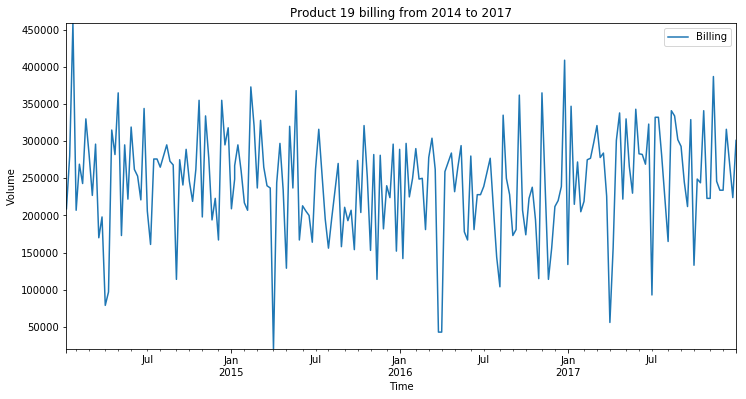

In [332]:
title = 'Product 19 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df19['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

## SAVE FCAST INTO FILE

In [411]:
def _create_output(series, product:str):
    '''
    Input series format: index is equalt to dates (datetime format); one column with floats
    Output df format: product 19-, week 1-13, units (forecast)
    '''
    weeks = series.index.week
    product_ = pd.Series([product]*len(weeks))
    data = {'Product': product_, 'Week': weeks, 'Units': series.values}
    return pd.DataFrame(data, columns=data.keys())


def save_forecast(arr_of_dfs, filename='FORECAST_2018_Q1.xlsx'):
    # save in a directory 
    import os
    DIR = os.getcwd()
    if not os.path.exists(DIR):
        print("PROVIDE PATH TO FILE MANUALLY")
    FILE_NAME = filename
    PATH = os.path.join(DIR, FILE_NAME)
    
    # saving
    RES = pd.concat(arr_of_dfs, axis=0)
    RES.to_excel('FORECAST_2018_Q1.xlsx')
    print(f'SUCCESSFULLY SAVED IN {PATH}')

## Convert Fc_and_order into float

In [168]:
df19.columns

Index(['Sp_number', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order',
       'Billing'],
      dtype='object')

In [14]:
df['Fc_and_order'] = df['Fc_and_order'].astype(float)

In [15]:
df19['Fc_and_order'] = df19['Fc_and_order'].astype(float)

In [352]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-03-17/2014-03-23  Product_19    201411          13   201350   
2014-03-03/2014-03-09  Product_19    201409          13   201348   
2014-02-10/2014-02-16  Product_19    201406          13   201345   
2014-01-20/2014-01-26  Product_19    201403          13   201342   
2014-01-13/2014-01-19  Product_19    201402          13   201341   

                       Fc_and_order   Billing  
isodate                                        
2014-03-17/2014-03-23      190591.0  170000.0  
2014-03-03/2014-03-09      177902.0  227000.0  
2014-02-10/2014-02-16      496048.0  243000.0  
2014-01-20/2014-01-26      287652.0  459000.0  
2014-01-13/2014-01-19      216909.0  279997.0

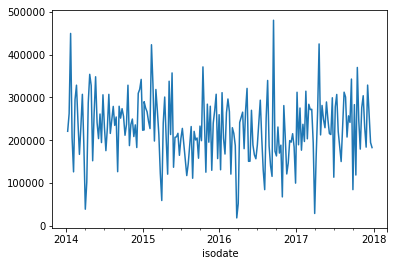

In [16]:
df19['Fc_and_order'].plot()

## Prepare data for Granger causality tests

In [17]:
granger19_1 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==1)].dropna()
granger19_2 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==2)].dropna()
granger19_3 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==3)].dropna()
granger19_4 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==4)].dropna()
granger19_5 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==5)].dropna()
granger19_6 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==6)].dropna()
granger19_7 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==7)].dropna()
granger19_8 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==8)].dropna()
granger19_9 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==9)].dropna()
granger19_10 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==10)].dropna()
granger19_11 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==11)].dropna()
granger19_12 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==12)].dropna()
granger19_13 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==13)].dropna()

In [18]:
granger20_1 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==1)].dropna()
granger20_2 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==2)].dropna()
granger20_3 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==3)].dropna()
granger20_4 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==4)].dropna()
granger20_5 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==5)].dropna()
granger20_6 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==6)].dropna()
granger20_7 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==7)].dropna()
granger20_8 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==8)].dropna()
granger20_9 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==9)].dropna()
granger20_10 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==10)].dropna()
granger20_11 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==11)].dropna()
granger20_12 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==12)].dropna()
granger20_13 = df[(df['Sp_number']=='Product_20') & (df['Fc_horizon']==13)].dropna()

In [19]:
granger22_1 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==1)].dropna()
granger22_2 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==2)].dropna()
granger22_3 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==3)].dropna()
granger22_4 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==4)].dropna()
granger22_5 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==5)].dropna()
granger22_6 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==6)].dropna()
granger22_7 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==7)].dropna()
granger22_8 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==8)].dropna()
granger22_9 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==9)].dropna()
granger22_10 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==10)].dropna()
granger22_11 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==11)].dropna()
granger22_12 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==12)].dropna()
granger22_13 = df[(df['Sp_number']=='Product_22') & (df['Fc_horizon']==13)].dropna()

In [20]:
granger30_1 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==1)].dropna()
granger30_2 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==2)].dropna()
granger30_3 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==3)].dropna()
granger30_4 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==4)].dropna()
granger30_5 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==5)].dropna()
granger30_6 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==6)].dropna()
granger30_7 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==7)].dropna()
granger30_8 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==8)].dropna()
granger30_9 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==9)].dropna()
granger30_10 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==10)].dropna()
granger30_11 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==11)].dropna()
granger30_12 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==12)].dropna()
granger30_13 = df[(df['Sp_number']=='Product_30') & (df['Fc_horizon']==13)].dropna()

In [21]:
granger39_1 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==1)].dropna()
granger39_2 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==2)].dropna()
granger39_3 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==3)].dropna()
granger39_4 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==4)].dropna()
granger39_5 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==5)].dropna()
granger39_6 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==6)].dropna()
granger39_7 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==7)].dropna()
granger39_8 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==8)].dropna()
granger39_9 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==9)].dropna()
granger39_10 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==10)].dropna()
granger39_11 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==11)].dropna()
granger39_12 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==12)].dropna()
granger39_13 = df[(df['Sp_number']=='Product_39') & (df['Fc_horizon']==13)].dropna()

In [22]:
granger48_1 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==1)].dropna()
granger48_2 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==2)].dropna()
granger48_3 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==3)].dropna()
granger48_4 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==4)].dropna()
granger48_5 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==5)].dropna()
granger48_6 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==6)].dropna()
granger48_7 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==7)].dropna()
granger48_8 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==8)].dropna()
granger48_9 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==9)].dropna()
granger48_10 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==10)].dropna()
granger48_11 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==11)].dropna()
granger48_12 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==12)].dropna()
granger48_13 = df[(df['Sp_number']=='Product_48') & (df['Fc_horizon']==13)].dropna()

In [23]:
granger50_1 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==1)].dropna()
granger50_2 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==2)].dropna()
granger50_3 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==3)].dropna()
granger50_4 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==4)].dropna()
granger50_5 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==5)].dropna()
granger50_6 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==6)].dropna()
granger50_7 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==7)].dropna()
granger50_8 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==8)].dropna()
granger50_9 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==9)].dropna()
granger50_10 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==10)].dropna()
granger50_11 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==11)].dropna()
granger50_12 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==12)].dropna()
granger50_13 = df[(df['Sp_number']=='Product_50') & (df['Fc_horizon']==13)].dropna()

In [24]:
granger55_1 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==1)].dropna()
granger55_2 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==2)].dropna()
granger55_3 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==3)].dropna()
granger55_4 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==4)].dropna()
granger55_5 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==5)].dropna()
granger55_6 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==6)].dropna()
granger55_7 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==7)].dropna()
granger55_8 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==8)].dropna()
granger55_9 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==9)].dropna()
granger55_10 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==10)].dropna()
granger55_11 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==11)].dropna()
granger55_12 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==12)].dropna()
granger55_13 = df[(df['Sp_number']=='Product_55') & (df['Fc_horizon']==13)].dropna()

In [25]:
granger57_1 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==1)].dropna()
granger57_2 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==2)].dropna()
granger57_3 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==3)].dropna()
granger57_4 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==4)].dropna()
granger57_5 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==5)].dropna()
granger57_6 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==6)].dropna()
granger57_7 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==7)].dropna()
granger57_8 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==8)].dropna()
granger57_9 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==9)].dropna()
granger57_10 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==10)].dropna()
granger57_11 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==11)].dropna()
granger57_12 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==12)].dropna()
granger57_13 = df[(df['Sp_number']=='Product_57') & (df['Fc_horizon']==13)].dropna()

In [26]:
granger67_1 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==1)].dropna()
granger67_2 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==2)].dropna()
granger67_3 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==3)].dropna()
granger67_4 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==4)].dropna()
granger67_5 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==5)].dropna()
granger67_6 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==6)].dropna()
granger67_7 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==7)].dropna()
granger67_8 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==8)].dropna()
granger67_9 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==9)].dropna()
granger67_10 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==10)].dropna()
granger67_11 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==11)].dropna()
granger67_12 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==12)].dropna()
granger67_13 = df[(df['Sp_number']=='Product_67') & (df['Fc_horizon']==13)].dropna()

In [27]:
len(granger19_1)

202

In [28]:
len(granger19_13)

203

## Granger causality tests

In [183]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(granger1[['Fc_and_order','Billing']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1936  , p=0.6604  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=0.1966  , p=0.6575  , df=1
likelihood ratio test: chi2=0.1965  , p=0.6576  , df=1
parameter F test:         F=0.1936  , p=0.6604  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1651  , p=0.1175  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=4.4412  , p=0.1085  , df=2
likelihood ratio test: chi2=4.3926  , p=0.1112  , df=2
parameter F test:         F=2.1651  , p=0.1175  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2427  , p=0.2955  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=3.8639  , p=0.2765  , df=3
likelihood ratio test: chi2=3.8269  , p=0.2808  , df=3
parameter F test:         F=1.2427  , p=0.2955  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4982  , p=0.2044  

Essentially we're looking for extremely low p-values, which we relatively have for lag=2. Further investigation is needed.

In [125]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(granger13[['Fc_and_order','Billing']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3334  , p=0.5647  , df_denom=131, df_num=1
ssr based chi2 test:   chi2=0.3410  , p=0.5592  , df=1
likelihood ratio test: chi2=0.3406  , p=0.5595  , df=1
parameter F test:         F=0.3334  , p=0.5647  , df_denom=131, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3623  , p=0.6968  , df_denom=128, df_num=2
ssr based chi2 test:   chi2=0.7528  , p=0.6863  , df=2
likelihood ratio test: chi2=0.7507  , p=0.6871  , df=2
parameter F test:         F=0.3623  , p=0.6968  , df_denom=128, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6295  , p=0.5973  , df_denom=125, df_num=3
ssr based chi2 test:   chi2=1.9941  , p=0.5736  , df=3
likelihood ratio test: chi2=1.9792  , p=0.5767  , df=3
parameter F test:         F=0.6295  , p=0.5973  , df_denom=125, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7266  , p=0.5754  

##### ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

In [581]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

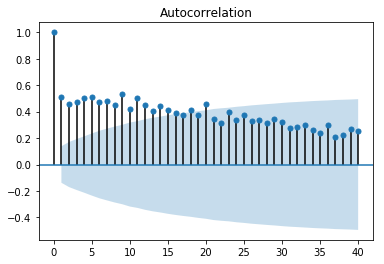

In [582]:
plot_acf(df50['Billing'],lags=40);

This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

##### PACF Plots
Partial autocorrelations work best with stationary data. Let's look first at <strong>Daily Total Female Births</strong>:

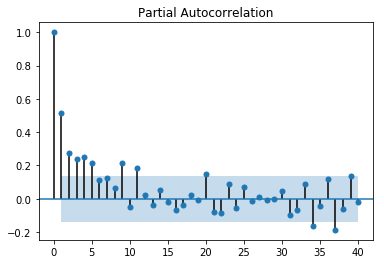

In [583]:
plot_pacf(df50['Billing'],lags=40);

##### ARIMA forecast into the future

In [610]:
model = ARIMA(df50['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

In [ ]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('ARIMA (0,1,1) FORECAST')

In [611]:
len(fcast)

13

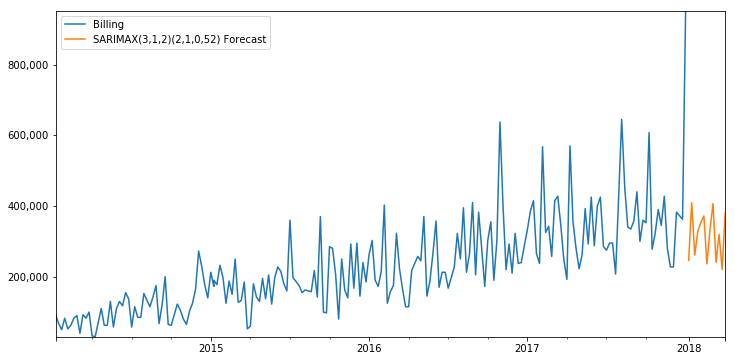

In [273]:
title = ''
ylabel = ''
xlabel = ''
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [661]:
model = SARIMAX(df50['Billing'],order=(3,1,2),seasonal_order=(0,0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2558.696
Date:                Wed, 25 May 2022   AIC                           5129.392
Time:                        16:35:05   BIC                           5149.211
Sample:                    12-31-2017   HQIC                          5137.412
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0488      0.488      0.100      0.920      -0.907       1.005
ar.L2         -0.1474      0.081     -1.827      0.068      -0.305       0.011
ar.L3         -0.1053      0.077     -1.364      0.173      -0.257       0.046
ma.L1         -0.9806      0.511     -1.919      0.055      -1.982       0.021
ma.L2          0.1121      0.462      0.243      0.808      -0.793       1.017
sigma2      6.887e+09   6.82e-11   1.01e+20      0.000    6.89e+09    6.89e+09
===================================================================================
Ljung-Box (Q):                       63.20   Jarque-Bera (JB):                88.36
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+36. Standard errors may be unstable.
"""

In [662]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [611]:
len(fcast)

13

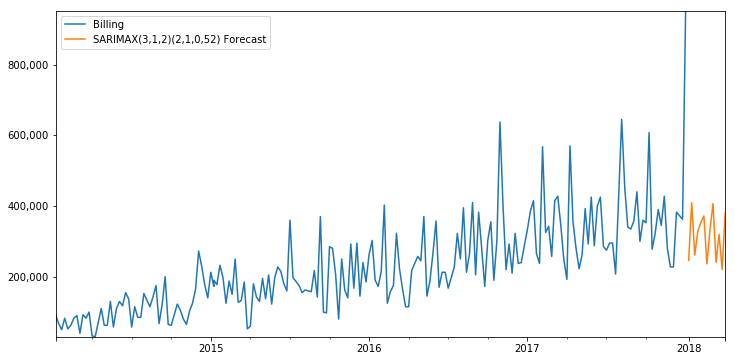

In [274]:
title = ''
ylabel = ''
xlabel = ''
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

# FORECAST HORIZON 1: Q1/2018

In [26]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

## APPROACH

1. Data inspection—plotting
2. ...
3. Auto_arima() → Auto_arima flow chart: https://otexts.com/fpp2/arima-r.html

### Tests for Autocorrelation — Lag Plotting
The arrays returned by <tt>.acf(df)</tt> and <tt>.pacf_yw(df)</tt> show the magnitude of the autocorrelation for a given $y$ at time $t$. Before we look at plotting arrays, let's look at the data itself for evidence of autocorrelation.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way.

### Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

#### Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

#### Automate the augmented Dickey-Fuller Test
Since we'll be using it a lot to determine if an incoming time series is stationary, let's write a function that performs the augmented Dickey-Fuller Test.

In [27]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Granger Causality Tests
The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries.

The function takes in a 2D array [y,x] and a maximum number of lags to test on x. We'll set maxlags to 3.

Essentially we're looking for extremely low p-values.

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

### Evaluating forecast accuracy
Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

The formula for the mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

The formula for the root mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

The advantage of the RMSE is that it is expressed in the same units as the data.<br><br>

A method similar to the RMSE is the <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'><strong>mean absolute error</strong></a> (MAE) which is the mean of the magnitudes of the error, given as<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;$MAE = {\frac 1 L} \sum\limits_{l=1}^L \mid{y_{T+l}} - \hat y_{T+l}\mid$<br><br>

A forecast method that minimizes the MAE will lead to forecasts of the median, while minimizing the RMSE will lead to forecasts of the mean.

In [36]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

#### AIC / BIC
More sophisticated tests include the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'><strong>Akaike information criterion</strong></a> (AIC) and the <a href='https://en.wikipedia.org/wiki/Bayesian_information_criterion'><strong>Bayesian information criterion</strong></a> (BIC).

The AIC evaluates a collection of models and estimates the quality of each model relative to the others. Penalties are provided for the number of parameters used in an effort to thwart overfitting. The lower the AIC and BIC, the better the model should be at forecasting.

These functions are available as

&nbsp;&nbsp;&nbsp;&nbsp;<tt>from from statsmodels.tools.eval_measures import aic, bic</tt>

but we seldom compute them alone as they are built into many of the statsmodels tools we use.

## Exposing Seasonality with Month and Quarter Plots
Statsmodels has two plotting functions that group data by month and by quarter. Note that if the data appears as months, you should employ <em>resampling</em> with an aggregate function before running a quarter plot. These plots return a <tt>matplotlib.Figure</tt> object.

### Run an ETS Decomposition (optional)
We probably won't learn a lot from it, but it never hurts to run an ETS Decomposition plot.

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Product_19

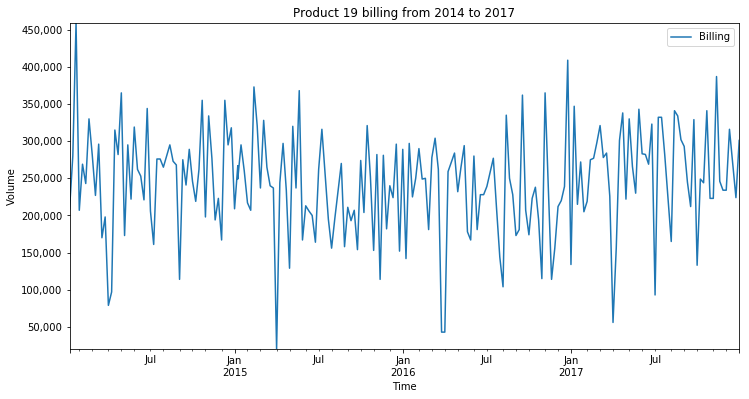

In [78]:
title = 'Product 19 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df19['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

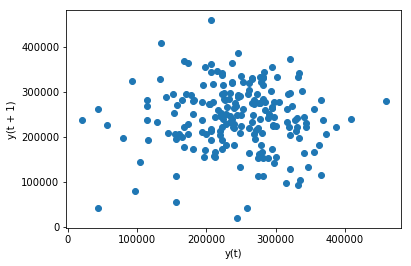

In [82]:
from pandas.plotting import lag_plot
lag_plot(df19['Billing'])

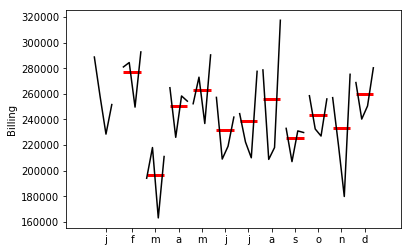

In [845]:
dfm = df19['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

# Only works without df.index = pd.DatetimeIndex(df.index).to_period('W') function

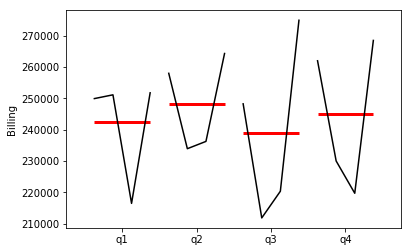

In [942]:
dfq = df19['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

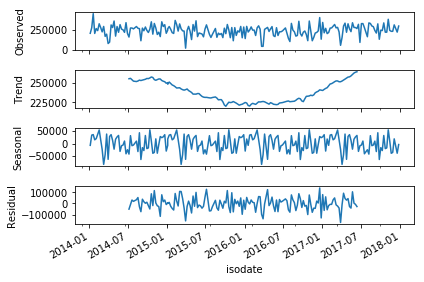

In [940]:
result = seasonal_decompose(df19['Billing'],model='add',freq=52)
result.plot();

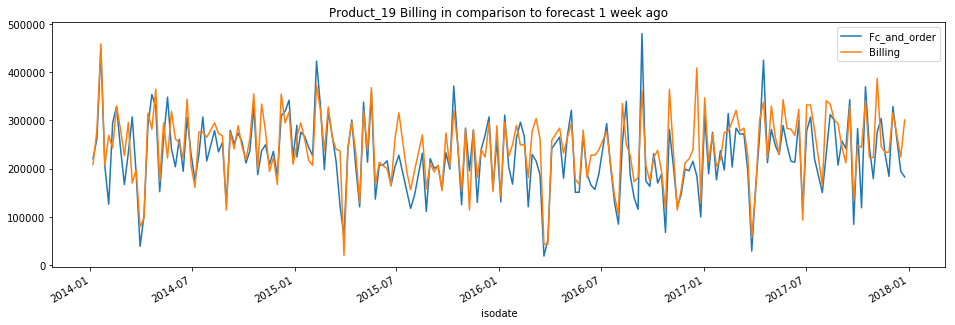

In [886]:
granger19_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_19 Billing in comparison to forecast 1 week ago');

In [913]:
MSE = mse(granger19_1['Fc_and_order'],granger19_1['Billing'])
RMSE = rmse(granger19_1['Fc_and_order'],granger19_1['Billing'])
MAE = meanabs(granger19_1['Fc_and_order'],granger19_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 2305351328.129
Client forecast RMSE: 48014.074
Client forecast  MAE: 35136.851


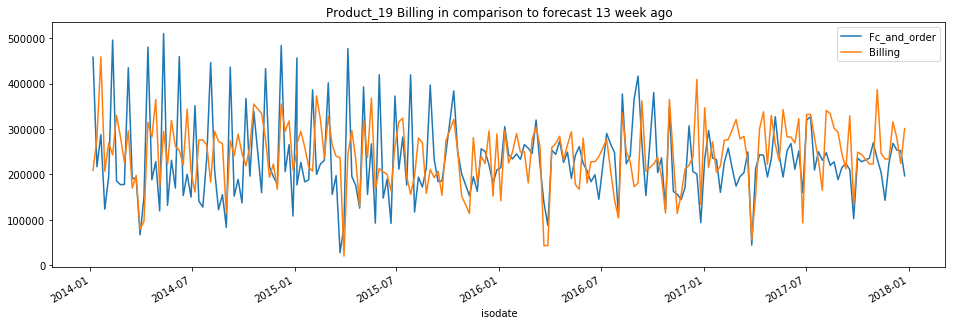

In [990]:
granger19_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_19 Billing in comparison to forecast 13 week ago');

In [914]:
MSE = mse(granger19_13['Fc_and_order'],granger19_13['Billing'])
RMSE = rmse(granger19_13['Fc_and_order'],granger19_13['Billing'])
MAE = meanabs(granger19_13['Fc_and_order'],granger19_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 9184674800.079
Client forecast RMSE: 95836.709
Client forecast  MAE: 75030.197


In [28]:
adf_test(df19['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.437777e+01
p-value                 9.262286e-27
# lags used             0.000000e+00
# observations          2.010000e+02
critical value (1%)    -3.463309e+00
critical value (5%)    -2.876029e+00
critical value (10%)   -2.574493e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [29]:
auto_arima(df19['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:                     ARMA(0, 0)   Log Likelihood               -2543.731
Method:                           css   S.D. of innovations          71238.423
Date:                Mon, 30 May 2022   AIC                           5091.461
Time:                        15:04:37   BIC                           5098.078
Sample:                             0   HQIC                          5094.138
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.438e+05   5012.318     48.637      0.000    2.34e+05    2.54e+05
==============================================================================
"""

In [30]:
stepwise_fit = auto_arima(df19['Billing'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=False)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:                     ARMA(0, 0)   Log Likelihood               -2543.731
Method:                           css   S.D. of innovations          71238.423
Date:                Mon, 30 May 2022   AIC                           5091.461
Time:                        15:04:54   BIC                           5098.078
Sample:                             0   HQIC                          5094.138
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.438e+05   5012.318     48.637      0.000    2.34e+05    2.54e+05
==============================================================================
"""

In [31]:
train19 = df19['2017-09-30':]
test19 = df19[:'2017-09-30']

In [32]:
model = ARMA(train19['Billing'],order=(0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:                     ARMA(0, 0)   Log Likelihood               -2394.617
Method:                           css   S.D. of innovations          71991.941
Date:                Mon, 30 May 2022   AIC                           4793.234
Time:                        15:05:13   BIC                           4799.728
Sample:                    10-01-2017   HQIC                          4795.865
                         - 01-12-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.422e+05   5222.844     46.377      0.000    2.32e+05    2.52e+05
==============================================================================
"""

In [33]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARMA (0,0) Predictions')

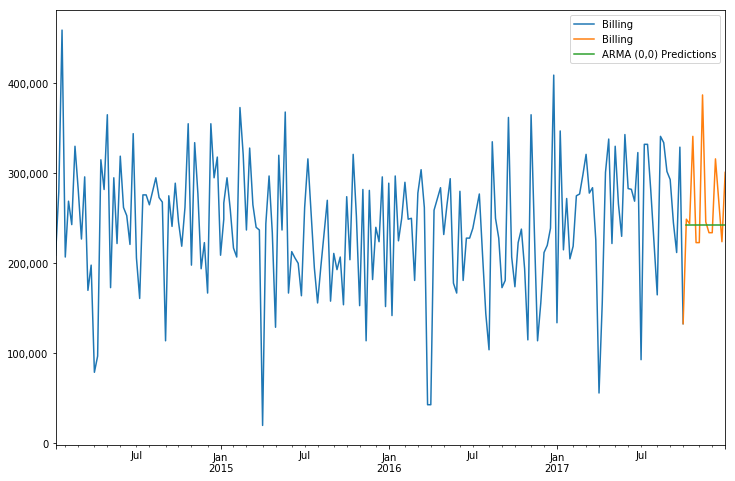

In [34]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train19['Billing'].plot(figsize=(12,8),legend=True)
test19['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [37]:
error = rmse(test19['Billing'],predictions)
error

63739.05665575302

In [38]:
auto_arima(df19['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -1914.606
Date:                            Mon, 30 May 2022   AIC                           3847.212
Time:                                    15:10:22   BIC                           3874.248
Sample:                                         0   HQIC                          3858.196
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2601.2974   1.29e+04      0.202      0.840   -2.26e+04    2.78e+04
ar.L1         -0.6938      0.125     -5.546      0.000      -0.939      -0.449
ar.L2         -0.5417      0.148     -3.668      0.000      -0.831      -0.252
ar.L3         -0.4844      0.147     -3.299      0.001      -0.772      -0.197
ar.L4         -0.2712      0.167     -1.628      0.104      -0.598       0.055
ar.L5         -0.1458      0.139     -1.052      0.293      -0.418       0.126
ar.S.L52      -0.7572      0.124     -6.090      0.000      -1.001      -0.514
ar.S.L104     -0.3591      0.141     -2.550      0.011      -0.635      -0.083
sigma2      1.134e+10      0.005   2.08e+12      0.000    1.13e+10    1.13e+10
===================================================================================
Ljung-Box (Q):                       34.26   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.73   Prob(JB):                         0.67
Heteroskedasticity (H):               1.08   Skew:                             0.07
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.84e+28. Standard errors may be unstable.
"""

In [41]:
model = SARIMAX(train19['Billing'],order=(5,1,0),seasonal_order=(2,1,0,52),exog=train19['Fc_and_order'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -1678.613
Date:                            Mon, 30 May 2022   AIC                           3375.226
Time:                                    15:11:38   BIC                           3401.506
Sample:                                10-01-2017   HQIC                          3385.906
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.7841      0.072     10.933      0.000       0.644       0.925
ar.L1           -0.9142      0.159     -5.743      0.000      -1.226      -0.602
ar.L2           -0.7096      0.222     -3.192      0.001      -1.145      -0.274
ar.L3           -0.6201      0.250     -2.480      0.013      -1.110      -0.130
ar.L4           -0.4237      0.250     -1.692      0.091      -0.915       0.067
ar.L5           -0.1538      0.163     -0.941      0.347      -0.474       0.167
ar.S.L52        -0.8142      0.199     -4.092      0.000      -1.204      -0.424
ar.S.L104       -0.2637      0.227     -1.163      0.245      -0.708       0.181
sigma2        3.792e+09    4.3e-11   8.82e+19      0.000    3.79e+09    3.79e+09
===================================================================================
Ljung-Box (Q):                       50.66   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.12   Prob(JB):                         0.11
Heteroskedasticity (H):               1.34   Skew:                             0.09
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.53e+35. Standard errors may be unstable.
"""

In [42]:
start = '2017-10-02'
end = '2017-12-31'
exog_forecast = test19[['Fc_and_order']]

In [48]:
exog_forecast

Fc_and_order
isodate                            
2017-12-25/2017-12-31        182723
2017-12-18/2017-12-24        194600
2017-12-04/2017-12-10        328866
2017-11-27/2017-12-03        183804
2017-11-20/2017-11-26        230685
2017-11-13/2017-11-19        304025
2017-11-06/2017-11-12        276242
2017-10-30/2017-11-05        179161
2017-10-23/2017-10-29        244925
2017-10-16/2017-10-22        370097
2017-10-09/2017-10-15        118626
2017-10-02/2017-10-08        283202
2017-09-25/2017-10-01         84418

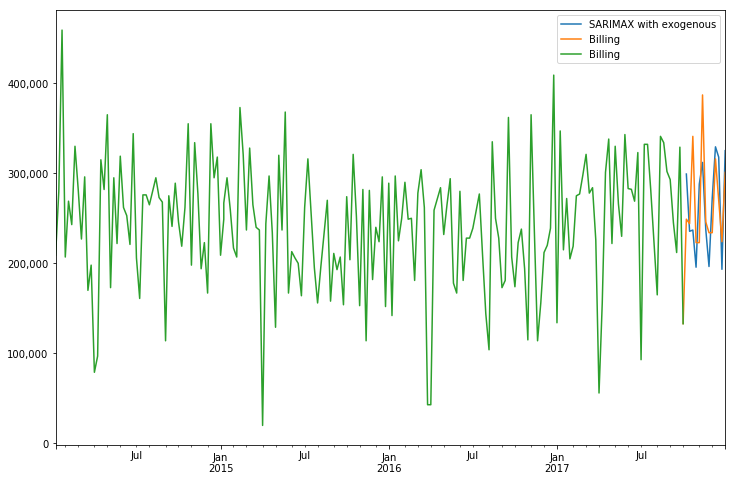

In [44]:
predictions = results.predict(start,end,exog=exog_forecast).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test19['Billing'].plot(legend=True)
train19['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [49]:
error = rmse(test19['Billing'],predictions)
error

81419.64690841427

In [159]:
model = SARIMAX(df19['Billing'],exog=df19['Fc_and_order'],order=(3,1,2),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()

exog_forecast = df19[:'2018-01-01']['Fc_and_order']
fcast = results.predict('2018-01-01','2018-04-01',exog=exog_forecast).rename('SARIMAX(3,1,2)(2,1,0,52) Forecast')

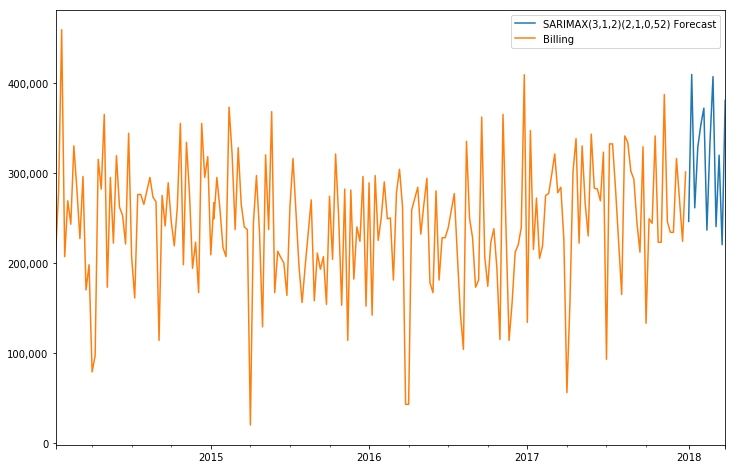

In [160]:
ax = fcast.plot(figsize=(12,8),legend=True)
df19['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title =''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

##### ARMA forecast into the future

In [417]:
model = ARMA(df19['Billing'],order=(0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:                     ARMA(0, 0)   Log Likelihood               -2543.731
Method:                           css   S.D. of innovations          71238.423
Date:                Mon, 30 May 2022   AIC                           5091.461
Time:                        17:17:20   BIC                           5098.078
Sample:                    12-31-2017   HQIC                          5094.138
                         - 01-12-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.438e+05   5012.318     48.637      0.000    2.34e+05    2.54e+05
==============================================================================
"""

In [418]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARMA (0,0) FORECAST')

In [419]:
len(fcast)

13

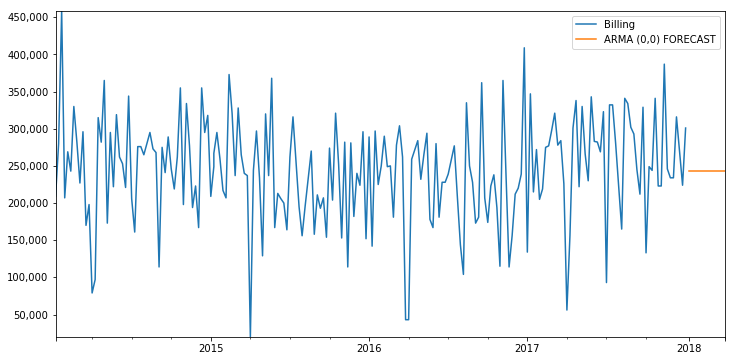

In [420]:
title = ''
ylabel = ''
xlabel = ''
ax = df19['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [421]:
fcast19 = _create_output(fcast,'Product_19')

##### SARIMA forecast into the future

In [275]:
model = SARIMAX(df19['Billing'],order=(3,1,2),seasonal_order=(2,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(3, 1, 2)x(2, 1, 0, 52)   Log Likelihood               -1913.000
Date:                            Fri, 27 May 2022   AIC                           3842.000
Time:                                    15:29:28   BIC                           3866.031
Sample:                                12-31-2017   HQIC                          3851.763
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1937      0.899     -0.216      0.829      -1.955       1.568
ar.L2         -0.0814      0.232     -0.351      0.725      -0.536       0.373
ar.L3         -0.1691      0.156     -1.081      0.280      -0.476       0.138
ma.L1         -0.5277      0.900     -0.586      0.558      -2.292       1.237
ma.L2         -0.1272      0.782     -0.163      0.871      -1.661       1.406
ar.S.L52      -0.7530      0.119     -6.322      0.000      -0.986      -0.520
ar.S.L104     -0.3417      0.139     -2.464      0.014      -0.614      -0.070
sigma2      1.114e+10   1.25e-10   8.92e+19      0.000    1.11e+10    1.11e+10
===================================================================================
Ljung-Box (Q):                       29.35   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.89   Prob(JB):                         0.72
Heteroskedasticity (H):               1.00   Skew:                             0.04
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.86e+36. Standard errors may be unstable.
"""

In [276]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [277]:
len(fcast)

13

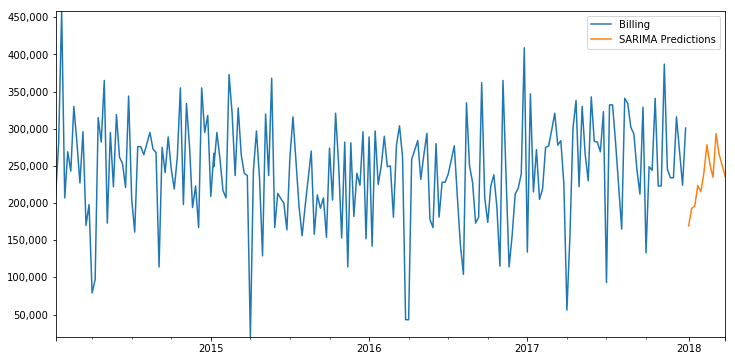

In [278]:
title = ''
ylabel = ''
xlabel = ''
ax = df19['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [155]:
df19.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_19    201405           1   201404   
2014-01-27/2014-02-02  Product_19    201404           1   201403   
2014-01-20/2014-01-26  Product_19    201403           1   201402   
2014-01-13/2014-01-19  Product_19    201402           1   201401   
2014-01-06/2014-01-12  Product_19    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        126028  126028.0  269000.0  
2014-01-27/2014-02-02        206085  206085.0  207000.0  
2014-01-20/2014-01-26        449633  449633.0  459000.0  
2014-01-13/2014-01-19        262289  262289.0  279997.0  
2014-01-06/2014-01-12        220834  220834.0  209000.0

In [156]:
model = SARIMAX(df19['Billing'],exog=df19['Forecast'],order=(5,1,0),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -489.213
Date:                            Sun, 29 May 2022   AIC                            996.427
Time:                                    19:28:41   BIC                           1011.626
Sample:                                12-31-2017   HQIC                          1001.922
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.6817      0.103      6.620      0.000       0.480       0.884
ar.L1         -1.0204      0.367     -2.777      0.005      -1.741      -0.300
ar.L2         -0.7180      0.538     -1.334      0.182      -1.773       0.337
ar.L3         -0.7254      0.401     -1.807      0.071      -1.512       0.061
ar.L4         -0.7112      0.378     -1.881      0.060      -1.452       0.030
ar.L5         -0.3253      0.340     -0.957      0.339      -0.992       0.341
ar.S.L52      -1.0469      0.367     -2.850      0.004      -1.767      -0.327
ar.S.L104     -0.1055      0.323     -0.327      0.744      -0.738       0.527
sigma2      3.768e+09   1.01e-10   3.74e+19      0.000    3.77e+09    3.77e+09
===================================================================================
Ljung-Box (Q):                       19.50   Jarque-Bera (JB):                 0.83
Prob(Q):                              1.00   Prob(JB):                         0.66
Heteroskedasticity (H):               1.39   Skew:                             0.22
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.97e+35. Standard errors may be unstable.
"""

In [157]:
exog_forecast = df19exo[:'2018-01-01'][['Forecast']]

In [158]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [159]:
len(fcast)

13

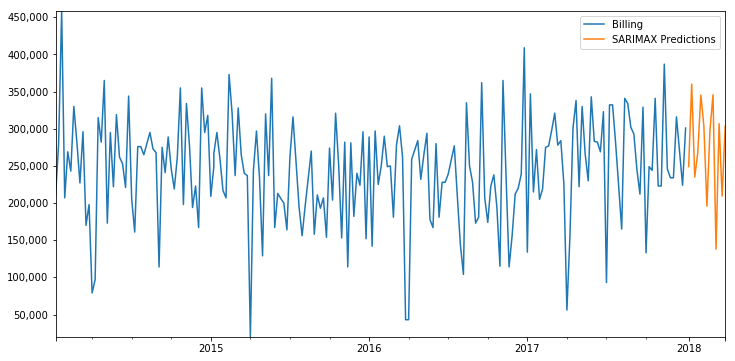

In [160]:
title = ''
ylabel = ''
xlabel = ''
ax = df19['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

## Product_20

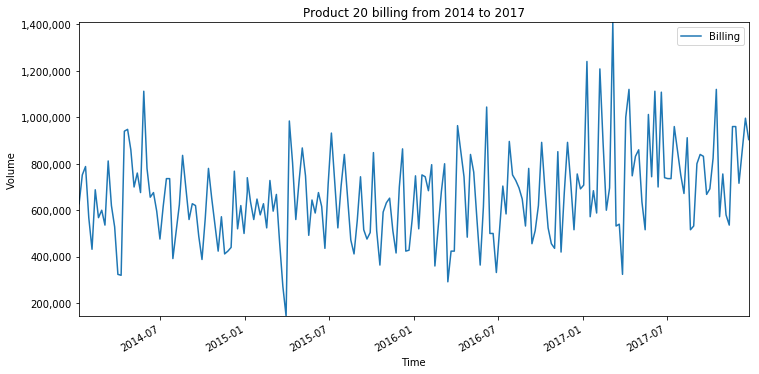

In [220]:
title = 'Product 20 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df20['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

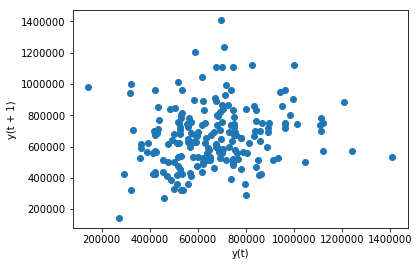

In [174]:
from pandas.plotting import lag_plot
lag_plot(df20['Billing'])

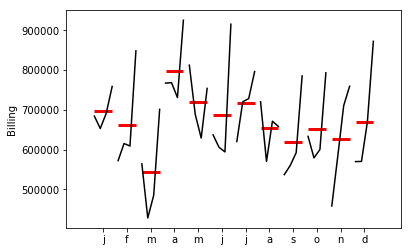

In [218]:
dfm = df20['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

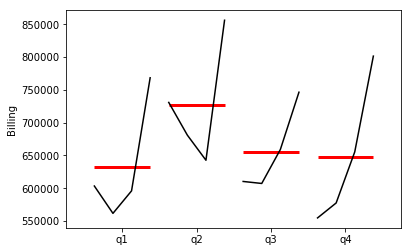

In [219]:
dfq = df20['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

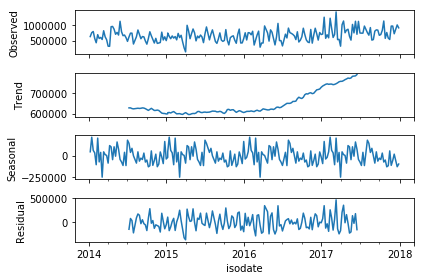

In [510]:
result = seasonal_decompose(df20['Billing'],model='add',freq=52)
result.plot();

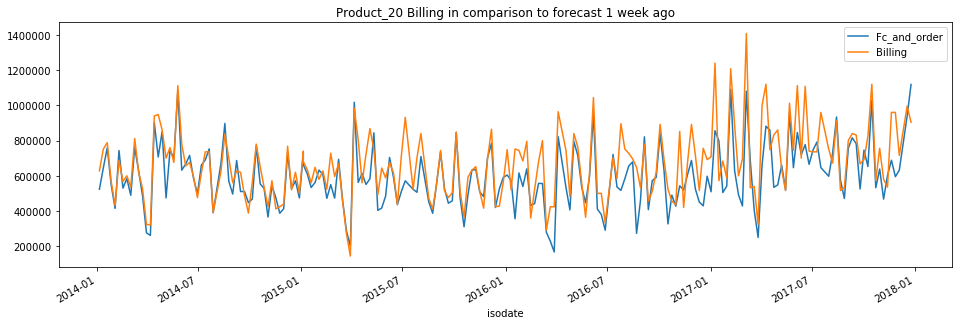

In [887]:
granger20_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_20 Billing in comparison to forecast 1 week ago');

In [915]:
MSE = mse(granger20_1['Fc_and_order'],granger20_1['Billing'])
RMSE = rmse(granger20_1['Fc_and_order'],granger20_1['Billing'])
MAE = meanabs(granger20_1['Fc_and_order'],granger20_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 18533694154.604
Client forecast RMSE: 136138.511
Client forecast  MAE: 96814.723


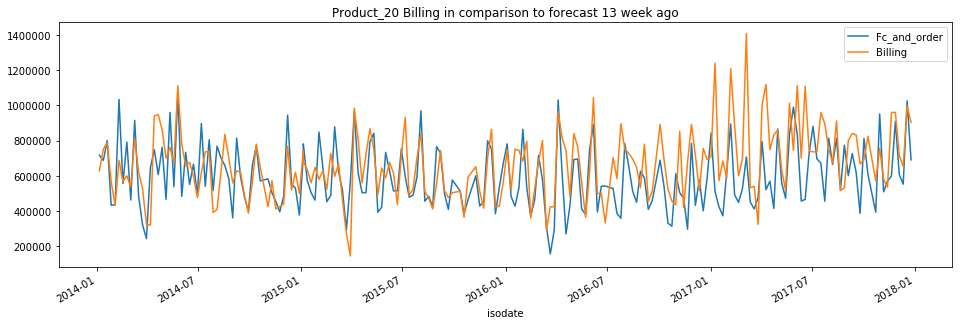

In [897]:
granger20_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_20 Billing in comparison to forecast 13 week ago');

In [916]:
MSE = mse(granger20_13['Fc_and_order'],granger20_13['Billing'])
RMSE = rmse(granger20_13['Fc_and_order'],granger20_13['Billing'])
MAE = meanabs(granger20_13['Fc_and_order'],granger20_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 38483110597.768
Client forecast RMSE: 196171.126
Client forecast  MAE: 147006.478


In [469]:
adf_test(df20['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.078196
p-value                   0.253372
# lags used              10.000000
# observations          191.000000
critical value (1%)      -3.465059
critical value (5%)      -2.876794
critical value (10%)     -2.574901
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [341]:
auto_arima(df20['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2718.814
Method:                       css-mle   S.D. of innovations         180099.244
Date:                Mon, 30 May 2022   AIC                           5451.628
Time:                        16:41:11   BIC                           5474.752
Sample:                             1   HQIC                          5460.985
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -845.0928    885.644     -0.954      0.341   -2580.924     890.738
ar.L1.D.y     -0.5704      0.148     -3.861      0.000      -0.860      -0.281
ar.L2.D.y     -0.1906      0.087     -2.180      0.030      -0.362      -0.019
ar.L3.D.y     -0.2993      0.071     -4.199      0.000      -0.439      -0.160
ma.L1.D.y     -0.3157      0.144     -2.193      0.030      -0.598      -0.034
ma.L2.D.y     -0.5490      0.139     -3.961      0.000      -0.821      -0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2501           -0.0000j            1.2501           -0.5000
AR.2            0.3067           -1.6058j            1.6348           -0.2200
AR.3            0.3067           +1.6058j            1.6348            0.2200
MA.1            1.0924           +0.0000j            1.0924            0.0000
MA.2           -1.6675           +0.0000j            1.6675            0.5000
-----------------------------------------------------------------------------
"""

In [342]:
train20 = df20['2017-09-30':]
test20 = df20[:'2017-09-30']

In [343]:
# train20 = df20[:'2017-09-30']
# test20 = df20['2017-09-30':]

In [344]:
model = ARIMA(train20['Billing'],order=(3,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2555.753
Method:                       css-mle   S.D. of innovations         179350.813
Date:                Mon, 30 May 2022   AIC                           5125.507
Time:                        16:41:33   BIC                           5148.199
Sample:                    09-24-2017   HQIC                          5134.700
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -748.6096   1009.882     -0.741      0.459   -2727.943    1230.724
ar.L1.D.Billing    -0.5565      0.143     -3.903      0.000      -0.836      -0.277
ar.L2.D.Billing    -0.2003      0.091     -2.201      0.029      -0.379      -0.022
ar.L3.D.Billing    -0.3184      0.074     -4.324      0.000      -0.463      -0.174
ma.L1.D.Billing    -0.3219      0.139     -2.314      0.022      -0.595      -0.049
ma.L2.D.Billing    -0.5263      0.135     -3.911      0.000      -0.790      -0.263
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2470           -0.0000j            1.2470           -0.5000
AR.2            0.3091           -1.5565j            1.5869           -0.2188
AR.3            0.3091           +1.5565j            1.5869            0.2188
MA.1            1.1061           +0.0000j            1.1061            0.0000
MA.2           -1.7178           +0.0000j            1.7178            0.5000
-----------------------------------------------------------------------------
"""

In [350]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (3,1,2) Predictions')

In [351]:
len(predictions)

13

In [352]:
predictions

2017-10-02/2017-10-08    -58494.804502
2017-10-09/2017-10-15    -55740.501818
2017-10-16/2017-10-22    180314.948522
2017-10-23/2017-10-29    205730.692508
2017-10-30/2017-11-05    -89551.586261
2017-11-06/2017-11-12      5406.490250
2017-11-13/2017-11-19    -71170.361820
2017-11-20/2017-11-26   -172533.311558
2017-11-27/2017-12-03    -69385.577167
2017-12-04/2017-12-10    -17370.645827
2017-12-11/2017-12-17     25612.007480
2017-12-18/2017-12-24   -322794.894123
2017-12-25/2017-12-31      -128.245408
Freq: W-SUN, Name: ARIMA (3,1,2) Predictions, dtype: float64

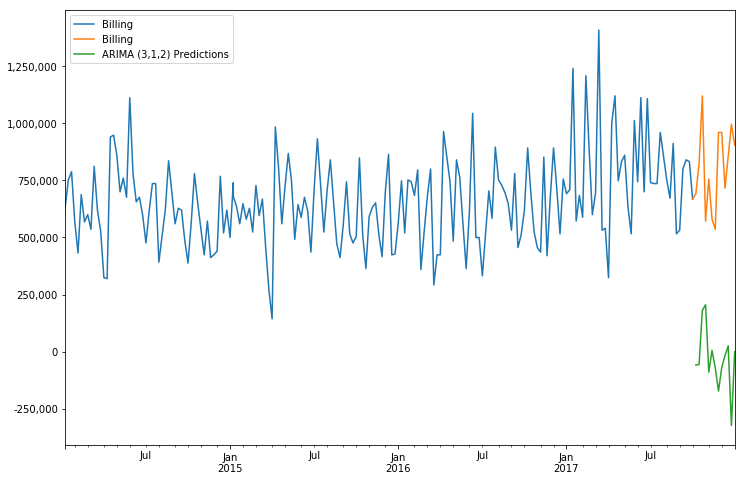

In [353]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train20['Billing'].plot(figsize=(12,8),legend=True)
test20['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [354]:
error = rmse(test20['Billing'],predictions)
error

849268.2284764149

In [355]:
auto_arima(df20['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

KeyboardInterrupt: 

In [117]:
model = SARIMAX(train20['Billing'],order=(5,1,0),seasonal_order=(2,1,0,52),exog=train20['Fc_and_order'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -1811.357
Date:                            Mon, 30 May 2022   AIC                           3640.713
Time:                                    15:39:46   BIC                           3666.993
Sample:                                10-01-2017   HQIC                          3651.393
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.9408      0.106      8.869      0.000       0.733       1.149
ar.L1           -0.8126      0.146     -5.559      0.000      -1.099      -0.526
ar.L2           -0.6158      0.206     -2.991      0.003      -1.019      -0.212
ar.L3           -0.3585      0.229     -1.563      0.118      -0.808       0.091
ar.L4           -0.2939      0.211     -1.396      0.163      -0.707       0.119
ar.L5           -0.1706      0.149     -1.146      0.252      -0.462       0.121
ar.S.L52        -0.6491      0.146     -4.449      0.000      -0.935      -0.363
ar.S.L104       -0.3626      0.168     -2.158      0.031      -0.692      -0.033
sigma2        2.626e+10   3.29e-12   7.99e+21      0.000    2.63e+10    2.63e+10
===================================================================================
Ljung-Box (Q):                       32.34   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.80   Prob(JB):                         0.91
Heteroskedasticity (H):               0.50   Skew:                             0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.7e+37. Standard errors may be unstable.
"""

In [118]:
start = '2017-10-02'
end = '2017-12-31'

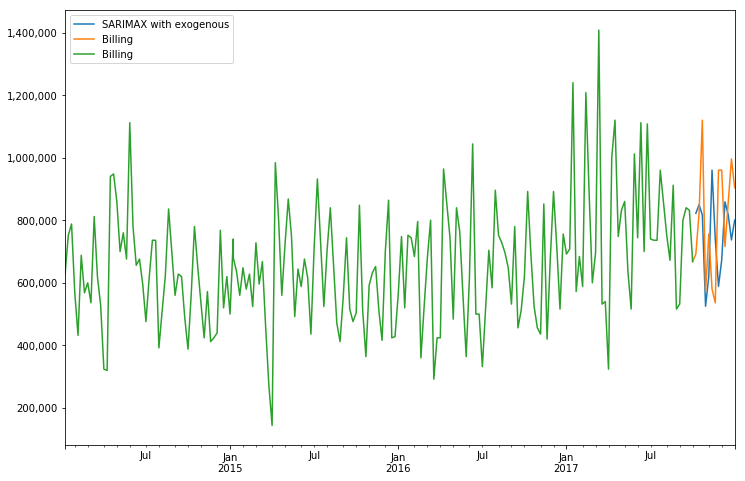

In [119]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test20['Billing'].plot(legend=True)
train20['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [120]:
error = rmse(test20['Billing'],predictions)
error

227767.7084289509

##### ARIMA forecast into the future

In [128]:
model = ARIMA(df20['Billing'],order=(3,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  201
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2718.814
Method:                       css-mle   S.D. of innovations         180099.244
Date:                Mon, 30 May 2022   AIC                           5451.628
Time:                        15:41:45   BIC                           5474.752
Sample:                    12-24-2017   HQIC                          5460.985
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -845.0928    885.644     -0.954      0.341   -2580.924     890.738
ar.L1.D.Billing    -0.5704      0.148     -3.861      0.000      -0.860      -0.281
ar.L2.D.Billing    -0.1906      0.087     -2.180      0.030      -0.362      -0.019
ar.L3.D.Billing    -0.2993      0.071     -4.199      0.000      -0.439      -0.160
ma.L1.D.Billing    -0.3157      0.144     -2.193      0.030      -0.598      -0.034
ma.L2.D.Billing    -0.5490      0.139     -3.961      0.000      -0.821      -0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2501           -0.0000j            1.2501           -0.5000
AR.2            0.3067           -1.6058j            1.6348           -0.2200
AR.3            0.3067           +1.6058j            1.6348            0.2200
MA.1            1.0924           +0.0000j            1.0924            0.0000
MA.2           -1.6675           +0.0000j            1.6675            0.5000
-----------------------------------------------------------------------------
"""

In [129]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (3,1,2) FORECAST')

In [130]:
len(fcast)

13

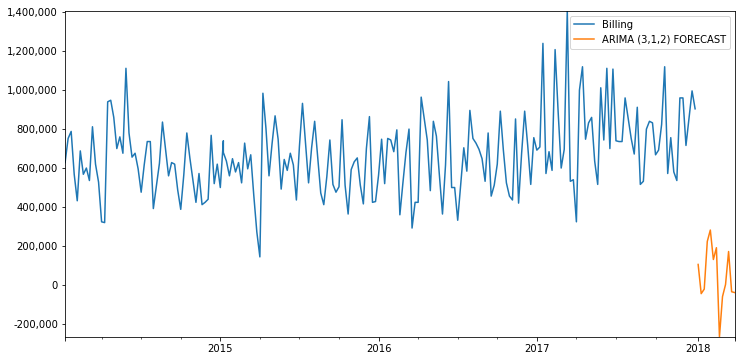

In [131]:
title = ''
ylabel = ''
xlabel = ''
ax = df20['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [132]:
model = SARIMAX(df20['Billing'],order=(5,1,0),seasonal_order=(2,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -2048.447
Date:                            Mon, 30 May 2022   AIC                           4112.895
Time:                                    15:42:26   BIC                           4136.926
Sample:                                12-31-2017   HQIC                          4122.658
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5247      0.124     -4.227      0.000      -0.768      -0.281
ar.L2         -0.5930      0.147     -4.032      0.000      -0.881      -0.305
ar.L3         -0.4421      0.150     -2.947      0.003      -0.736      -0.148
ar.L4         -0.1085      0.129     -0.840      0.401      -0.362       0.145
ar.L5         -0.1490      0.112     -1.335      0.182      -0.368       0.070
ar.S.L52      -0.7065      0.124     -5.676      0.000      -0.951      -0.463
ar.S.L104     -0.3507      0.117     -2.995      0.003      -0.580      -0.121
sigma2      6.844e+10   8.32e-13   8.23e+22      0.000    6.84e+10    6.84e+10
===================================================================================
Ljung-Box (Q):                       51.73   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.10   Prob(JB):                         0.72
Heteroskedasticity (H):               0.66   Skew:                            -0.15
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.92e+38. Standard errors may be unstable.
"""

In [133]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [134]:
len(fcast)

13

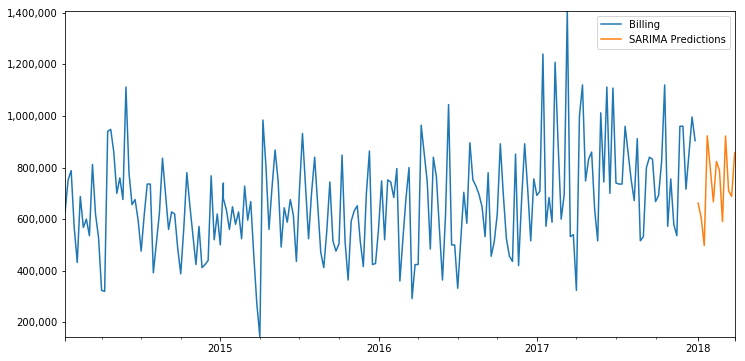

In [135]:
title = ''
ylabel = ''
xlabel = ''
ax = df20['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [399]:
df20.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_20    201405           1   201404   
2014-01-27/2014-02-02  Product_20    201404           1   201403   
2014-01-20/2014-01-26  Product_20    201403           1   201402   
2014-01-13/2014-01-19  Product_20    201402           1   201401   
2014-01-06/2014-01-12  Product_20    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        414438  414438.0  432000.0  
2014-01-27/2014-02-02        549350  549350.0  568000.0  
2014-01-20/2014-01-26        759243  759243.0  788000.0  
2014-01-13/2014-01-19        644972  644972.0  752000.0  
2014-01-06/2014-01-12        523579  523579.0  628000.0

In [400]:
model = SARIMAX(df20['Billing'],exog=df20['Forecast'],order=(5,1,0),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -523.718
Date:                            Mon, 30 May 2022   AIC                           1065.436
Time:                                    16:54:15   BIC                           1080.636
Sample:                                12-31-2017   HQIC                          1070.932
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.9074      0.307      2.961      0.003       0.307       1.508
ar.L1         -0.8748      0.588     -1.487      0.137      -2.028       0.278
ar.L2         -0.7126      0.764     -0.933      0.351      -2.209       0.784
ar.L3         -0.5883      0.758     -0.777      0.437      -2.073       0.896
ar.L4         -0.4357      0.653     -0.667      0.505      -1.715       0.844
ar.L5         -0.3004      0.426     -0.706      0.480      -1.135       0.534
ar.S.L52      -0.4766      0.358     -1.331      0.183      -1.179       0.225
ar.S.L104     -0.3355      0.227     -1.475      0.140      -0.781       0.110
sigma2       2.54e+10   3.51e-11   7.24e+20      0.000    2.54e+10    2.54e+10
===================================================================================
Ljung-Box (Q):                       21.48   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.99   Prob(JB):                         0.70
Heteroskedasticity (H):               1.20   Skew:                             0.23
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.85e+36. Standard errors may be unstable.
"""

In [401]:
exog_forecast = df20exo[:'2018-01-01'][['Forecast']]

In [402]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [403]:
len(fcast)

13

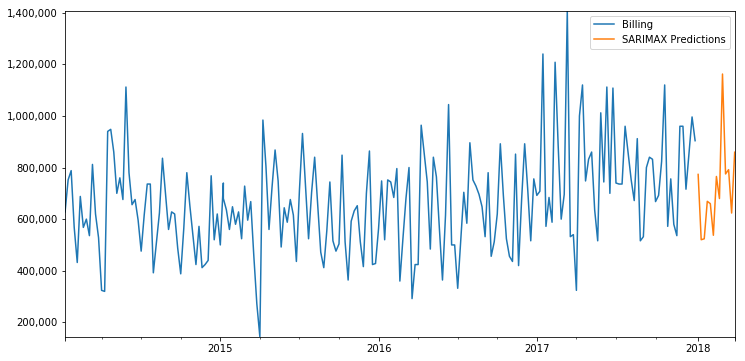

In [404]:
title = ''
ylabel = ''
xlabel = ''
ax = df20['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [416]:
fcast20 = _create_output(fcast,'Product_20')

## Product_22

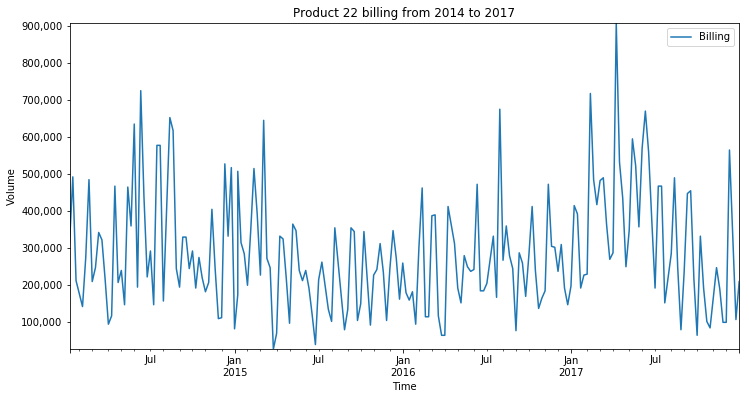

In [82]:
title = 'Product 22 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df22['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

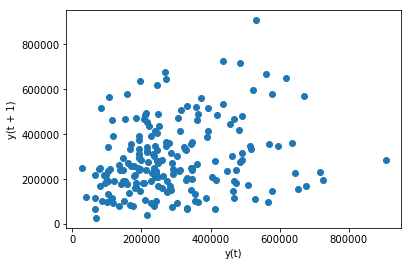

In [773]:
from pandas.plotting import lag_plot
lag_plot(df22['Billing'])

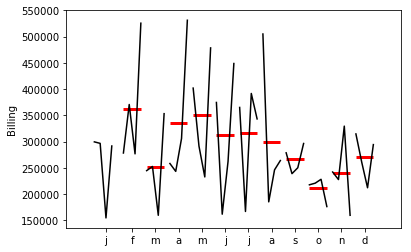

In [809]:
dfm = df22['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

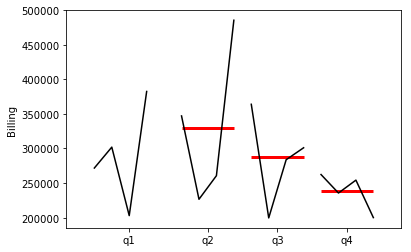

In [850]:
dfq = df22['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

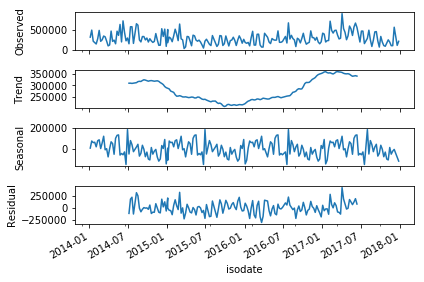

In [943]:
result = seasonal_decompose(df22['Billing'],model='add',freq=52)
result.plot();

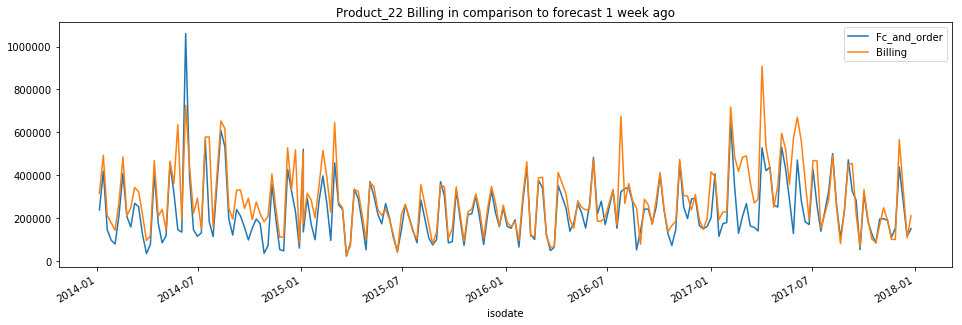

In [888]:
granger22_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_22 Billing in comparison to forecast 1 week ago');

In [917]:
MSE = mse(granger22_1['Fc_and_order'],granger22_1['Billing'])
RMSE = rmse(granger22_1['Fc_and_order'],granger22_1['Billing'])
MAE = meanabs(granger22_1['Fc_and_order'],granger22_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 11326805917.109
Client forecast RMSE: 106427.468
Client forecast  MAE: 67001.436


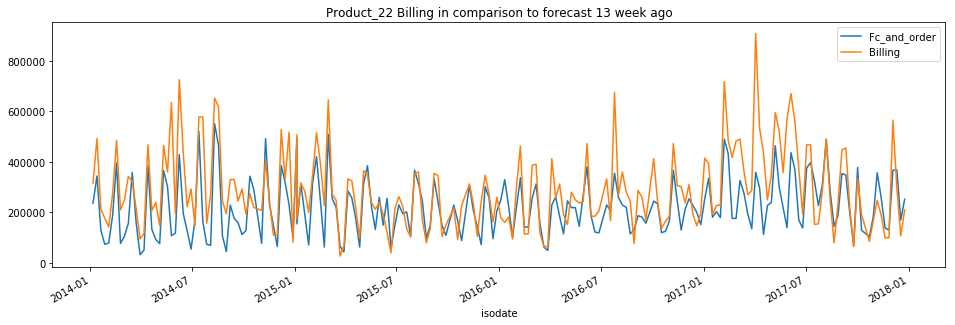

In [898]:
granger22_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_22 Billing in comparison to forecast 13 week ago');

In [918]:
MSE = mse(granger22_13['Fc_and_order'],granger22_13['Billing'])
RMSE = rmse(granger22_13['Fc_and_order'],granger22_13['Billing'])
MAE = meanabs(granger22_13['Fc_and_order'],granger22_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 15923181978.926
Client forecast RMSE: 126187.091
Client forecast  MAE: 91203.015


In [960]:
adf_test(df22['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.545490
p-value                   0.104795
# lags used               7.000000
# observations          194.000000
critical value (1%)      -3.464515
critical value (5%)      -2.876556
critical value (10%)     -2.574775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [422]:
auto_arima(df22['Billing'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:                     ARMA(1, 1)   Log Likelihood               -2692.387
Method:                       css-mle   S.D. of innovations         148605.045
Date:                Mon, 30 May 2022   AIC                           5392.774
Time:                        17:19:33   BIC                           5406.007
Sample:                             0   HQIC                          5398.128
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.873e+05   2.71e+04     10.588      0.000    2.34e+05     3.4e+05
ar.L1.y        0.9338      0.040     23.440      0.000       0.856       1.012
ma.L1.y       -0.8205      0.058    -14.060      0.000      -0.935      -0.706
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0709           +0.0000j            1.0709            0.0000
MA.1            1.2188           +0.0000j            1.2188            0.0000
-----------------------------------------------------------------------------
"""

In [423]:
train22 = df22['2017-09-30':]
test22 = df22[:'2017-09-30']

In [424]:
model = ARMA(train22['Billing'],order=(1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:                     ARMA(1, 1)   Log Likelihood               -2532.474
Method:                       css-mle   S.D. of innovations         148621.116
Date:                Mon, 30 May 2022   AIC                           5072.947
Time:                        17:19:37   BIC                           5085.935
Sample:                    10-01-2017   HQIC                          5078.209
                         - 01-12-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.928e+05   2.81e+04     10.409      0.000    2.38e+05    3.48e+05
ar.L1.Billing     0.9406      0.040     23.410      0.000       0.862       1.019
ma.L1.Billing    -0.8367      0.063    -13.341      0.000      -0.960      -0.714
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0632           +0.0000j            1.0632            0.0000
MA.1            1.1952           +0.0000j            1.1952            0.0000
-----------------------------------------------------------------------------
"""

In [425]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARMA (1,1) Predictions')

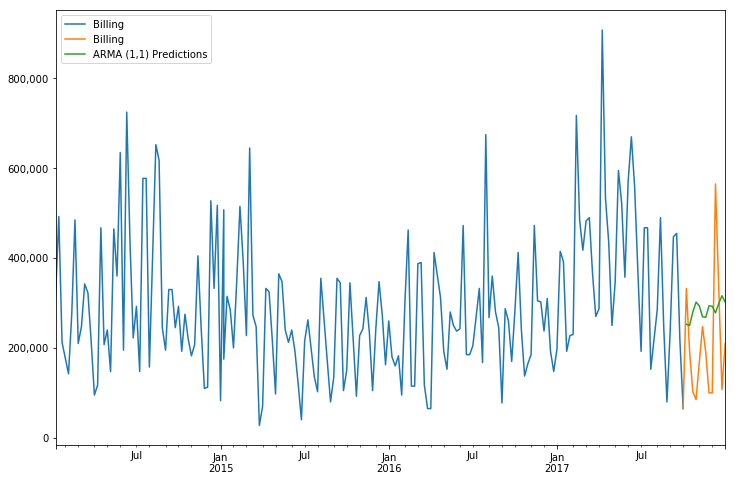

In [426]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train22['Billing'].plot(figsize=(12,8),legend=True)
test22['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [427]:
error = rmse(test22['Billing'],predictions)
error

163108.5268513638

In [428]:
auto_arima(df22['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(4, 1, 1)x(2, 1, 0, 52)   Log Likelihood               -2004.119
Date:                            Mon, 30 May 2022   AIC                           4026.238
Time:                                    17:25:37   BIC                           4053.273
Sample:                                         0   HQIC                          4037.222
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -385.9452   4794.994     -0.080      0.936   -9783.960    9012.070
ar.L1          0.0312      0.247      0.127      0.899      -0.453       0.515
ar.L2         -0.0806      0.204     -0.395      0.693      -0.481       0.319
ar.L3         -0.1434      0.154     -0.933      0.351      -0.445       0.158
ar.L4          0.1541      0.165      0.931      0.352      -0.170       0.478
ma.L1         -0.8358      0.179     -4.681      0.000      -1.186      -0.486
ar.S.L52      -0.8112      0.194     -4.184      0.000      -1.191      -0.431
ar.S.L104     -0.3436      0.184     -1.863      0.062      -0.705       0.018
sigma2      4.077e+10      0.000   2.25e+14      0.000    4.08e+10    4.08e+10
===================================================================================
Ljung-Box (Q):                       70.92   Jarque-Bera (JB):                21.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.74
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+30. Standard errors may be unstable.
"""

In [433]:
model = SARIMAX(train22['Billing'],order=(4,1,1),seasonal_order=(2,1,0,52),exog=train22['Fc_and_order'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(4, 1, 1)x(2, 1, 0, 52)   Log Likelihood               -1767.047
Date:                            Mon, 30 May 2022   AIC                           3552.095
Time:                                    17:26:51   BIC                           3578.375
Sample:                                10-01-2017   HQIC                          3562.774
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.8689      0.055     15.936      0.000       0.762       0.976
ar.L1           -0.1061      0.249     -0.427      0.670      -0.594       0.382
ar.L2           -0.1025      0.219     -0.468      0.640      -0.531       0.326
ar.L3           -0.0688      0.199     -0.346      0.729      -0.459       0.321
ar.L4            0.1013      0.155      0.652      0.515      -0.203       0.406
ma.L1           -0.8229      0.195     -4.229      0.000      -1.204      -0.442
ar.S.L52        -0.6687      0.195     -3.429      0.001      -1.051      -0.287
ar.S.L104       -0.2490      0.159     -1.563      0.118      -0.561       0.063
sigma2        1.301e+10   1.98e-11   6.57e+20      0.000     1.3e+10     1.3e+10
===================================================================================
Ljung-Box (Q):                       26.02   Jarque-Bera (JB):               153.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             1.04
Prob(H) (two-sided):                  0.23   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+37. Standard errors may be unstable.
"""

In [435]:
start = '2017-10-02'
end = '2017-12-31'

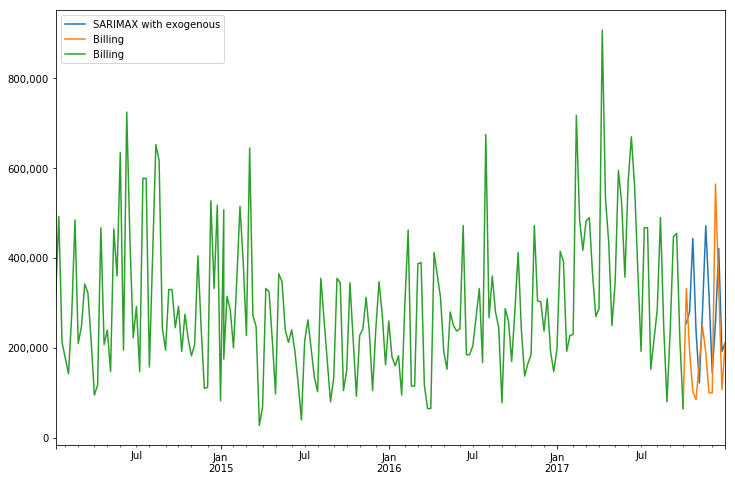

In [436]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test22['Billing'].plot(legend=True)
train22['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [437]:
error = rmse(test22['Billing'],predictions)
error

143745.4888739039

##### ARMA forecast into the future

In [292]:
model = ARMA(df22['Billing'],order=(1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:                     ARMA(1, 1)   Log Likelihood               -2692.355
Method:                       css-mle   S.D. of innovations         148581.804
Date:                Fri, 27 May 2022   AIC                           5392.711
Time:                        15:41:24   BIC                           5405.944
Sample:                    12-31-2017   HQIC                          5398.065
                         - 01-12-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.873e+05   2.71e+04     10.600      0.000    2.34e+05     3.4e+05
ar.L1.Billing     0.9333      0.040     23.313      0.000       0.855       1.012
ma.L1.Billing    -0.8194      0.059    -13.982      0.000      -0.934      -0.705
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0714           +0.0000j            1.0714            0.0000
MA.1            1.2205           +0.0000j            1.2205            0.0000
-----------------------------------------------------------------------------
"""

In [293]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARMA (1,1) FORECAST')

In [294]:
len(fcast)

13

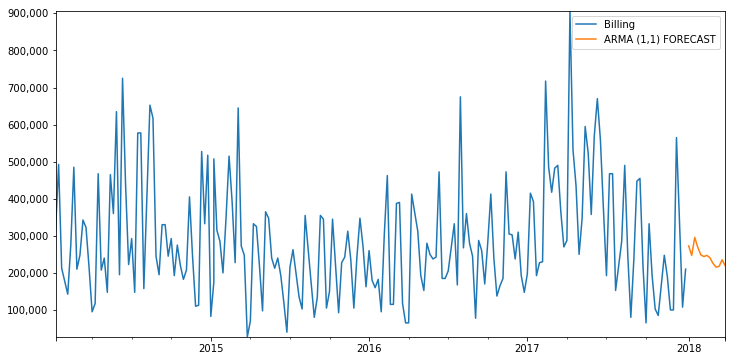

In [295]:
title = ''
ylabel = ''
xlabel = ''
ax = df22['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [296]:
model = SARIMAX(df22['Billing'],order=(4,1,1),seasonal_order=(2,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(4, 1, 1)x(2, 1, 0, 52)   Log Likelihood               -2002.359
Date:                            Fri, 27 May 2022   AIC                           4020.718
Time:                                    15:42:38   BIC                           4044.750
Sample:                                12-31-2017   HQIC                          4030.482
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      0.242     -0.021      0.984      -0.479       0.469
ar.L2         -0.1376      0.190     -0.723      0.469      -0.510       0.235
ar.L3         -0.1423      0.153     -0.928      0.353      -0.443       0.158
ar.L4          0.1260      0.167      0.756      0.450      -0.201       0.453
ma.L1         -0.8045      0.184     -4.372      0.000      -1.165      -0.444
ar.S.L52      -0.7751      0.166     -4.677      0.000      -1.100      -0.450
ar.S.L104     -0.3530      0.150     -2.348      0.019      -0.648      -0.058
sigma2      3.863e+10   3.69e-12   1.05e+22      0.000    3.86e+10    3.86e+10
===================================================================================
Ljung-Box (Q):                       78.30   Jarque-Bera (JB):                21.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.73
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.89e+38. Standard errors may be unstable.
"""

In [297]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [298]:
len(fcast)

13

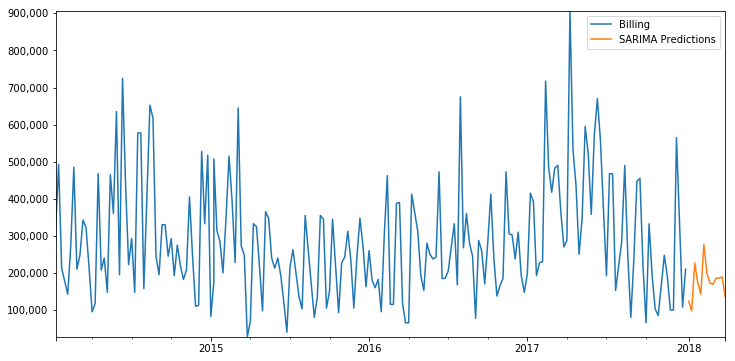

In [299]:
title = ''
ylabel = ''
xlabel = ''
ax = df22['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [167]:
df22.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_22    201405           1   201404   
2014-01-27/2014-02-02  Product_22    201404           1   201403   
2014-01-20/2014-01-26  Product_22    201403           1   201402   
2014-01-13/2014-01-19  Product_22    201402           1   201401   
2014-01-06/2014-01-12  Product_22    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09         78560   78560.0  142500.0  
2014-01-27/2014-02-02         96510   96510.0  177500.0  
2014-01-20/2014-01-26        145072  145072.0  212500.0  
2014-01-13/2014-01-19        418880  418880.0  492500.0  
2014-01-06/2014-01-12        237802  237802.0  315000.0

In [443]:
model = SARIMAX(df22['Billing'],exog=df22['Forecast'],order=(4,1,1),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(4, 1, 1)x(2, 1, 0, 52)   Log Likelihood                -532.495
Date:                            Mon, 30 May 2022   AIC                           1082.990
Time:                                    17:32:03   BIC                           1098.412
Sample:                                12-31-2017   HQIC                          1088.606
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.8212      0.096      8.587      0.000       0.634       1.009
ar.L1         -0.1806      0.377     -0.479      0.632      -0.919       0.558
ar.L2         -0.3034      0.383     -0.792      0.429      -1.054       0.448
ar.L3         -0.1157      0.377     -0.307      0.759      -0.855       0.623
ar.L4          0.0655      0.393      0.167      0.868      -0.704       0.835
ma.L1         -0.8357      0.287     -2.914      0.004      -1.398      -0.274
ar.S.L52      -0.3446      0.381     -0.904      0.366      -1.091       0.402
ar.S.L104     -0.1006      0.293     -0.343      0.732      -0.676       0.474
sigma2       1.24e+10   7.76e-11    1.6e+20      0.000    1.24e+10    1.24e+10
===================================================================================
Ljung-Box (Q):                       22.01   Jarque-Bera (JB):                36.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.24
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.26e+35. Standard errors may be unstable.
"""

In [444]:
exog_forecast = df22exo[:'2018-01-01'][['Forecast']]

In [445]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [446]:
len(fcast)

13

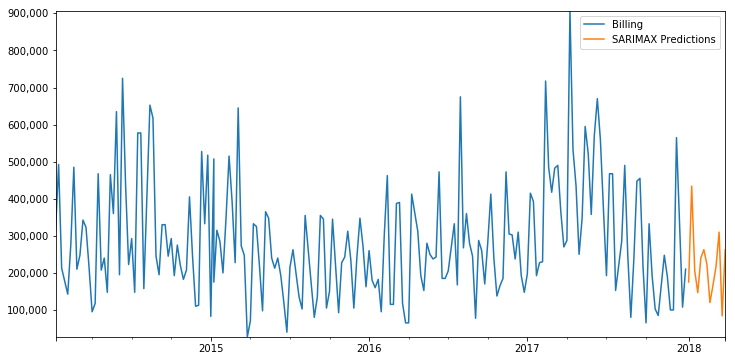

In [447]:
title = ''
ylabel = ''
xlabel = ''
ax = df22['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [448]:
fcast22 = _create_output(fcast,'Product_22')

## Product_30

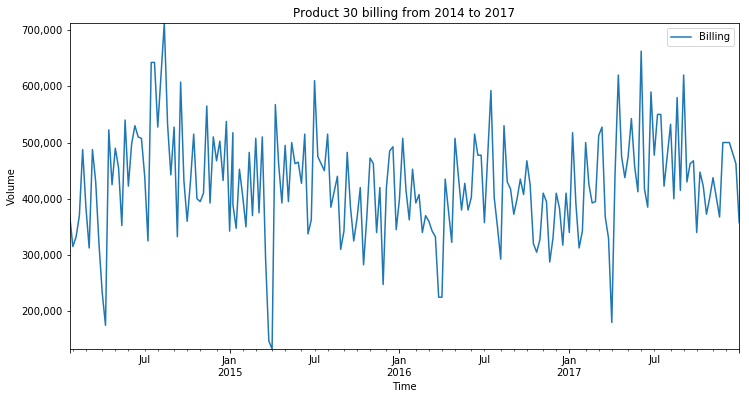

In [83]:
title = 'Product 30 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df30['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

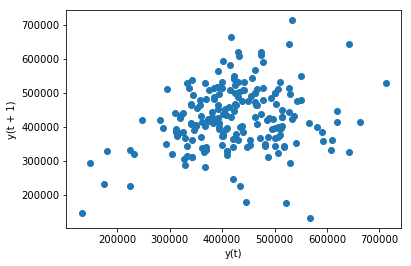

In [774]:
from pandas.plotting import lag_plot
lag_plot(df30['Billing'])

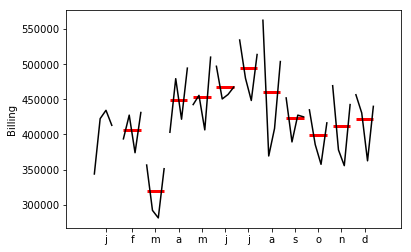

In [810]:
dfm = df30['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

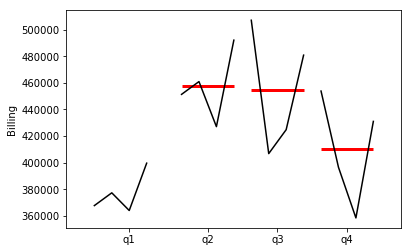

In [851]:
dfq = df30['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

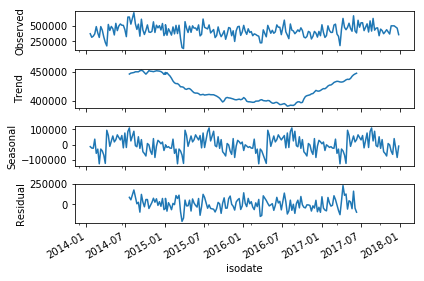

In [944]:
result = seasonal_decompose(df30['Billing'],model='add',freq=52)
result.plot();

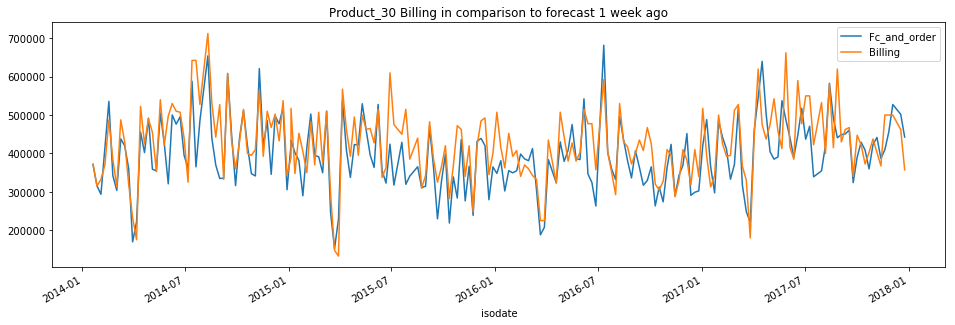

In [889]:
granger30_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_30 Billing in comparison to forecast 1 week ago');

In [919]:
MSE = mse(granger30_1['Fc_and_order'],granger30_1['Billing'])
RMSE = rmse(granger30_1['Fc_and_order'],granger30_1['Billing'])
MAE = meanabs(granger30_1['Fc_and_order'],granger30_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 5145724692.420
Client forecast RMSE: 71733.707
Client forecast  MAE: 53631.770


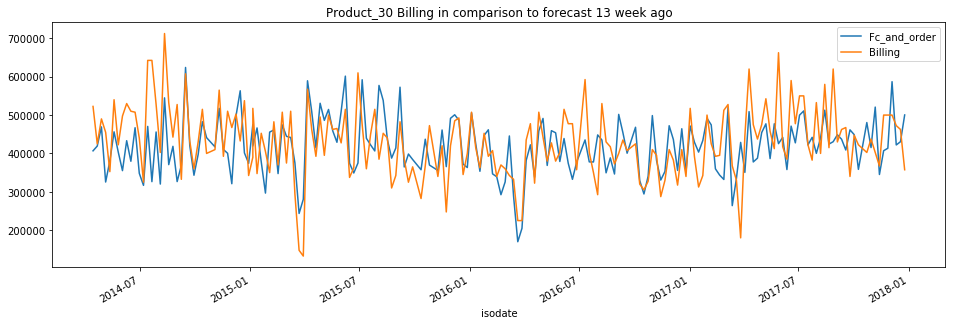

In [899]:
granger30_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_30 Billing in comparison to forecast 13 week ago');

In [920]:
MSE = mse(granger30_13['Fc_and_order'],granger30_13['Billing'])
RMSE = rmse(granger30_13['Fc_and_order'],granger30_13['Billing'])
MAE = meanabs(granger30_13['Fc_and_order'],granger30_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 7160565519.021
Client forecast RMSE: 84620.125
Client forecast  MAE: 65148.619


In [961]:
adf_test(df30['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.247365
p-value                   0.000547
# lags used               4.000000
# observations          195.000000
critical value (1%)      -3.464337
critical value (5%)      -2.876479
critical value (10%)     -2.574733
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [449]:
auto_arima(df30['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 1)   Log Likelihood               -2564.710
Method:                       css-mle   S.D. of innovations          89696.866
Date:                Mon, 30 May 2022   AIC                           5137.421
Time:                        17:33:51   BIC                           5150.614
Sample:                             0   HQIC                          5142.760
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.248e+05   1.33e+04     32.006      0.000    3.99e+05    4.51e+05
ar.L1.y        0.8831      0.072     12.248      0.000       0.742       1.024
ma.L1.y       -0.7500      0.098     -7.619      0.000      -0.943      -0.557
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1323           +0.0000j            1.1323            0.0000
MA.1            1.3334           +0.0000j            1.3334            0.0000
-----------------------------------------------------------------------------
"""

In [450]:
train30 = df30['2017-09-30':]
test30 = df30[:'2017-09-30']

In [451]:
model = ARMA(train30['Billing'],order=(1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  188
Model:                     ARMA(1, 1)   Log Likelihood               -2414.722
Method:                       css-mle   S.D. of innovations          91569.535
Date:                Mon, 30 May 2022   AIC                           4837.444
Time:                        17:33:57   BIC                           4850.390
Sample:                    10-01-2017   HQIC                          4842.689
                         - 01-26-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.244e+05   1.43e+04     29.747      0.000    3.96e+05    4.52e+05
ar.L1.Billing     0.8886      0.071     12.470      0.000       0.749       1.028
ma.L1.Billing    -0.7559      0.098     -7.731      0.000      -0.948      -0.564
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1254           +0.0000j            1.1254            0.0000
MA.1            1.3229           +0.0000j            1.3229            0.0000
-----------------------------------------------------------------------------
"""

In [452]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARMA (1,1) Predictions')

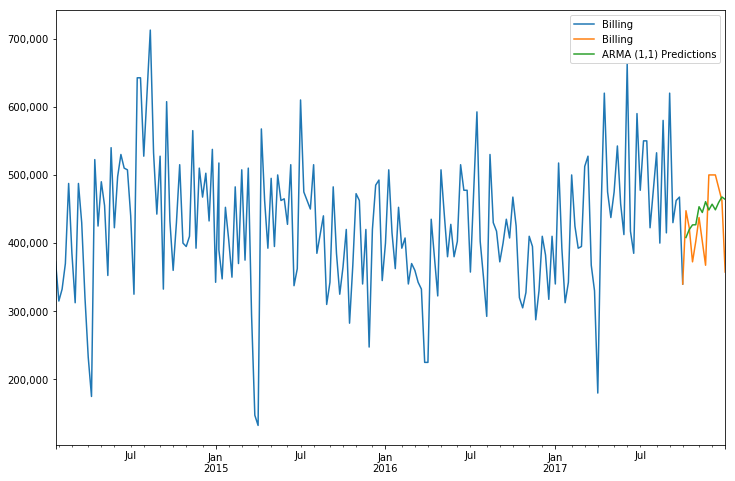

In [453]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train30['Billing'].plot(figsize=(12,8),legend=True)
test30['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [454]:
error = rmse(test30['Billing'],predictions)
error

63721.95493401114

In [455]:
auto_arima(df30['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(2, 1, 3)x(2, 1, 0, 52)   Log Likelihood               -1915.428
Date:                            Mon, 30 May 2022   AIC                           3848.856
Time:                                    17:43:07   BIC                           3875.770
Sample:                                         0   HQIC                          3859.791
                                            - 200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1144.9146   1.41e+04      0.081      0.935   -2.65e+04    2.87e+04
ar.L1         -1.7218      0.132    -13.004      0.000      -1.981      -1.462
ar.L2         -0.7966      0.129     -6.152      0.000      -1.050      -0.543
ma.L1          1.1269      0.126      8.968      0.000       0.881       1.373
ma.L2         -0.4081      0.154     -2.649      0.008      -0.710      -0.106
ma.L3         -0.6683      0.079     -8.431      0.000      -0.824      -0.513
ar.S.L52      -0.6805      0.110     -6.166      0.000      -0.897      -0.464
ar.S.L104     -0.3010      0.119     -2.533      0.011      -0.534      -0.068
sigma2      1.513e+10      0.027   5.58e+11      0.000    1.51e+10    1.51e+10
===================================================================================
Ljung-Box (Q):                       35.61   Jarque-Bera (JB):                 3.98
Prob(Q):                              0.67   Prob(JB):                         0.14
Heteroskedasticity (H):               1.36   Skew:                            -0.35
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+31. Standard errors may be unstable.
"""

In [458]:
model = SARIMAX(train30['Billing'],order=(2,1,3),seasonal_order=(2,1,0,52),exog=train30['Fc_and_order'],enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  188
Model:             SARIMAX(2, 1, 3)x(2, 1, 0, 52)   Log Likelihood                -364.164
Date:                            Mon, 30 May 2022   AIC                            746.328
Time:                                    17:45:10   BIC                            758.634
Sample:                                10-01-2017   HQIC                           750.182
                                     - 01-26-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.8712      0.277      3.146      0.002       0.328       1.414
ar.L1           -1.5517      0.176     -8.839      0.000      -1.896      -1.208
ar.L2           -0.9854      0.241     -4.096      0.000      -1.457      -0.514
ma.L1            0.5984      0.136      4.398      0.000       0.332       0.865
ma.L2           -0.5315      0.154     -3.461      0.001      -0.832      -0.231
ma.L3           -0.9836      0.145     -6.770      0.000      -1.268      -0.699
ar.S.L52        -0.4569      0.248     -1.840      0.066      -0.944       0.030
ar.S.L104        0.0133      0.250      0.053      0.957      -0.476       0.503
sigma2        7.332e+09   8.44e-12   8.69e+20      0.000    7.33e+09    7.33e+09
===================================================================================
Ljung-Box (Q):                       31.36   Jarque-Bera (JB):                 4.05
Prob(Q):                              0.30   Prob(JB):                         0.13
Heteroskedasticity (H):               0.27   Skew:                             0.73
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+37. Standard errors may be unstable.
"""

In [459]:
start = '2017-10-02'
end = '2017-12-31'

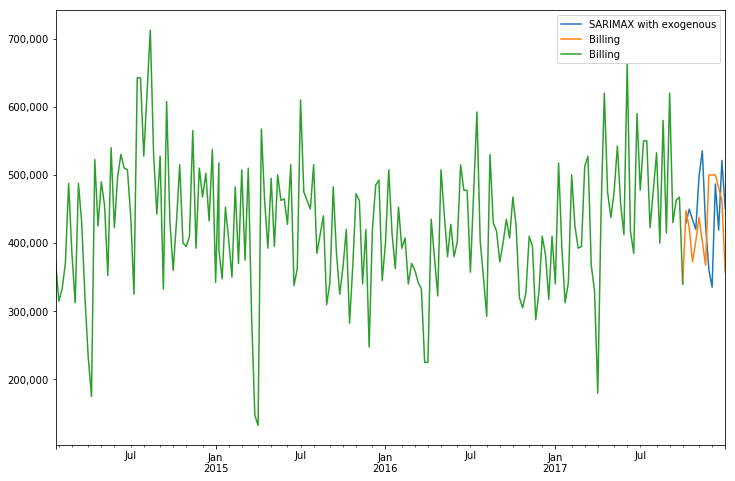

In [460]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test30['Billing'].plot(legend=True)
train30['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [461]:
error = rmse(test30['Billing'],predictions)
error

81299.32696721434

##### ARMA forecast into the future

In [462]:
model = ARMA(df30['Billing'],order=(1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  200
Model:                     ARMA(1, 1)   Log Likelihood               -2564.710
Method:                       css-mle   S.D. of innovations          89696.866
Date:                Mon, 30 May 2022   AIC                           5137.421
Time:                        17:47:58   BIC                           5150.614
Sample:                    12-31-2017   HQIC                          5142.760
                         - 01-26-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.248e+05   1.33e+04     32.006      0.000    3.99e+05    4.51e+05
ar.L1.Billing     0.8831      0.072     12.248      0.000       0.742       1.024
ma.L1.Billing    -0.7500      0.098     -7.619      0.000      -0.943      -0.557
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1323           +0.0000j            1.1323            0.0000
MA.1            1.3334           +0.0000j            1.3334            0.0000
-----------------------------------------------------------------------------
"""

In [463]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARMA (1,1) FORECAST')

In [464]:
len(fcast)

13

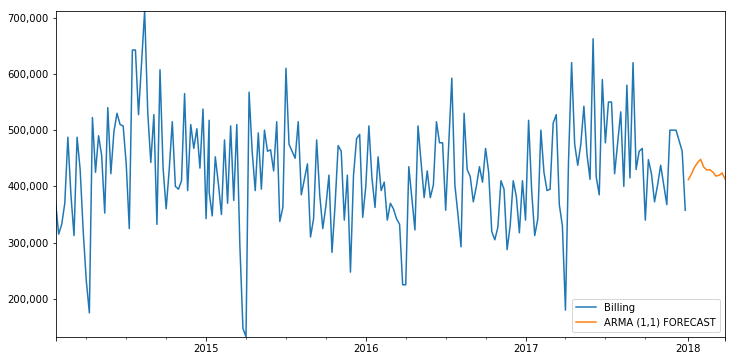

In [465]:
title = ''
ylabel = ''
xlabel = ''
ax = df30['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [304]:
model = SARIMAX(df30['Billing'],order=(2,1,3),seasonal_order=(2,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  200
Model:             SARIMAX(2, 1, 3)x(2, 1, 0, 52)   Log Likelihood               -1917.495
Date:                            Fri, 27 May 2022   AIC                           3850.990
Time:                                    15:45:13   BIC                           3874.913
Sample:                                12-31-2017   HQIC                          3860.710
                                     - 01-26-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1756      5.034      0.035      0.972      -9.690      10.041
ar.L2          0.2936      1.659      0.177      0.860      -2.958       3.546
ma.L1         -0.7979      5.052     -0.158      0.875     -10.700       9.104
ma.L2         -0.2944      2.085     -0.141      0.888      -4.380       3.791
ma.L3          0.2397      1.588      0.151      0.880      -2.873       3.352
ar.S.L52      -0.6740      0.111     -6.052      0.000      -0.892      -0.456
ar.S.L104     -0.3218      0.131     -2.453      0.014      -0.579      -0.065
sigma2      1.512e+10   4.39e-09   3.44e+18      0.000    1.51e+10    1.51e+10
===================================================================================
Ljung-Box (Q):                       38.50   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.54   Prob(JB):                         0.12
Heteroskedasticity (H):               1.31   Skew:                            -0.38
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+35. Standard errors may be unstable.
"""

In [305]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [306]:
len(fcast)

13

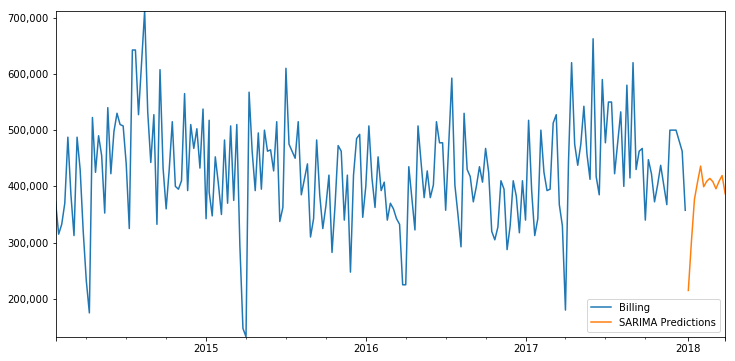

In [307]:
title = ''
ylabel = ''
xlabel = ''
ax = df30['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [467]:
df30.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-17/2014-02-23  Product_30    201407           1   201406   
2014-02-10/2014-02-16  Product_30    201406           1   201405   
2014-02-03/2014-02-09  Product_30    201405           1   201404   
2014-01-27/2014-02-02  Product_30    201404           1   201403   
2014-01-20/2014-01-26  Product_30    201403           1   201402   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-17/2014-02-23        535708  535708.0  487500.0  
2014-02-10/2014-02-16        413685  413685.0  370000.0  
2014-02-03/2014-02-09        293570  293570.0  332500.0  
2014-01-27/2014-02-02        315400  315400.0  315000.0  
2014-01-20/2014-01-26        370384  370384.0  372500.0

In [468]:
model = SARIMAX(df30['Billing'],exog=df30['Forecast'],order=(2,1,3),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  200
Model:             SARIMAX(2, 1, 3)x(2, 1, 0, 52)   Log Likelihood                -515.454
Date:                            Mon, 30 May 2022   AIC                           1048.908
Time:                                    17:52:58   BIC                           1064.330
Sample:                                12-31-2017   HQIC                          1054.524
                                     - 01-26-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.7658      0.188      4.083      0.000       0.398       1.133
ar.L1         -1.4840      0.147    -10.075      0.000      -1.773      -1.195
ar.L2         -1.0060      0.186     -5.418      0.000      -1.370      -0.642
ma.L1          0.5376      0.080      6.704      0.000       0.380       0.695
ma.L2         -0.4610      0.076     -6.087      0.000      -0.609      -0.313
ma.L3         -0.9758      0.087    -11.278      0.000      -1.145      -0.806
ar.S.L52      -0.6029      0.193     -3.119      0.002      -0.982      -0.224
ar.S.L104     -0.0289      0.262     -0.110      0.912      -0.543       0.485
sigma2      7.692e+09    1.3e-11   5.92e+20      0.000    7.69e+09    7.69e+09
===================================================================================
Ljung-Box (Q):                       26.44   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.95   Prob(JB):                         0.75
Heteroskedasticity (H):               0.82   Skew:                            -0.03
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+36. Standard errors may be unstable.
"""

In [469]:
exog_forecast = df30exo[:'2018-01-01'][['Forecast']]

In [470]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [471]:
len(fcast)

13

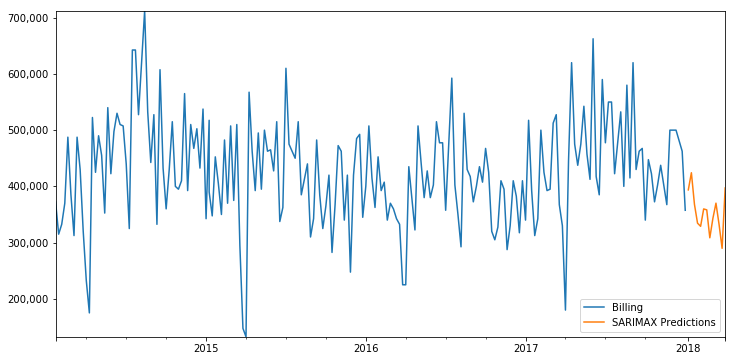

In [472]:
title = ''
ylabel = ''
xlabel = ''
ax = df30['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [473]:
fcast30 = _create_output(fcast,'Product_30')

## Product_39

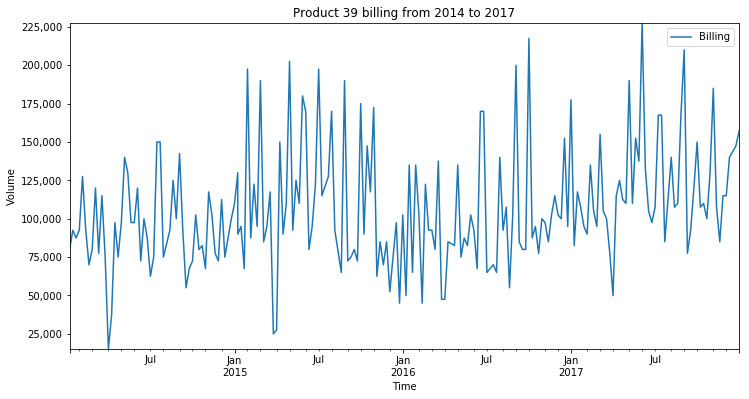

In [84]:
title = 'Product 39 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df39['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

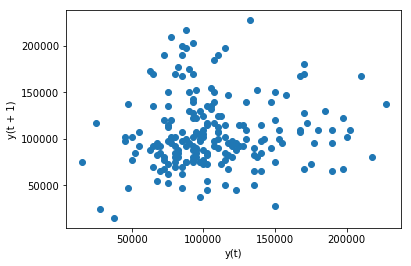

In [775]:
from pandas.plotting import lag_plot
lag_plot(df39['Billing'])

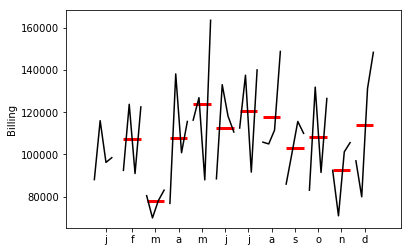

In [811]:
dfm = df39['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

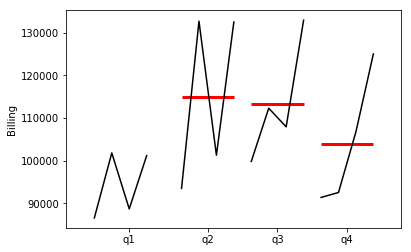

In [852]:
dfq = df39['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

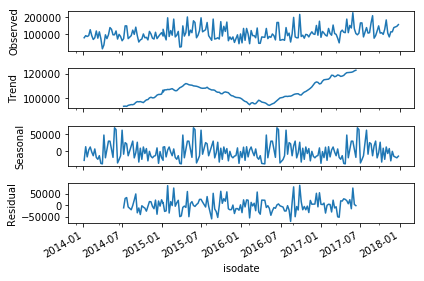

In [945]:
result = seasonal_decompose(df39['Billing'],model='add',freq=52)
result.plot();

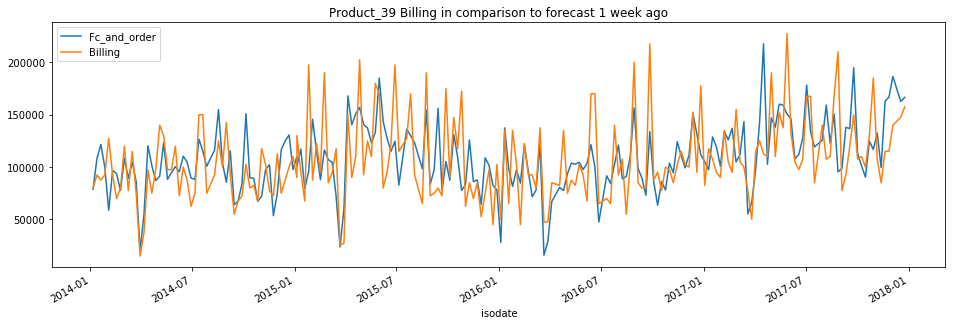

In [890]:
granger39_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_39 Billing in comparison to forecast 1 week ago');

In [921]:
MSE = mse(granger39_1['Fc_and_order'],granger39_1['Billing'])
RMSE = rmse(granger39_1['Fc_and_order'],granger39_1['Billing'])
MAE = meanabs(granger39_1['Fc_and_order'],granger39_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 1106959393.871
Client forecast RMSE: 33270.999
Client forecast  MAE: 25367.663


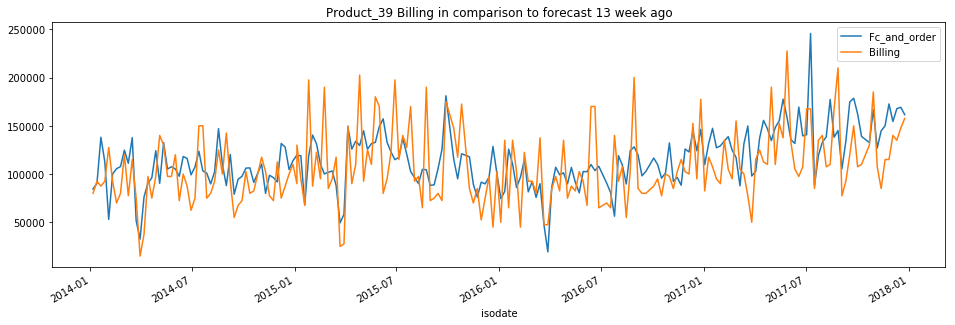

In [900]:
granger39_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_39 Billing in comparison to forecast 13 week ago');

In [922]:
MSE = mse(granger39_13['Fc_and_order'],granger39_13['Billing'])
RMSE = rmse(granger39_13['Fc_and_order'],granger39_13['Billing'])
MAE = meanabs(granger39_13['Fc_and_order'],granger39_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 1231176086.300
Client forecast RMSE: 35088.119
Client forecast  MAE: 28039.512


In [962]:
adf_test(df39['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.377204
p-value                   0.000004
# lags used               3.000000
# observations          198.000000
critical value (1%)      -3.463815
critical value (5%)      -2.876251
critical value (10%)     -2.574611
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [474]:
auto_arima(df39['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2403.028
Method:                       css-mle   S.D. of innovations          37440.152
Date:                Mon, 30 May 2022   AIC                           4812.057
Time:                        17:53:57   BIC                           4821.967
Sample:                             1   HQIC                          4816.067
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -197.9628    140.654     -1.407      0.161    -473.640      77.715
ma.L1.D.y     -0.9527      0.032    -30.083      0.000      -1.015      -0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0496           +0.0000j            1.0496            0.0000
-----------------------------------------------------------------------------
"""

In [475]:
train39 = df39['2017-09-30':]
test39 = df39[:'2017-09-30']

In [476]:
model = ARIMA(train39['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2262.362
Method:                       css-mle   S.D. of innovations          37995.419
Date:                Mon, 30 May 2022   AIC                           4530.725
Time:                        17:54:02   BIC                           4540.450
Sample:                    09-24-2017   HQIC                          4534.665
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -209.0796    164.246     -1.273      0.205    -530.995     112.836
ma.L1.D.Billing    -0.9471      0.032    -29.714      0.000      -1.010      -0.885
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0559           +0.0000j            1.0559            0.0000
-----------------------------------------------------------------------------
"""

In [477]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (0,1,1) Predictions')

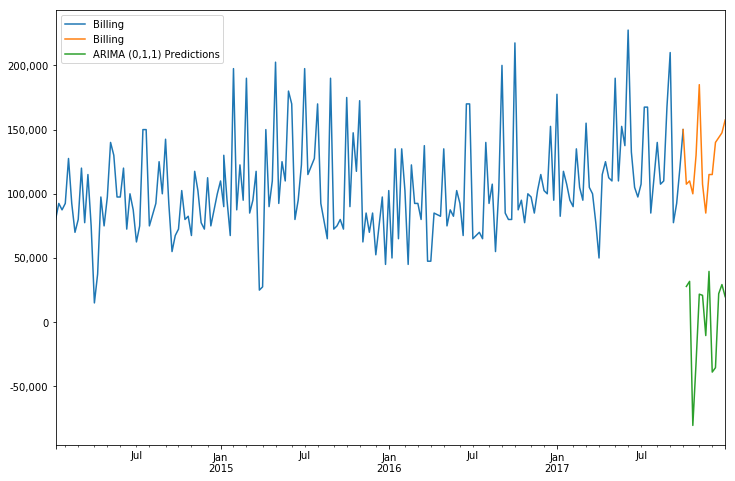

In [478]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train39['Billing'].plot(figsize=(12,8),legend=True)
test39['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [479]:
error = rmse(test39['Billing'],predictions)
error

131778.73154042906

In [200]:
auto_arima(df39['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(2, 0, 2)x(1, 1, 0, 52)   Log Likelihood               -1830.236
Date:                            Fri, 27 May 2022   AIC                           3674.471
Time:                                    14:03:58   BIC                           3695.546
Sample:                                         0   HQIC                          3683.033
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8515.9157   2.13e+04     -0.400      0.689   -5.02e+04    3.32e+04
ar.L1         -1.1133      0.158     -7.056      0.000      -1.423      -0.804
ar.L2         -0.8001      0.144     -5.551      0.000      -1.083      -0.518
ma.L1          1.2261      0.091     13.487      0.000       1.048       1.404
ma.L2          0.9215      0.091     10.178      0.000       0.744       1.099
ar.S.L52      -0.3353      0.087     -3.843      0.000      -0.506      -0.164
sigma2      3.175e+09      0.294   1.08e+10      0.000    3.18e+09    3.18e+09
===================================================================================
Ljung-Box (Q):                       42.28   Jarque-Bera (JB):                 8.62
Prob(Q):                              0.37   Prob(JB):                         0.01
Heteroskedasticity (H):               0.66   Skew:                             0.34
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.44e+30. Standard errors may be unstable.
"""

In [480]:
model = SARIMAX(train39['Billing'],order=(2,0,2),seasonal_order=(1,1,0,52),exog=train39['Fc_and_order'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(2, 0, 2)x(1, 1, 0, 52)   Log Likelihood               -1659.384
Date:                            Mon, 30 May 2022   AIC                           3332.769
Time:                                    17:54:45   BIC                           3353.259
Sample:                                10-01-2017   HQIC                          3341.096
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.8487      0.114      7.436      0.000       0.625       1.072
ar.L1            0.1400      0.087      1.603      0.109      -0.031       0.311
ar.L2           -0.9506      0.065    -14.611      0.000      -1.078      -0.823
ma.L1           -0.0763      0.123     -0.621      0.534      -0.317       0.164
ma.L2            0.8900      0.116      7.683      0.000       0.663       1.117
ar.S.L52        -0.5803      0.103     -5.652      0.000      -0.782      -0.379
sigma2        2.184e+09   9.39e-12   2.33e+20      0.000    2.18e+09    2.18e+09
===================================================================================
Ljung-Box (Q):                       44.00   Jarque-Bera (JB):                 2.70
Prob(Q):                              0.31   Prob(JB):                         0.26
Heteroskedasticity (H):               1.00   Skew:                             0.29
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+36. Standard errors may be unstable.
"""

In [481]:
start = '2017-10-02'
end = '2017-12-31'

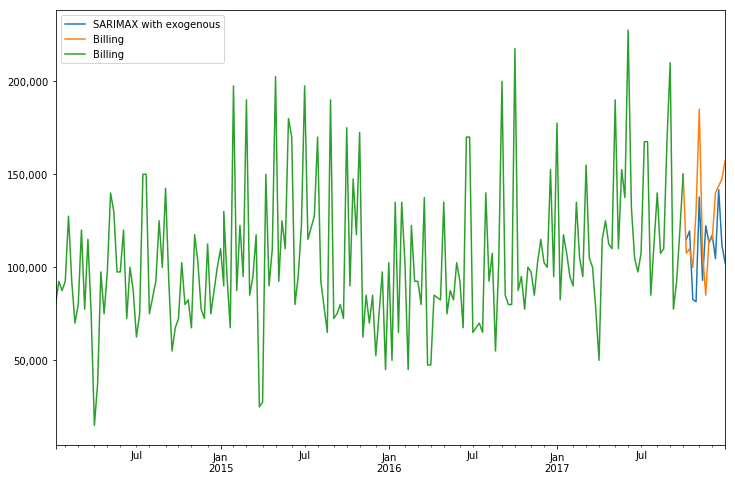

In [482]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test39['Billing'].plot(legend=True)
train39['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [483]:
error = rmse(test39['Billing'],predictions)
error

35549.03891207518

##### ARIMA forecast into the future

In [308]:
model = ARIMA(df39['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2403.041
Method:                       css-mle   S.D. of innovations          37441.972
Date:                Fri, 27 May 2022   AIC                           4812.083
Time:                        15:45:36   BIC                           4821.992
Sample:                    12-24-2017   HQIC                          4816.093
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -197.7307    139.931     -1.413      0.159    -471.990      76.529
ma.L1.D.Billing    -0.9530      0.032    -30.127      0.000      -1.015      -0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0493           +0.0000j            1.0493            0.0000
-----------------------------------------------------------------------------
"""

In [309]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (0,1,1) FORECAST')

In [310]:
len(fcast)

13

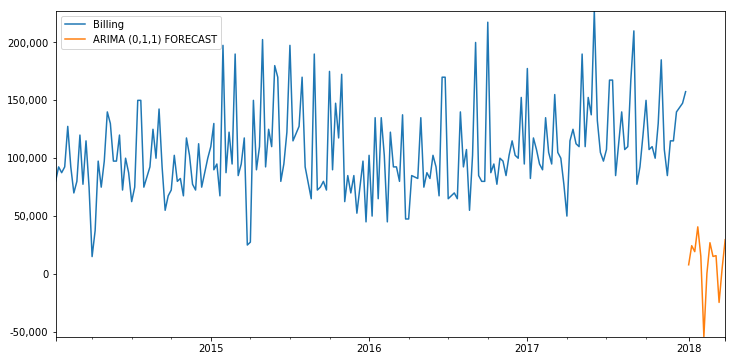

In [311]:
title = ''
ylabel = ''
xlabel = ''
ax = df39['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [315]:
model = SARIMAX(df39['Billing'],order=(2,0,2),seasonal_order=(1,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(2, 0, 2)x(1, 1, 0, 52)   Log Likelihood               -1827.689
Date:                            Fri, 27 May 2022   AIC                           3667.379
Time:                                    15:49:26   BIC                           3685.442
Sample:                                12-31-2017   HQIC                          3674.717
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0485      0.116      0.417      0.677      -0.179       0.276
ar.L2          0.9048      0.107      8.477      0.000       0.696       1.114
ma.L1          0.0220      0.087      0.253      0.801      -0.148       0.192
ma.L2         -0.9242      0.082    -11.296      0.000      -1.085      -0.764
ar.S.L52      -0.4996      0.100     -4.983      0.000      -0.696      -0.303
sigma2      3.234e+09   6.07e-12   5.33e+20      0.000    3.23e+09    3.23e+09
===================================================================================
Ljung-Box (Q):                       50.26   Jarque-Bera (JB):                 6.65
Prob(Q):                              0.13   Prob(JB):                         0.04
Heteroskedasticity (H):               0.82   Skew:                             0.43
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+37. Standard errors may be unstable.
"""

In [316]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [317]:
len(fcast)

13

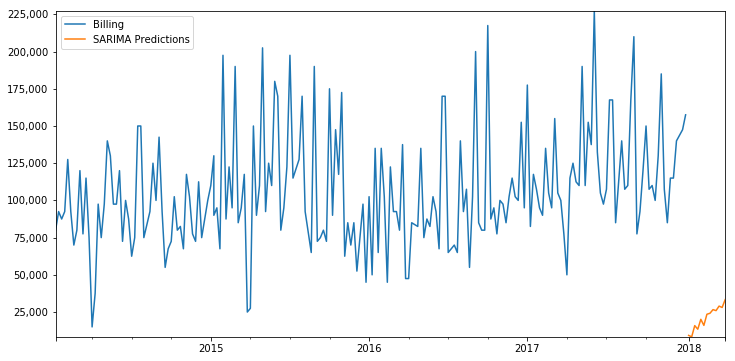

In [318]:
title = ''
ylabel = ''
xlabel = ''
ax = df39['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [181]:
df39.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_39    201405           1   201404   
2014-01-27/2014-02-02  Product_39    201404           1   201403   
2014-01-20/2014-01-26  Product_39    201403           1   201402   
2014-01-13/2014-01-19  Product_39    201402           1   201401   
2014-01-06/2014-01-12  Product_39    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09         58690   58690.0  127500.0  
2014-01-27/2014-02-02         99880   99880.0   92500.0  
2014-01-20/2014-01-26        121582  121582.0   87500.0  
2014-01-13/2014-01-19        108220  108220.0   92500.0  
2014-01-06/2014-01-12         78796   78796.0   80000.0

In [491]:
df19['Forecast']

isodate
2017-12-25/2017-12-31    182723.0
2017-12-18/2017-12-24    194600.0
2017-12-04/2017-12-10    328866.0
2017-11-27/2017-12-03    183804.0
2017-11-20/2017-11-26    230685.0
2017-11-13/2017-11-19    304025.0
2017-11-06/2017-11-12    276242.0
2017-10-30/2017-11-05    179161.0
2017-10-23/2017-10-29    244925.0
2017-10-16/2017-10-22    370097.0
2017-10-09/2017-10-15    118626.0
2017-10-02/2017-10-08    283202.0
2017-09-25/2017-10-01     84418.0
2017-09-18/2017-09-24    342961.0
2017-09-11/2017-09-17    241640.0
2017-09-04/2017-09-10    256965.0
2017-08-28/2017-09-03    207428.0
2017-08-21/2017-08-27    300943.0
2017-08-14/2017-08-20    312304.0
2017-08-07/2017-08-13    230769.0
2017-07-31/2017-08-06    150166.0
2017-07-17/2017-07-23    220462.0
2017-07-10/2017-07-16    306996.0
2017-07-03/2017-07-09    278106.0
2017-06-26/2017-07-02    113484.0
2017-06-19/2017-06-25    299267.0
2017-06-12/2017-06-18    213301.0
2017-06-05/2017-06-11    215540.0
2017-05-29/2017-06-04    248083.0
2017-0

In [492]:
model = SARIMAX(df39['Billing'],exog=df39['Forecast'],order=(2,0,2),seasonal_order=(1,1,0,52),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(2, 0, 2)x(1, 1, 0, 52)   Log Likelihood               -1802.852
Date:                            Mon, 30 May 2022   AIC                           3619.703
Time:                                    18:01:53   BIC                           3640.777
Sample:                                12-31-2017   HQIC                          3628.265
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.9013      0.118      7.644      0.000       0.670       1.132
ar.L1          0.1506      0.086      1.757      0.079      -0.017       0.319
ar.L2         -0.9511      0.067    -14.188      0.000      -1.082      -0.820
ma.L1         -0.0922      0.128     -0.721      0.471      -0.343       0.158
ma.L2          0.8826      0.117      7.547      0.000       0.653       1.112
ar.S.L52      -0.5991      0.102     -5.867      0.000      -0.799      -0.399
sigma2      2.248e+09   6.76e-12   3.33e+20      0.000    2.25e+09    2.25e+09
===================================================================================
Ljung-Box (Q):                       42.24   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.37   Prob(JB):                         0.11
Heteroskedasticity (H):               1.26   Skew:                             0.29
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+35. Standard errors may be unstable.
"""

In [494]:
exog_forecast = df39exo[:'2018-01-01'][['Forecast']]

In [495]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [496]:
len(fcast)

13

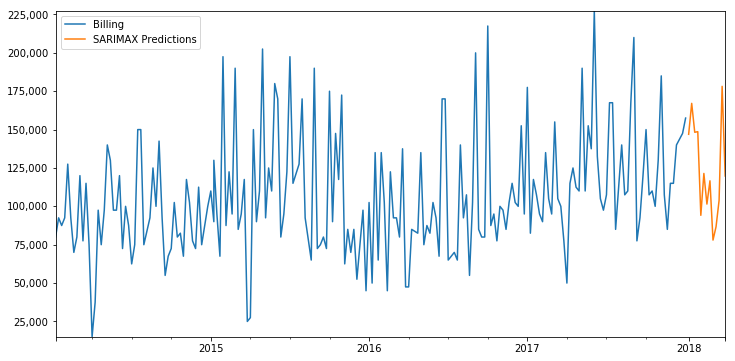

In [497]:
title = ''
ylabel = ''
xlabel = ''
ax = df39['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [498]:
fcast39 = _create_output(fcast,'Product_39')

## Product_48

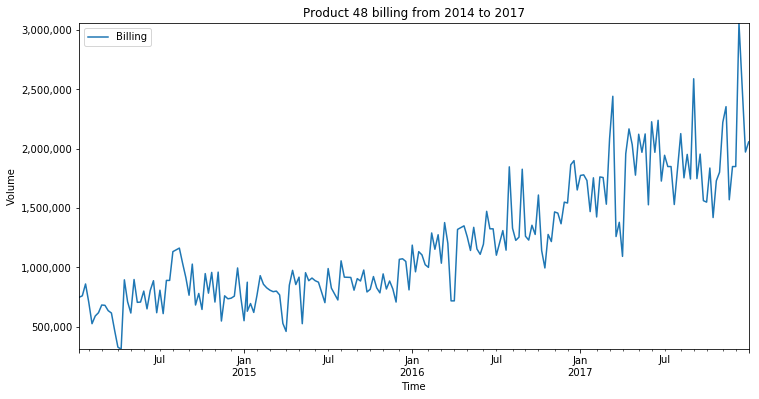

In [85]:
title = 'Product 48 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df48['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

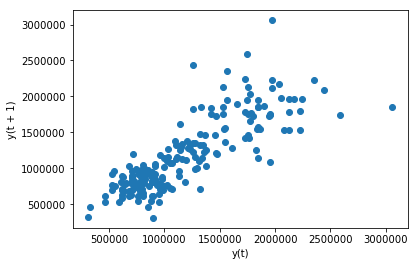

In [776]:
from pandas.plotting import lag_plot
lag_plot(df48['Billing'])

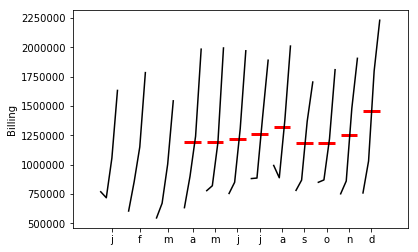

In [834]:
dfm = df48['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

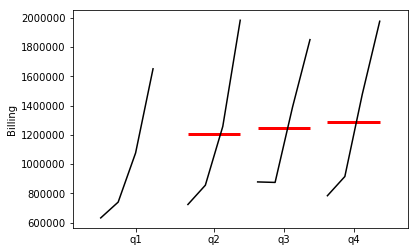

In [853]:
dfq = df48['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

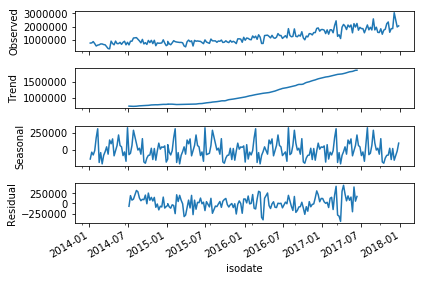

In [946]:
result = seasonal_decompose(df48['Billing'],model='add',freq=52)
result.plot();

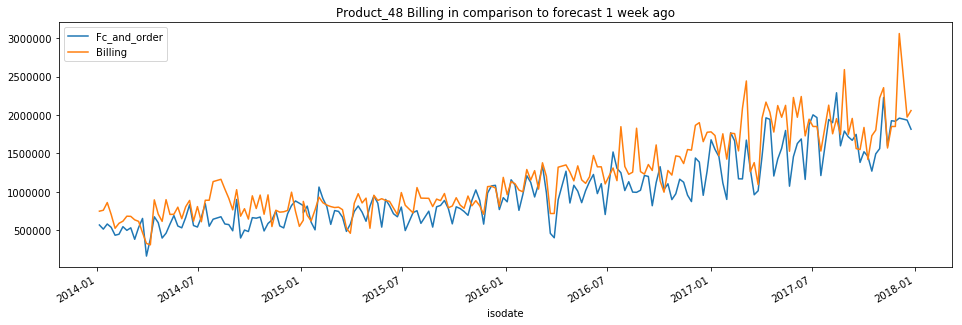

In [891]:
granger48_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_48 Billing in comparison to forecast 1 week ago');

In [923]:
MSE = mse(granger48_1['Fc_and_order'],granger48_1['Billing'])
RMSE = rmse(granger48_1['Fc_and_order'],granger48_1['Billing'])
MAE = meanabs(granger48_1['Fc_and_order'],granger48_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 91390991650.827
Client forecast RMSE: 302309.430
Client forecast  MAE: 229009.520


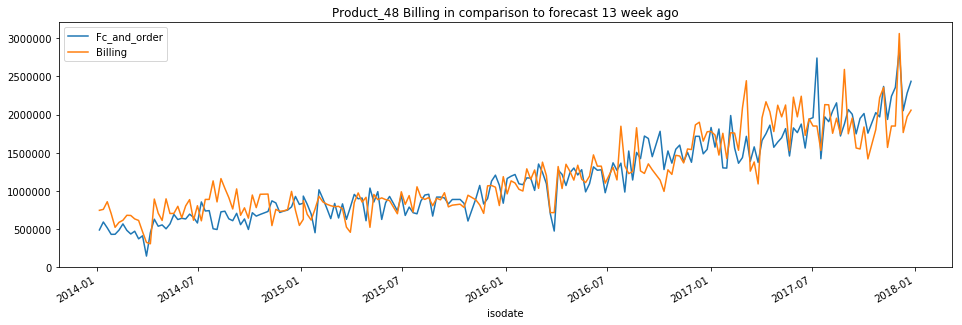

In [901]:
granger48_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_48 Billing in comparison to forecast 13 week ago');

In [924]:
MSE = mse(granger48_13['Fc_and_order'],granger48_13['Billing'])
RMSE = rmse(granger48_13['Fc_and_order'],granger48_13['Billing'])
MAE = meanabs(granger48_13['Fc_and_order'],granger48_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 59450101589.956
Client forecast RMSE: 243823.915
Client forecast  MAE: 192915.404


##### This is very interesting: The 13-week forecast seems to be more precise than the 1-week forecast.

In [963]:
adf_test(df48['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.974005
p-value                   0.762627
# lags used              13.000000
# observations          188.000000
critical value (1%)      -3.465620
critical value (5%)      -2.877040
critical value (10%)     -2.575032
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [320]:
auto_arima(df48['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2760.234
Method:                       css-mle   S.D. of innovations         221400.377
Date:                Sun, 29 May 2022   AIC                           5532.468
Time:                        14:50:19   BIC                           5552.288
Sample:                             1   HQIC                          5540.488
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7008.5370   1885.745     -3.717      0.000   -1.07e+04   -3312.544
ar.L1.D.y     -0.8063      0.081     -9.996      0.000      -0.964      -0.648
ar.L2.D.y      0.1871      0.080      2.353      0.020       0.031       0.343
ma.L1.D.y      0.0501      0.040      1.245      0.215      -0.029       0.129
ma.L2.D.y     -0.8639      0.036    -23.948      0.000      -0.935      -0.793
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0056           +0.0000j            1.0056            0.5000
AR.2            5.3149           +0.0000j            5.3149            0.0000
MA.1           -1.0472           +0.0000j            1.0472            0.5000
MA.2            1.1053           +0.0000j            1.1053            0.0000
-----------------------------------------------------------------------------
"""

In [321]:
train48 = df48['2017-09-30':]
test48 = df48[:'2017-09-30']

In [322]:
model = ARIMA(train48['Billing'],order=(2,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2579.307
Method:                       css-mle   S.D. of innovations         203283.018
Date:                Sun, 29 May 2022   AIC                           5170.614
Time:                        14:50:20   BIC                           5190.064
Sample:                    09-24-2017   HQIC                          5178.494
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6767.3646   2040.402     -3.317      0.001   -1.08e+04   -2768.250
ar.L1.D.Billing    -0.7595      0.088     -8.628      0.000      -0.932      -0.587
ar.L2.D.Billing     0.2311      0.086      2.701      0.008       0.063       0.399
ma.L1.D.Billing     0.0421      0.050      0.838      0.403      -0.056       0.141
ma.L2.D.Billing    -0.8414      0.043    -19.401      0.000      -0.926      -0.756
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0077           +0.0000j            1.0077            0.5000
AR.2            4.2936           +0.0000j            4.2936            0.0000
MA.1           -1.0655           +0.0000j            1.0655            0.5000
MA.2            1.1155           +0.0000j            1.1155            0.0000
-----------------------------------------------------------------------------
"""

In [323]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (2,1,2) Predictions')

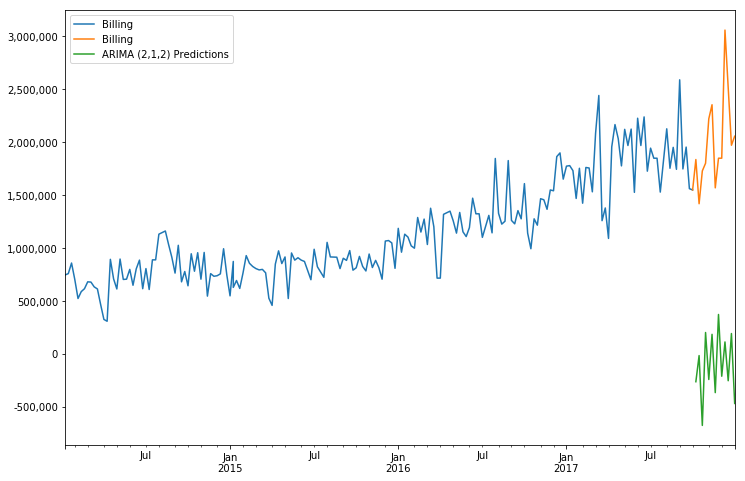

In [324]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train48['Billing'].plot(figsize=(12,8),legend=True)
test48['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [325]:
error = rmse(test48['Billing'],predictions)
error

2135394.5520815877

In [500]:
auto_arima(df48['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -2764.843
Date:                Mon, 30 May 2022   AIC                           5545.686
Time:                        18:07:17   BIC                           5572.112
Sample:                             0   HQIC                          5556.379
                                - 202                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.129e+04   7186.229     -2.962      0.003   -3.54e+04   -7201.537
ar.L1         -0.8246      0.077    -10.660      0.000      -0.976      -0.673
ar.L2          0.0606      0.086      0.705      0.481      -0.108       0.229
ar.L3         -0.3921      0.069     -5.682      0.000      -0.527      -0.257
ar.L4         -0.2895      0.053     -5.450      0.000      -0.394      -0.185
ma.L1          0.1709      0.064      2.673      0.008       0.046       0.296
ma.L2         -0.7606      0.048    -15.936      0.000      -0.854      -0.667
sigma2      4.607e+10      0.000   3.22e+14      0.000    4.61e+10    4.61e+10
===================================================================================
Ljung-Box (Q):                       46.33   Jarque-Bera (JB):                49.91
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+31. Standard errors may be unstable.
"""

In [327]:
model = SARIMAX(train48['Billing'],order=(4,1,2),seasonal_order=(0,0,0,52),exog=train48['Fc_and_order'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -2560.663
Date:                Sun, 29 May 2022   AIC                           5137.325
Time:                        14:50:55   BIC                           5163.259
Sample:                    10-01-2017   HQIC                          5147.832
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.5388      0.058      9.251      0.000       0.425       0.653
ar.L1           -0.7835      0.093     -8.389      0.000      -0.967      -0.600
ar.L2            0.1132      0.132      0.855      0.392      -0.146       0.373
ar.L3           -0.1383      0.121     -1.139      0.255      -0.376       0.100
ar.L4           -0.0512      0.073     -0.701      0.483      -0.194       0.092
ma.L1            0.1325      0.086      1.545      0.122      -0.036       0.301
ma.L2           -0.7624      0.073    -10.383      0.000      -0.906      -0.618
sigma2        3.145e+10   2.87e-12    1.1e+22      0.000    3.15e+10    3.15e+10
===================================================================================
Ljung-Box (Q):                       40.51   Jarque-Bera (JB):                38.23
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.63e+38. Standard errors may be unstable.
"""

In [328]:
start = '2017-10-02'
end = '2017-12-31'

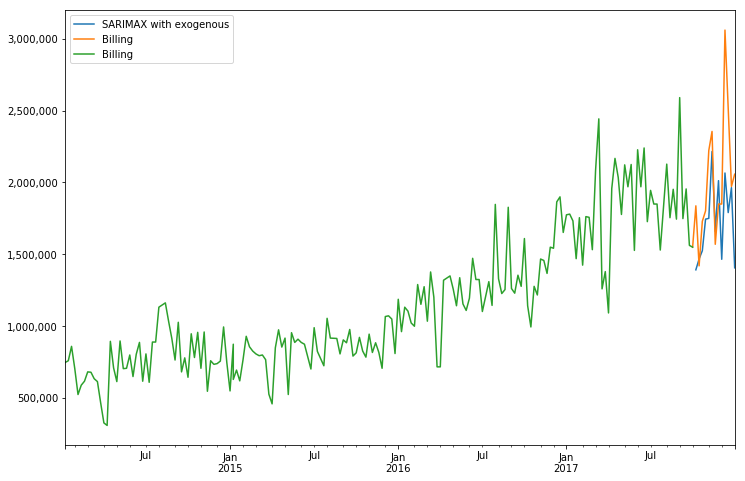

In [329]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test48['Billing'].plot(legend=True)
train48['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [330]:
error = rmse(test48['Billing'],predictions)
error

582959.2962450902

##### ARIMA forecast into the future

In [331]:
model = ARIMA(df48['Billing'],order=(2,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  201
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2760.234
Method:                       css-mle   S.D. of innovations         221400.405
Date:                Sun, 29 May 2022   AIC                           5532.468
Time:                        14:53:06   BIC                           5552.288
Sample:                    12-24-2017   HQIC                          5540.488
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7008.5384   1885.985     -3.716      0.000   -1.07e+04   -3312.077
ar.L1.D.Billing    -0.8062      0.081     -9.995      0.000      -0.964      -0.648
ar.L2.D.Billing     0.1872      0.080      2.354      0.020       0.031       0.343
ma.L1.D.Billing     0.0501      0.040      1.245      0.215      -0.029       0.129
ma.L2.D.Billing    -0.8639      0.036    -23.945      0.000      -0.935      -0.793
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0056           +0.0000j            1.0056            0.5000
AR.2            5.3128           +0.0000j            5.3128            0.0000
MA.1           -1.0473           +0.0000j            1.0473            0.5000
MA.2            1.1053           +0.0000j            1.1053            0.0000
-----------------------------------------------------------------------------
"""

In [332]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (2,1,2) FORECAST')

In [333]:
len(fcast)

13

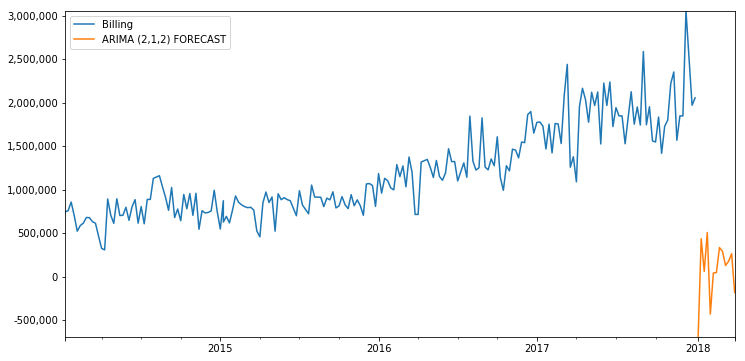

In [335]:
title = ''
ylabel = ''
xlabel = ''
ax = df48['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [336]:
model = SARIMAX(df48['Billing'],order=(4,1,2),seasonal_order=(0,0,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -2766.472
Date:                Sun, 29 May 2022   AIC                           5546.944
Time:                        14:55:05   BIC                           5570.067
Sample:                    12-31-2017   HQIC                          5556.301
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8221      0.080    -10.249      0.000      -0.979      -0.665
ar.L2          0.0850      0.091      0.929      0.353      -0.094       0.264
ar.L3         -0.3577      0.073     -4.884      0.000      -0.501      -0.214
ar.L4         -0.2762      0.055     -5.052      0.000      -0.383      -0.169
ma.L1          0.2039      0.068      2.999      0.003       0.071       0.337
ma.L2         -0.7322      0.051    -14.233      0.000      -0.833      -0.631
sigma2      4.673e+10   4.77e-13    9.8e+22      0.000    4.67e+10    4.67e+10
===================================================================================
Ljung-Box (Q):                       46.08   Jarque-Bera (JB):                69.11
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+38. Standard errors may be unstable.
"""

In [337]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [338]:
len(fcast)

13

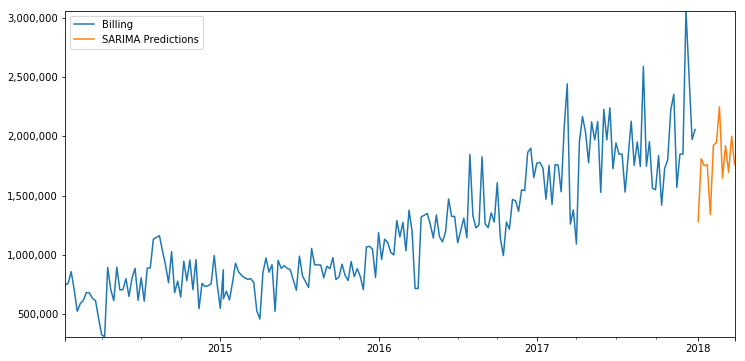

In [339]:
title = ''
ylabel = ''
xlabel = ''
ax = df48['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMAX forecast into the future

In [189]:
df48.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_48    201405           1   201404   
2014-01-27/2014-02-02  Product_48    201404           1   201403   
2014-01-20/2014-01-26  Product_48    201403           1   201402   
2014-01-13/2014-01-19  Product_48    201402           1   201401   
2014-01-06/2014-01-12  Product_48    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        434506  434506.0  525000.0  
2014-01-27/2014-02-02        537354  537354.0  705000.0  
2014-01-20/2014-01-26        580756  580756.0  860000.0  
2014-01-13/2014-01-19        514092  514092.0  760000.0  
2014-01-06/2014-01-12        567903  567903.0  747500.0

In [523]:
model = SARIMAX(df48['Billing'],exog=df48['Forecast'],order=(4,1,2),seasonal_order=(0,0,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -2667.832
Date:                Mon, 30 May 2022   AIC                           5351.665
Time:                        18:13:50   BIC                           5377.930
Sample:                    12-31-2017   HQIC                          5362.297
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.5159      0.063      8.128      0.000       0.391       0.640
ar.L1          0.0387      0.416      0.093      0.926      -0.776       0.854
ar.L2         -0.0396      0.087     -0.457      0.648      -0.209       0.130
ar.L3         -0.1936      0.075     -2.580      0.010      -0.341      -0.046
ar.L4          0.0454      0.111      0.408      0.683      -0.173       0.263
ma.L1         -0.7761      0.419     -1.850      0.064      -1.598       0.046
ma.L2         -0.0213      0.348     -0.061      0.951      -0.703       0.661
sigma2      3.492e+10   1.48e-11   2.35e+21      0.000    3.49e+10    3.49e+10
===================================================================================
Ljung-Box (Q):                       40.90   Jarque-Bera (JB):                24.30
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+38. Standard errors may be unstable.
"""

In [524]:
exog_forecast = df48exo[:'2018-01-01'][['Forecast']]

In [525]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [526]:
len(fcast)

13

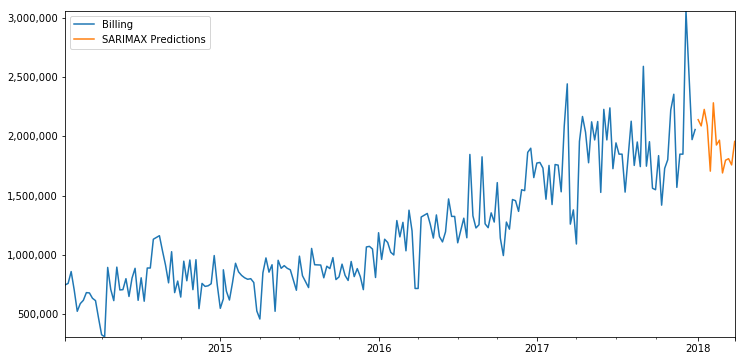

In [527]:
title = ''
ylabel = ''
xlabel = ''
ax = df48['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [529]:
fcast48 = _create_output(fcast,'Product_48')

## Product_50

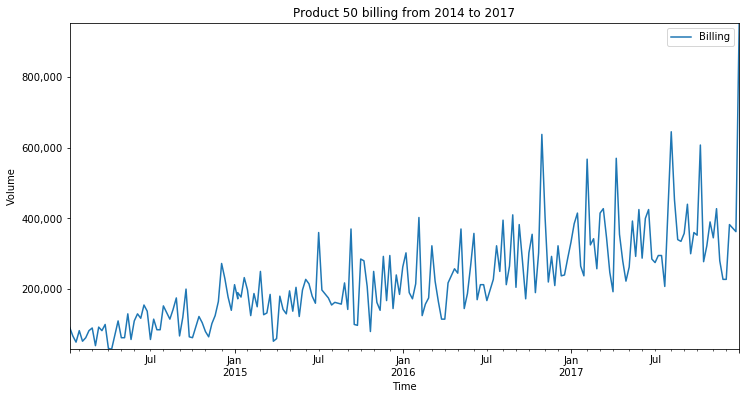

In [86]:
title = 'Product 50 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

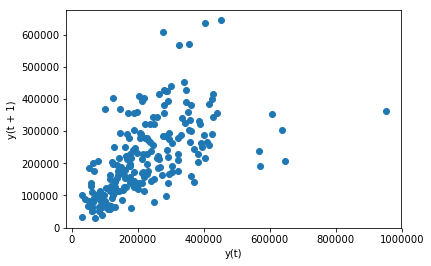

In [777]:
from pandas.plotting import lag_plot
lag_plot(df50['Billing'])

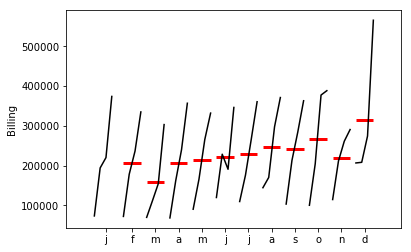

In [855]:
dfm = df50['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

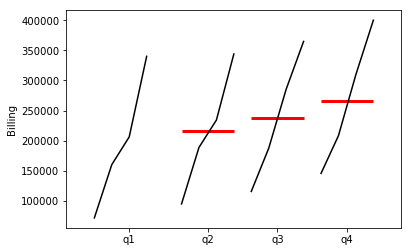

In [856]:
dfq = df50['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

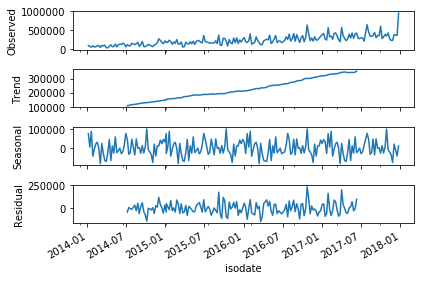

In [947]:
result = seasonal_decompose(df50['Billing'],model='add',freq=52)
result.plot();

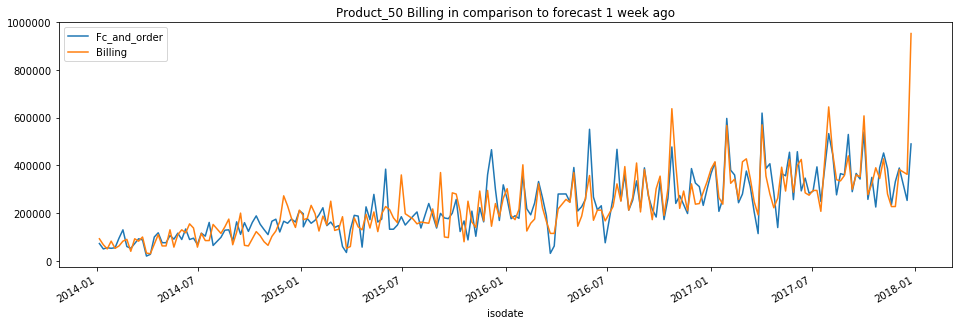

In [892]:
granger50_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_50 Billing in comparison to forecast 1 week ago');

In [925]:
MSE = mse(granger50_1['Fc_and_order'],granger50_1['Billing'])
RMSE = rmse(granger50_1['Fc_and_order'],granger50_1['Billing'])
MAE = meanabs(granger50_1['Fc_and_order'],granger50_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 5465300593.391
Client forecast RMSE: 73927.671
Client forecast  MAE: 51162.589


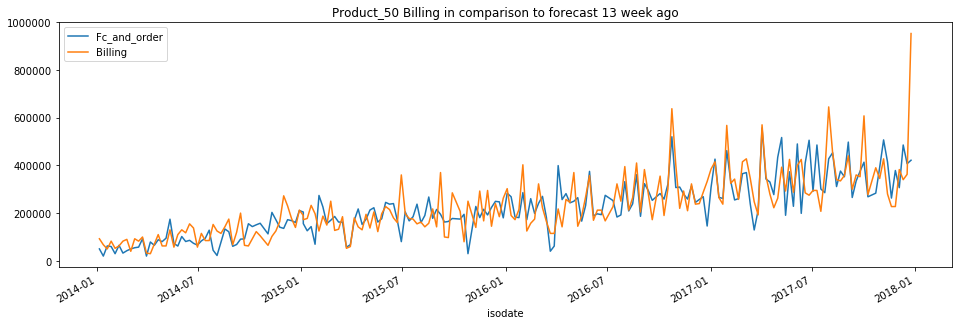

In [902]:
granger50_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_50 Billing in comparison to forecast 13 week ago');

In [926]:
MSE = mse(granger50_13['Fc_and_order'],granger50_13['Billing'])
RMSE = rmse(granger50_13['Fc_and_order'],granger50_13['Billing'])
MAE = meanabs(granger50_13['Fc_and_order'],granger50_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 7453162084.631
Client forecast RMSE: 86331.698
Client forecast  MAE: 60537.970


In [964]:
adf_test(df50['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.530163
p-value                   0.885995
# lags used              10.000000
# observations          191.000000
critical value (1%)      -3.465059
critical value (5%)      -2.876794
critical value (10%)     -2.574901
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [530]:
auto_arima(df50['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 4); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_co

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2570.741
Method:                       css-mle   S.D. of innovations          84955.222
Date:                Mon, 30 May 2022   AIC                           5155.481
Time:                        18:14:24   BIC                           5178.604
Sample:                             1   HQIC                          5164.838
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1650.5083     72.769    -22.682      0.000   -1793.132   -1507.884
ar.L1.D.y     -0.2140      0.203     -1.057      0.292      -0.611       0.183
ar.L2.D.y      0.6366      0.192      3.307      0.001       0.259       1.014
ma.L1.D.y     -0.8010      0.170     -4.710      0.000      -1.134      -0.468
ma.L2.D.y     -1.0000      0.030    -33.859      0.000      -1.058      -0.942
ma.L3.D.y      0.8010      0.169      4.727      0.000       0.469       1.133
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0965           +0.0000j            1.0965            0.5000
AR.2            1.4327           +0.0000j            1.4327            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
MA.3            1.2485           +0.0000j            1.2485            0.0000
-----------------------------------------------------------------------------
"""

In [531]:
train50 = df50['2017-09-30':]
test50 = df50[:'2017-09-30']

In [532]:
model = ARIMA(train50['Billing'],order=(2,1,3))
results = model.fit()
results.summary()

LinAlgError: SVD did not converge

In [228]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (0,1,1) Predictions')

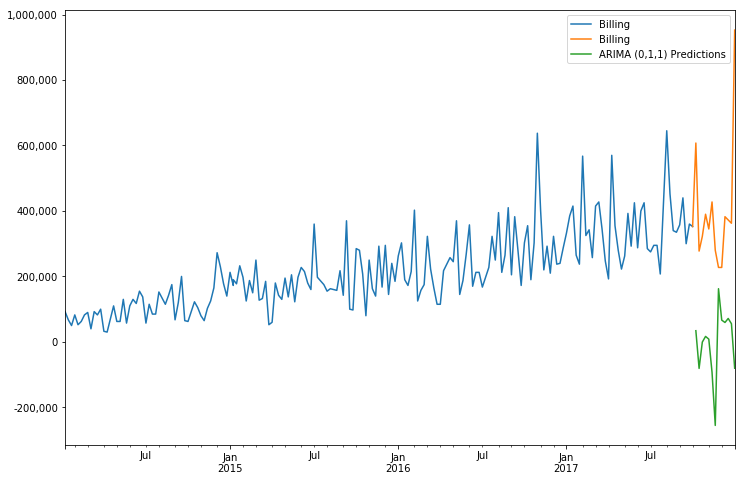

In [229]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train50['Billing'].plot(figsize=(12,8),legend=True)
test50['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [230]:
error = rmse(test50['Billing'],predictions)
error

449370.0225074597

In [223]:
auto_arima(df50['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2555.231
Date:                Fri, 27 May 2022   AIC                           5124.462
Time:                        14:25:56   BIC                           5147.585
Sample:                             0   HQIC                          5133.819
                                - 202                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5444.7075   1821.571     -2.989      0.003   -9014.921   -1874.494
ar.L1         -1.0488      0.078    -13.494      0.000      -1.201      -0.896
ar.L2         -0.2276      0.124     -1.841      0.066      -0.470       0.015
ar.L3         -0.1267      0.089     -1.420      0.156      -0.302       0.048
ma.L1          0.0727      0.120      0.605      0.545      -0.163       0.308
ma.L2         -0.9248      0.086    -10.739      0.000      -1.094      -0.756
sigma2      6.852e+09   2.85e-05    2.4e+14      0.000    6.85e+09    6.85e+09
===================================================================================
Ljung-Box (Q):                       55.75   Jarque-Bera (JB):                75.00
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.11e+31. Standard errors may be unstable.
"""

In [233]:
model = SARIMAX(train50['Billing'],order=(3,1,2),seasonal_order=(0,0,0,52),exog=train50['Fc_and_order'],enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2309.263
Date:                Fri, 27 May 2022   AIC                           4632.527
Time:                        14:29:12   BIC                           4655.107
Sample:                    10-01-2017   HQIC                          4641.677
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.6373      0.047     13.426      0.000       0.544       0.730
ar.L1           -0.8566      0.096     -8.897      0.000      -1.045      -0.668
ar.L2           -0.0074      0.137     -0.054      0.957      -0.276       0.261
ar.L3           -0.0188      0.104     -0.181      0.856      -0.222       0.184
ma.L1            0.0113      0.065      0.174      0.861      -0.116       0.139
ma.L2           -0.8737      0.066    -13.226      0.000      -1.003      -0.744
sigma2        3.853e+09   6.68e-12   5.76e+20      0.000    3.85e+09    3.85e+09
===================================================================================
Ljung-Box (Q):                       29.92   Jarque-Bera (JB):                25.23
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.24e+36. Standard errors may be unstable.
"""

In [234]:
start = '2017-10-02'
end = '2017-12-31'

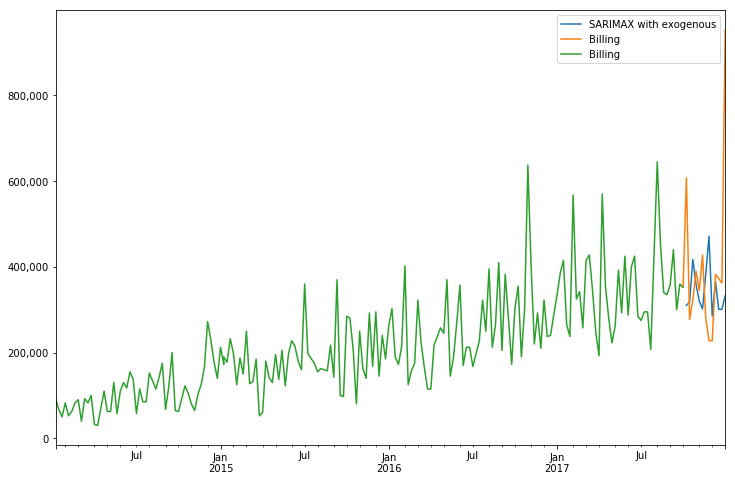

In [235]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test50['Billing'].plot(legend=True)
train50['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [236]:
error = rmse(test50['Billing'],predictions)
error

209061.7884062558

##### ARIMA forecast into the future

In [340]:
model = ARIMA(df50['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2575.272
Method:                       css-mle   S.D. of innovations          87570.484
Date:                Sun, 29 May 2022   AIC                           5156.544
Time:                        14:56:17   BIC                           5166.454
Sample:                    12-24-2017   HQIC                          5160.554
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1665.6221    105.661    -15.764      0.000   -1872.714   -1458.530
ma.L1.D.Billing    -0.9999      0.014    -69.333      0.000      -1.028      -0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [341]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (0,1,1) FORECAST')

In [342]:
len(fcast)

13

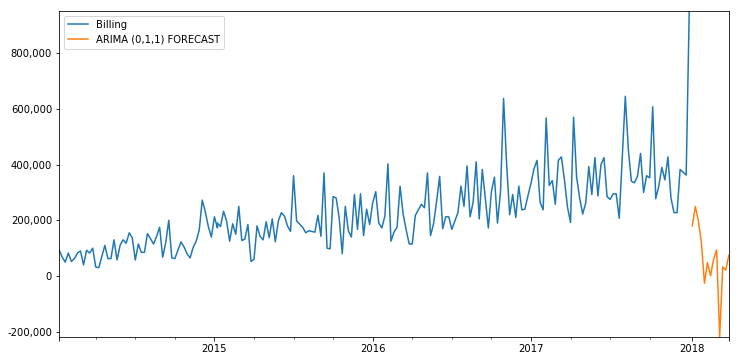

In [343]:
title = ''
ylabel = ''
xlabel = ''
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [542]:
model = SARIMAX(df50['Billing'],order=(3,1,2),seasonal_order=(0,0,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2558.679
Date:                Mon, 30 May 2022   AIC                           5129.357
Time:                        18:23:40   BIC                           5149.177
Sample:                    12-31-2017   HQIC                          5137.377
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0403      0.489      0.082      0.934      -0.919       0.999
ar.L2         -0.1488      0.081     -1.842      0.065      -0.307       0.010
ar.L3         -0.1055      0.077     -1.367      0.172      -0.257       0.046
ma.L1         -0.9718      0.512     -1.897      0.058      -1.976       0.032
ma.L2          0.1045      0.463      0.226      0.822      -0.803       1.012
sigma2      6.883e+09   6.31e-11   1.09e+20      0.000    6.88e+09    6.88e+09
===================================================================================
Ljung-Box (Q):                       62.79   Jarque-Bera (JB):                88.27
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+36. Standard errors may be unstable.
"""

In [543]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [544]:
len(fcast)

13

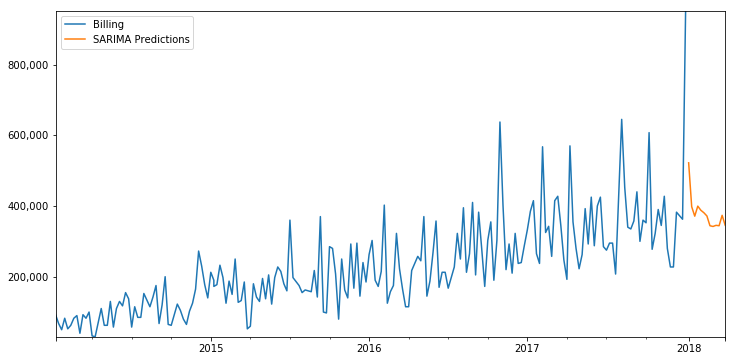

In [545]:
title = ''
ylabel = ''
xlabel = ''
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [546]:
fcast50 = _create_output(fcast,'Product_50')

##### SARIMAX forecast into the future

In [196]:
df50.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_50    201405           1   201404   
2014-01-27/2014-02-02  Product_50    201404           1   201403   
2014-01-20/2014-01-26  Product_50    201403           1   201402   
2014-01-13/2014-01-19  Product_50    201402           1   201401   
2014-01-06/2014-01-12  Product_50    201401           1   201352   

                       Fc_and_order  Forecast  Billing  
isodate                                                 
2014-02-03/2014-02-09         55000   55000.0  52500.0  
2014-01-27/2014-02-02         52500   52500.0  82500.0  
2014-01-20/2014-01-26         55000   55000.0  50000.0  
2014-01-13/2014-01-19         50000   50000.0  67500.0  
2014-01-06/2014-01-12         72500   72500.0  92500.0

In [535]:
model = SARIMAX(df50['Billing'],exog=df50['Forecast'],order=(3,1,2),seasonal_order=(0,0,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2474.751
Date:                Mon, 30 May 2022   AIC                           4963.502
Time:                        18:18:53   BIC                           4986.520
Sample:                    12-31-2017   HQIC                          4972.819
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.6414      0.044     14.597      0.000       0.555       0.728
ar.L1         -0.8460      0.099     -8.553      0.000      -1.040      -0.652
ar.L2         -0.0934      0.150     -0.621      0.535      -0.388       0.201
ar.L3          0.0107      0.089      0.120      0.904      -0.164       0.185
ma.L1          0.1690      0.086      1.973      0.049       0.001       0.337
ma.L2         -0.5708      0.075     -7.639      0.000      -0.717      -0.424
sigma2      3.949e+09   2.64e-11   1.49e+20      0.000    3.95e+09    3.95e+09
===================================================================================
Ljung-Box (Q):                       44.17   Jarque-Bera (JB):                17.60
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+35. Standard errors may be unstable.
"""

In [536]:
exog_forecast = df50exo[:'2018-01-01'][['Forecast']]

In [537]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [538]:
len(fcast)

13

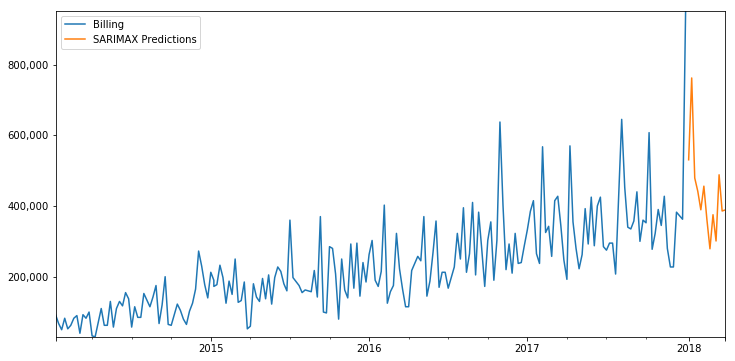

In [539]:
title = ''
ylabel = ''
xlabel = ''
ax = df50['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [541]:
exog_forecast

Forecast
isodate                        
2018-03-26/2018-04-01  137995.0
2018-03-19/2018-03-25  377736.0
2018-03-12/2018-03-18  361858.0
2018-03-05/2018-03-11  342306.0
2018-02-26/2018-03-04  245535.0
2018-02-19/2018-02-25  506222.0
2018-02-12/2018-02-18  347934.0
2018-02-05/2018-02-11  411940.0
2018-01-29/2018-02-04  333723.0
2018-01-22/2018-01-28  438153.0
2018-01-15/2018-01-21  333656.0
2018-01-08/2018-01-14  442446.0
2018-01-01/2018-01-07  338477.0

In [540]:
fcast

2018-01-01/2018-01-07    530682.596067
2018-01-08/2018-01-14    762092.541041
2018-01-15/2018-01-21    479143.407491
2018-01-22/2018-01-28    441650.768766
2018-01-29/2018-02-04    389262.002522
2018-02-05/2018-02-11    456068.710333
2018-02-12/2018-02-18    361316.513353
2018-02-19/2018-02-25    278882.919359
2018-02-26/2018-03-04    375302.220475
2018-03-05/2018-03-11    300990.691111
2018-03-12/2018-03-18    488231.649137
2018-03-19/2018-03-25    385791.179461
2018-03-26/2018-04-01    388808.600856
Freq: W-SUN, Name: SARIMAX Predictions, dtype: float64

In [529]:
fcast48 = _create_output(fcast,'Product_48')

## Product_55

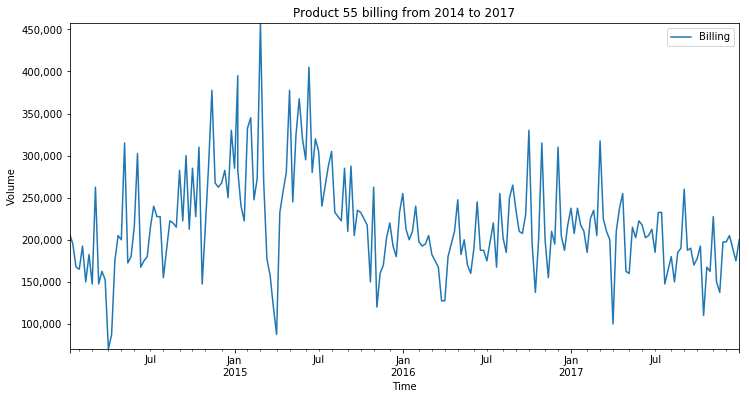

In [87]:
title = 'Product 55 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df55['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

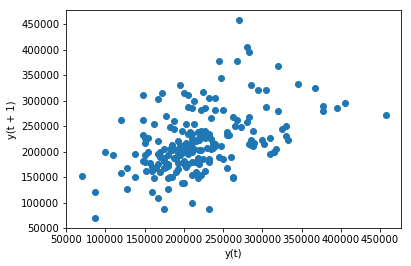

In [778]:
from pandas.plotting import lag_plot
lag_plot(df55['Billing'])

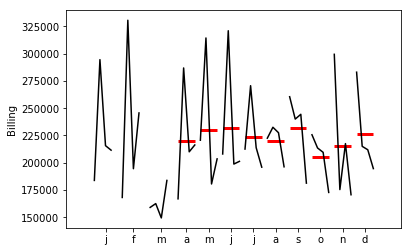

In [832]:
dfm = df55['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

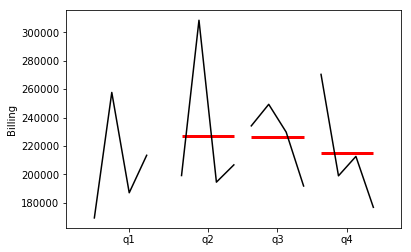

In [857]:
dfq = df55['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

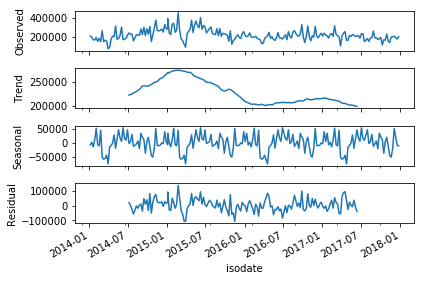

In [948]:
result = seasonal_decompose(df55['Billing'],model='add',freq=52)
result.plot();

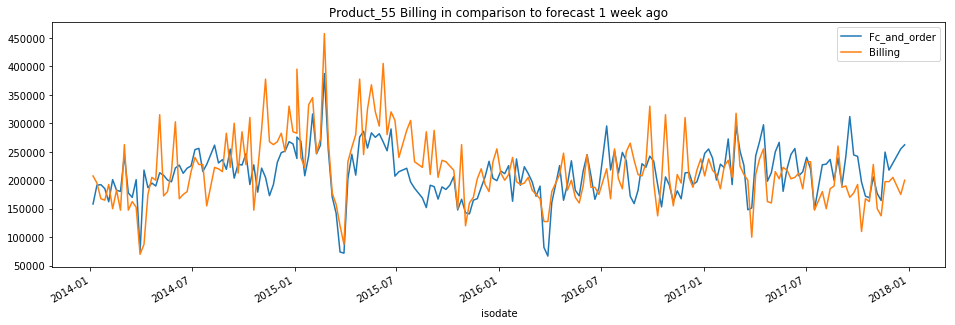

In [893]:
granger55_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_55 Billing in comparison to forecast 1 week ago');

In [927]:
MSE = mse(granger55_1['Fc_and_order'],granger55_1['Billing'])
RMSE = rmse(granger55_1['Fc_and_order'],granger55_1['Billing'])
MAE = meanabs(granger55_1['Fc_and_order'],granger55_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 2581889480.069
Client forecast RMSE: 50812.297
Client forecast  MAE: 39120.663


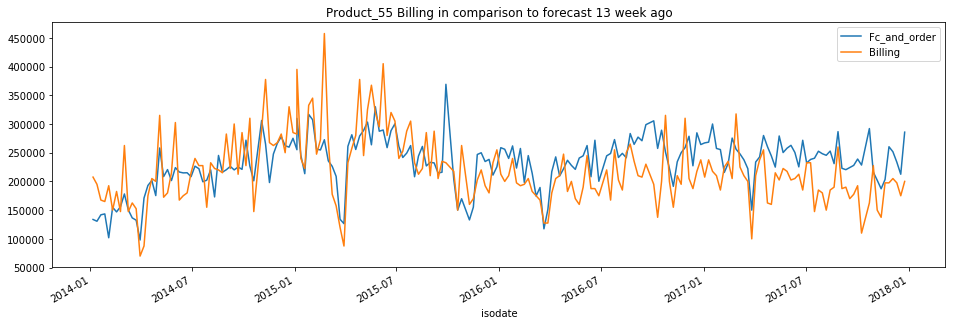

In [903]:
granger55_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_55 Billing in comparison to forecast 13 week ago');

In [928]:
MSE = mse(granger55_13['Fc_and_order'],granger55_13['Billing'])
RMSE = rmse(granger55_13['Fc_and_order'],granger55_13['Billing'])
MAE = meanabs(granger55_13['Fc_and_order'],granger55_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 2719082366.217
Client forecast RMSE: 52144.821
Client forecast  MAE: 41833.468


In [965]:
adf_test(df55['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.680533
p-value                   0.077468
# lags used               9.000000
# observations          192.000000
critical value (1%)      -3.464875
critical value (5%)      -2.876714
critical value (10%)     -2.574859
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [558]:
auto_arima(df55['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2466.387
Method:                       css-mle   S.D. of innovations          51484.593
Date:                Mon, 30 May 2022   AIC                           4940.775
Time:                        18:27:36   BIC                           4953.988
Sample:                             1   HQIC                          4946.122
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7706    632.061     -0.023      0.981   -1253.587    1224.046
ar.L1.D.y      0.1866      0.087      2.139      0.034       0.016       0.358
ma.L1.D.y     -0.8628      0.047    -18.431      0.000      -0.955      -0.771
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.3587           +0.0000j            5.3587            0.0000
MA.1            1.1591           +0.0000j            1.1591            0.0000
-----------------------------------------------------------------------------
"""

In [548]:
train55 = df55['2017-09-30':]
test55 = df55[:'2017-09-30']

In [549]:
model = ARIMA(train55['Billing'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2322.239
Method:                       css-mle   S.D. of innovations          52327.491
Date:                Mon, 30 May 2022   AIC                           4652.477
Time:                        18:25:23   BIC                           4665.444
Sample:                    09-24-2017   HQIC                          4657.730
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -43.8666    664.697     -0.066      0.947   -1346.649    1258.916
ar.L1.D.Billing     0.1934      0.090      2.150      0.033       0.017       0.370
ma.L1.D.Billing    -0.8638      0.048    -17.881      0.000      -0.959      -0.769
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.1704           +0.0000j            5.1704            0.0000
MA.1            1.1577           +0.0000j            1.1577            0.0000
-----------------------------------------------------------------------------
"""

In [550]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (1,1,1) Predictions')

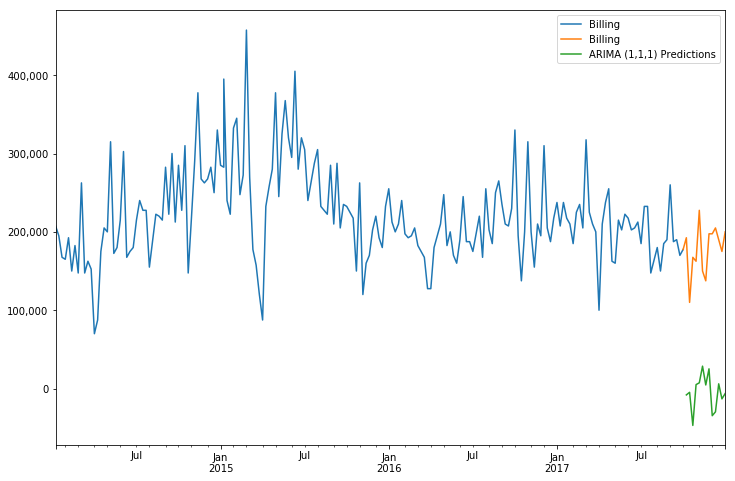

In [551]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train55['Billing'].plot(figsize=(12,8),legend=True)
test55['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [242]:
error = rmse(test55['Billing'],predictions)
error

186089.87802174038

In [609]:
auto_arima(df55['Billing'],seasonal=True,m=52,start_p=0,start_q=0).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2467.932
Date:                Mon, 30 May 2022   AIC                           4943.864
Time:                        18:35:00   BIC                           4957.078
Sample:                             0   HQIC                          4949.211
                                - 202                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -38.8023    578.600     -0.067      0.947   -1172.837    1095.233
ar.L1          0.1958      0.075      2.615      0.009       0.049       0.343
ma.L1         -0.8598      0.038    -22.383      0.000      -0.935      -0.785
sigma2      2.878e+09      0.000   6.22e+12      0.000    2.88e+09    2.88e+09
===================================================================================
Ljung-Box (Q):                       52.13   Jarque-Bera (JB):                34.17
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.54e+27. Standard errors may be unstable.
"""

In [610]:
model = SARIMAX(train55['Billing'],order=(1,1,1),seasonal_order=(0,0,0,52),exog=train55['Fc_and_order'],enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2264.825
Date:                Mon, 30 May 2022   AIC                           4537.651
Time:                        18:35:11   BIC                           4550.575
Sample:                    10-01-2017   HQIC                          4542.888
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.7260      0.067     10.839      0.000       0.595       0.857
ar.L1           -0.0438      0.094     -0.464      0.643      -0.229       0.141
ma.L1           -0.8348      0.049    -17.158      0.000      -0.930      -0.739
sigma2        2.038e+09    7.7e-12   2.65e+20      0.000    2.04e+09    2.04e+09
===================================================================================
Ljung-Box (Q):                       72.23   Jarque-Bera (JB):                 5.21
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):               1.61   Skew:                             0.18
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+36. Standard errors may be unstable.
"""

In [611]:
start = '2017-10-02'
end = '2017-12-31'

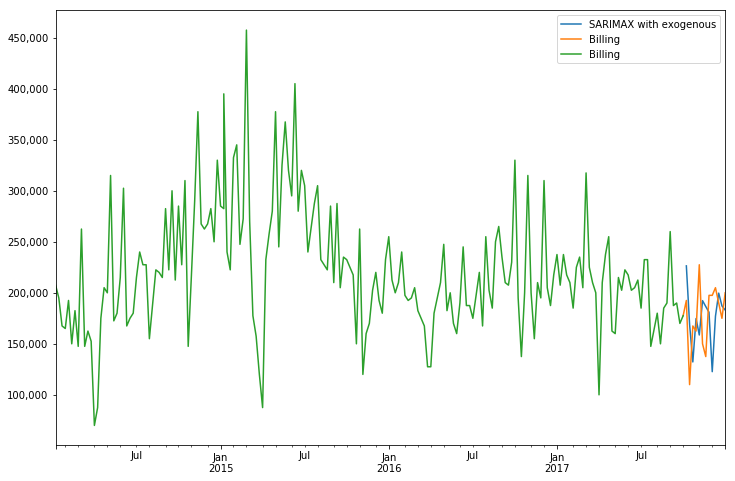

In [612]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test55['Billing'].plot(legend=True)
train55['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [608]:
error = rmse(test55['Billing'],predictions)
error

43274.52553314363

##### ARIMA forecast into the future

In [595]:
model = ARIMA(df55['Billing'],order=(0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:                     ARMA(0, 0)   Log Likelihood               -2508.500
Method:                           css   S.D. of innovations          59836.851
Date:                Mon, 30 May 2022   AIC                           5020.999
Time:                        18:32:28   BIC                           5027.616
Sample:                    12-31-2017   HQIC                          5023.677
                         - 01-12-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.19e+05   4210.106     52.023      0.000    2.11e+05    2.27e+05
==============================================================================
"""

In [596]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (1,1,1) FORECAST')

In [597]:
len(fcast)

13

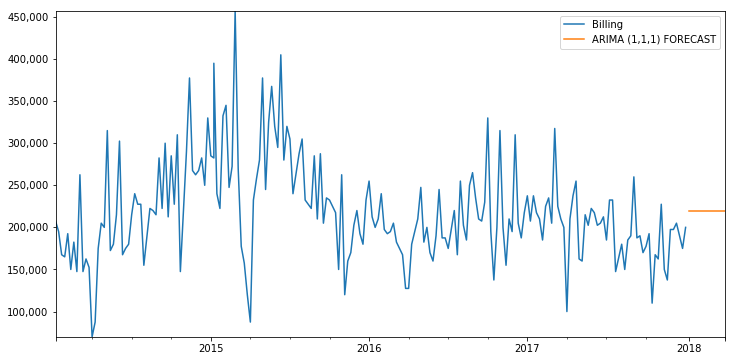

In [598]:
title = ''
ylabel = ''
xlabel = ''
ax = df55['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [567]:
model = SARIMAX(df55['Billing'],order=(3,1,1),seasonal_order=(0,0,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2467.824
Date:                Mon, 30 May 2022   AIC                           4945.648
Time:                        18:29:09   BIC                           4962.165
Sample:                    12-31-2017   HQIC                          4952.331
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2095      0.079      2.638      0.008       0.054       0.365
ar.L2          0.0101      0.096      0.105      0.916      -0.177       0.197
ar.L3          0.0340      0.085      0.402      0.688      -0.132       0.200
ma.L1         -0.8745      0.055    -15.812      0.000      -0.983      -0.766
sigma2      2.877e+09   1.66e-11   1.73e+20      0.000    2.88e+09    2.88e+09
===================================================================================
Ljung-Box (Q):                       51.43   Jarque-Bera (JB):                33.36
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.67e+35. Standard errors may be unstable.
"""

In [568]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [569]:
len(fcast)

13

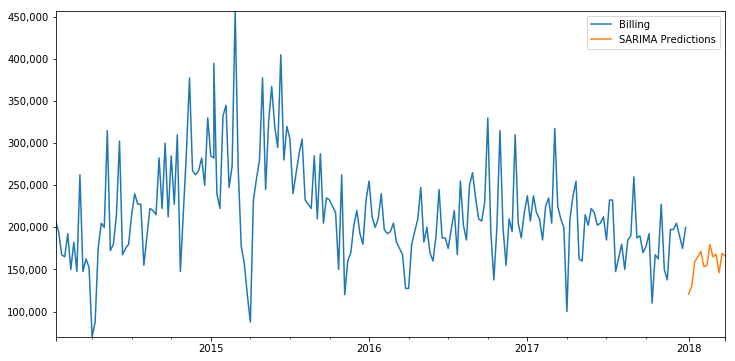

In [570]:
title = ''
ylabel = ''
xlabel = ''
ax = df55['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [402]:
len(df55.loc['2017-12-31':'2017-01-01'])

51

In [403]:
fcast.head()

2018-01-01/2018-01-07    120654.998874
2018-01-08/2018-01-14    137732.155656
2018-01-15/2018-01-21    155510.296765
2018-01-22/2018-01-28    164014.282445
2018-01-29/2018-02-04    169510.237710
Freq: W-SUN, Name: SARIMA Predictions, dtype: float64

##### SARIMAX forecast into the future

In [202]:
df55.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_55    201405           1   201404   
2014-01-27/2014-02-02  Product_55    201404           1   201403   
2014-01-20/2014-01-26  Product_55    201403           1   201402   
2014-01-13/2014-01-19  Product_55    201402           1   201401   
2014-01-06/2014-01-12  Product_55    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        162201  162201.0  192500.0  
2014-01-27/2014-02-02        185302  185302.0  165000.0  
2014-01-20/2014-01-26        192278  192278.0  167500.0  
2014-01-13/2014-01-19        191283  191283.0  195000.0  
2014-01-06/2014-01-12        158206  158206.0  207500.0

In [613]:
model = SARIMAX(df55['Billing'],exog=df55['Forecast'],order=(1,1,1),seasonal_order=(0,0,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2407.144
Date:                Mon, 30 May 2022   AIC                           4822.288
Time:                        18:35:39   BIC                           4835.461
Sample:                    12-31-2017   HQIC                          4827.619
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.7040      0.064     11.007      0.000       0.579       0.829
ar.L1         -0.0295      0.094     -0.314      0.754      -0.214       0.155
ma.L1         -0.8477      0.044    -19.181      0.000      -0.934      -0.761
sigma2      2.018e+09   5.69e-12   3.55e+20      0.000    2.02e+09    2.02e+09
===================================================================================
Ljung-Box (Q):                       69.68   Jarque-Bera (JB):                 5.99
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               1.82   Skew:                             0.18
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.87e+35. Standard errors may be unstable.
"""

In [614]:
exog_forecast = df55exo[:'2018-01-01'][['Forecast']]

In [615]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [616]:
len(fcast)

13

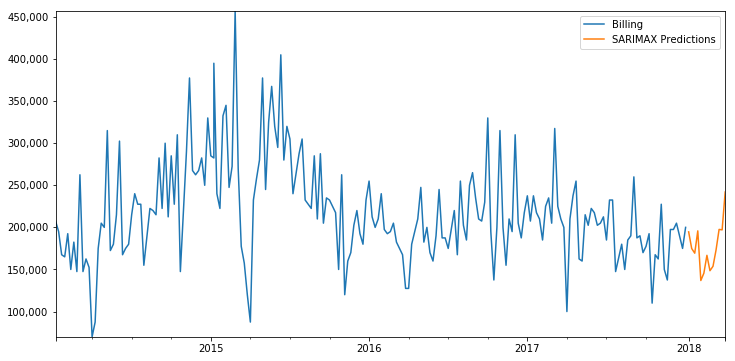

In [617]:
title = ''
ylabel = ''
xlabel = ''
ax = df55['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [618]:
fcast55 = _create_output(fcast,'Product_55')

## Product_57

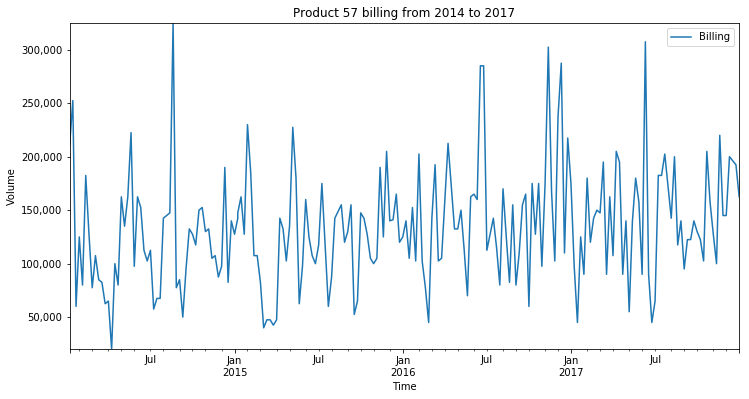

In [88]:
title = 'Product 57 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df57['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

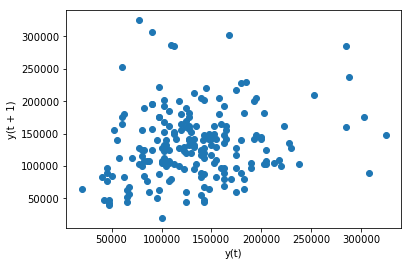

In [779]:
from pandas.plotting import lag_plot
lag_plot(df57['Billing'])

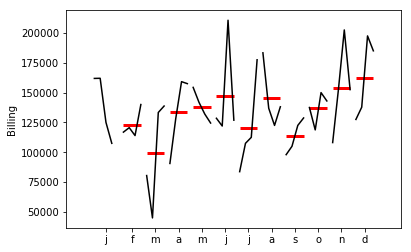

In [815]:
dfm = df57['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

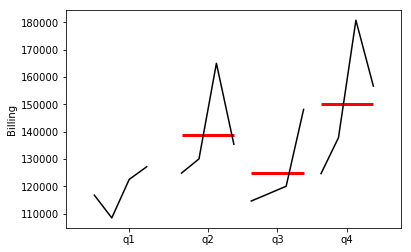

In [858]:
dfq = df57['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

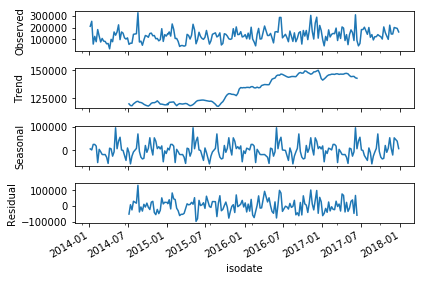

In [949]:
result = seasonal_decompose(df57['Billing'],model='add',freq=52)
result.plot();

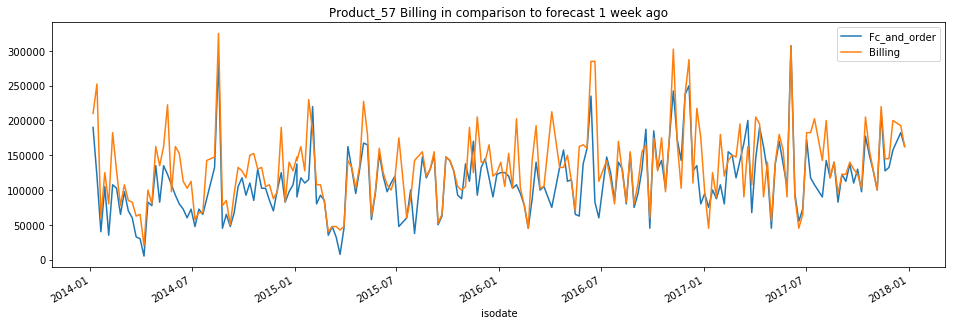

In [894]:
granger57_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_57 Billing in comparison to forecast 1 week ago');

In [929]:
MSE = mse(granger57_1['Fc_and_order'],granger57_1['Billing'])
RMSE = rmse(granger57_1['Fc_and_order'],granger57_1['Billing'])
MAE = meanabs(granger57_1['Fc_and_order'],granger57_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 1682817976.299
Client forecast RMSE: 41022.164
Client forecast  MAE: 26375.095


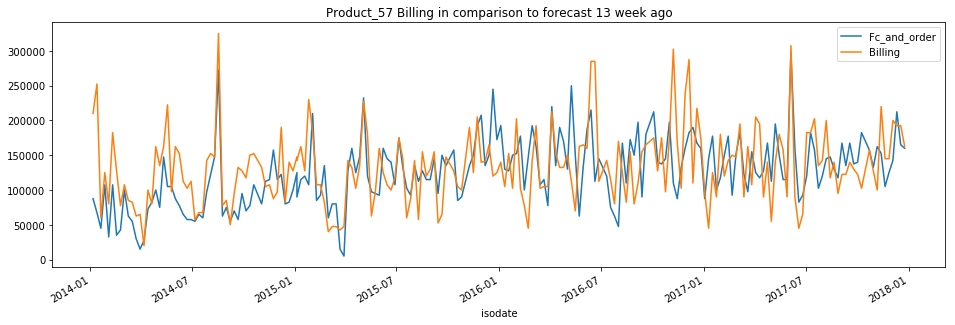

In [904]:
granger57_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_57 Billing in comparison to forecast 13 week ago');

In [930]:
MSE = mse(granger57_13['Fc_and_order'],granger57_13['Billing'])
RMSE = rmse(granger57_13['Fc_and_order'],granger57_13['Billing'])
MAE = meanabs(granger57_13['Fc_and_order'],granger57_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 2763299424.808
Client forecast RMSE: 52567.095
Client forecast  MAE: 40547.320


In [966]:
adf_test(df57['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.148080e+01
p-value                 5.000212e-21
# lags used             0.000000e+00
# observations          2.000000e+02
critical value (1%)    -3.463476e+00
critical value (5%)    -2.876102e+00
critical value (10%)   -2.574532e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [250]:
auto_arima(df57['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2458.078
Method:                       css-mle   S.D. of innovations          52000.296
Date:                Fri, 27 May 2022   AIC                           4924.157
Time:                        14:41:09   BIC                           4937.350
Sample:                             1   HQIC                          4929.496
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -194.3677     75.187     -2.585      0.010    -341.733     -47.003
ar.L1.D.y      0.1615      0.071      2.291      0.023       0.023       0.300
ma.L1.D.y     -1.0000      0.014    -73.898      0.000      -1.027      -0.973
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.1901           +0.0000j            6.1901            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [251]:
train57 = df57['2017-09-30':]
test57 = df57[:'2017-09-30']

In [252]:
model = ARIMA(train57['Billing'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  188
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2313.158
Method:                       css-mle   S.D. of innovations          52683.489
Date:                Fri, 27 May 2022   AIC                           4634.316
Time:                        14:41:16   BIC                           4647.261
Sample:                    09-24-2017   HQIC                          4639.561
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -181.0410     84.344     -2.146      0.033    -346.353     -15.729
ar.L1.D.Billing     0.1697      0.073      2.334      0.021       0.027       0.312
ma.L1.D.Billing    -1.0000      0.015    -68.149      0.000      -1.029      -0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.8929           +0.0000j            5.8929            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [253]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (1,1,1) Predictions')

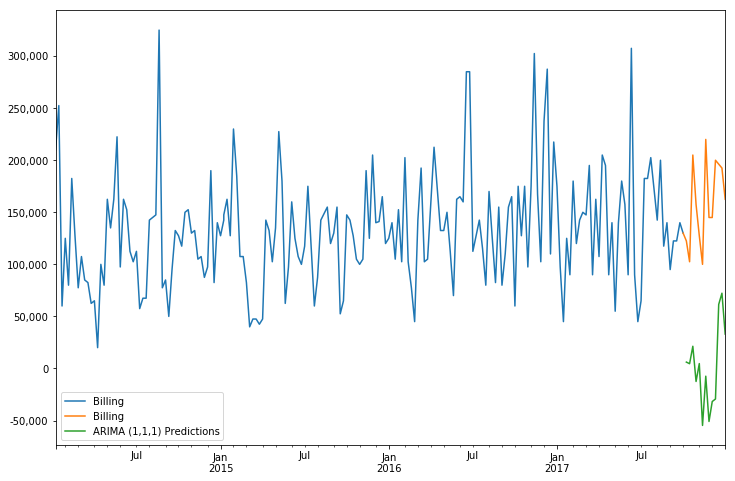

In [254]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train57['Billing'].plot(figsize=(12,8),legend=True)
test57['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [255]:
error = rmse(test57['Billing'],predictions)
error

166250.90593819835

In [256]:
auto_arima(df57['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2463.297
Date:                Fri, 27 May 2022   AIC                           4932.595
Time:                        14:44:16   BIC                           4942.490
Sample:                             0   HQIC                          4936.599
                                - 201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -173.0387     98.419     -1.758      0.079    -365.936      19.859
ma.L1         -0.9963      0.076    -13.043      0.000      -1.146      -0.847
sigma2      3.318e+09    1.2e-06   2.77e+15      0.000    3.32e+09    3.32e+09
===================================================================================
Ljung-Box (Q):                       39.88   Jarque-Bera (JB):                40.10
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.87
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.7e+31. Standard errors may be unstable.
"""

In [257]:
model = SARIMAX(train57['Billing'],order=(0,1,1),seasonal_order=(0,0,0,52),exog=train57['Fc_and_order'],enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  189
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2217.947
Date:                Fri, 27 May 2022   AIC                           4441.895
Time:                        14:44:39   BIC                           4451.572
Sample:                    10-01-2017   HQIC                          4445.816
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.8549      0.073     11.743      0.000       0.712       0.998
ma.L1           -1.0103      0.009   -109.892      0.000      -1.028      -0.992
sigma2        1.626e+09   1.15e-11   1.41e+20      0.000    1.63e+09    1.63e+09
===================================================================================
Ljung-Box (Q):                       54.70   Jarque-Bera (JB):               144.37
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.38
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.02e+35. Standard errors may be unstable.
"""

In [258]:
start = '2017-10-02'
end = '2017-12-31'

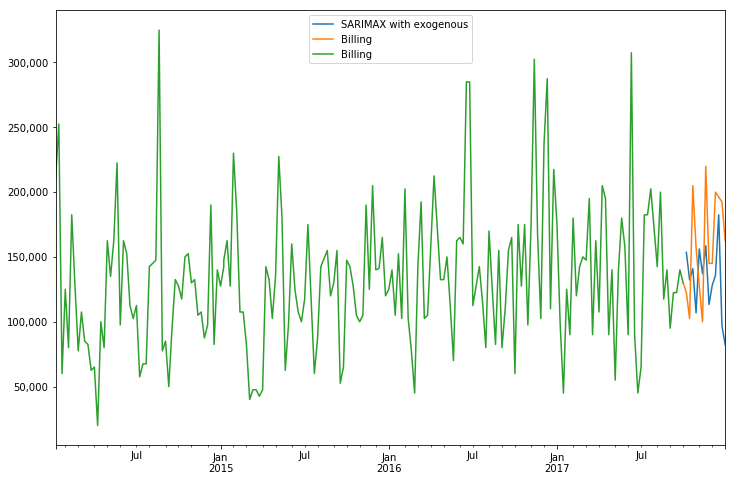

In [259]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test57['Billing'].plot(legend=True)
train57['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [260]:
error = rmse(test57['Billing'],predictions)
error

51332.18990636207

##### ARIMA forecast into the future

In [404]:
model = ARIMA(df57['Billing'],order=(1,1,1))
results = model.fit()
results.summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2458.078
Method:                       css-mle   S.D. of innovations          52000.296
Date:                Sun, 29 May 2022   AIC                           4924.157
Time:                        15:23:47   BIC                           4937.350
Sample:                    12-24-2017   HQIC                          4929.496
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -194.3677     75.187     -2.585      0.010    -341.733     -47.003
ar.L1.D.Billing     0.1615      0.071      2.291      0.023       0.023       0.300
ma.L1.D.Billing    -1.0000      0.014    -73.898      0.000      -1.027      -0.973
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.1901           +0.0000j            6.1901            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [405]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (1,1,1) FORECAST')

In [406]:
len(fcast)

13

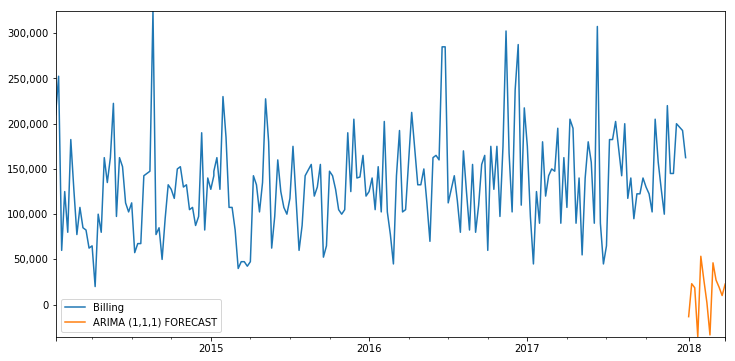

In [407]:
title = ''
ylabel = ''
xlabel = ''
ax = df57['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [408]:
model = SARIMAX(df57['Billing'],order=(0,1,1),seasonal_order=(0,0,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  201
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2464.655
Date:                Sun, 29 May 2022   AIC                           4933.311
Time:                        15:24:51   BIC                           4939.907
Sample:                    12-31-2017   HQIC                          4935.980
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9714      0.021    -46.327      0.000      -1.012      -0.930
sigma2      3.339e+09   5.45e-13   6.12e+21      0.000    3.34e+09    3.34e+09
===================================================================================
Ljung-Box (Q):                       39.72   Jarque-Bera (JB):                40.23
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.87
Prob(H) (two-sided):                  0.80   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [409]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [410]:
len(fcast)

13

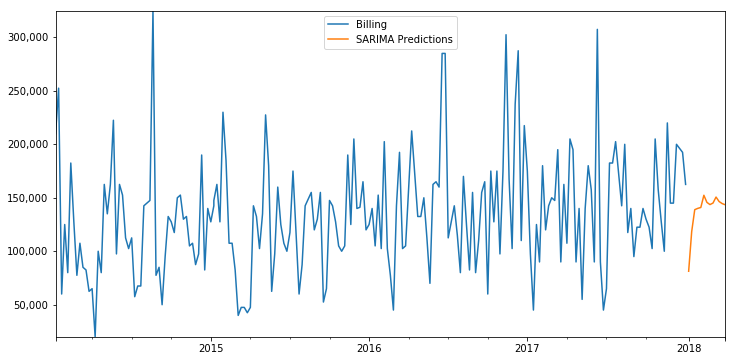

In [411]:
title = ''
ylabel = ''
xlabel = ''
ax = df57['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [412]:
len(df57.loc['2017-12-31':'2017-01-01'])

51

In [413]:
fcast.head()

2018-01-01/2018-01-07     81296.717134
2018-01-08/2018-01-14    118420.275892
2018-01-15/2018-01-21    138876.823357
2018-01-22/2018-01-28    140107.711502
2018-01-29/2018-02-04    140929.414203
Freq: W-SUN, Name: SARIMA Predictions, dtype: float64

##### SARIMAX forecast into the future

In [619]:
df57.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_57    201405           1   201404   
2014-01-27/2014-02-02  Product_57    201404           1   201403   
2014-01-20/2014-01-26  Product_57    201403           1   201402   
2014-01-13/2014-01-19  Product_57    201402           1   201401   
2014-01-06/2014-01-12  Product_57    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09         35000   35000.0   80000.0  
2014-01-27/2014-02-02        105000  105000.0  125000.0  
2014-01-20/2014-01-26         40000   40000.0   60000.0  
2014-01-13/2014-01-19        120000  120000.0  252500.0  
2014-01-06/2014-01-12        190000  190000.0  210000.0

In [620]:
model = SARIMAX(df57['Billing'],exog=df57['Forecast'],order=(0,1,1),seasonal_order=(0,0,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  201
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2358.029
Date:                Mon, 30 May 2022   AIC                           4722.059
Time:                        18:37:57   BIC                           4731.924
Sample:                    12-31-2017   HQIC                          4726.052
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.8572      0.063     13.583      0.000       0.734       0.981
ma.L1         -0.9766      0.022    -44.162      0.000      -1.020      -0.933
sigma2      1.558e+09   1.56e-11   9.98e+19      0.000    1.56e+09    1.56e+09
===================================================================================
Ljung-Box (Q):                       60.79   Jarque-Bera (JB):               185.79
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.46
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+35. Standard errors may be unstable.
"""

In [621]:
exog_forecast = df57exo[:'2018-01-01'][['Forecast']]

In [622]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [623]:
len(fcast)

13

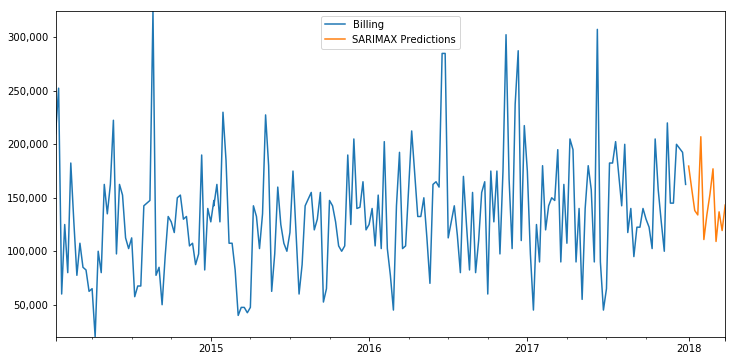

In [624]:
title = ''
ylabel = ''
xlabel = ''
ax = df57['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [625]:
fcast57 = _create_output(fcast,'Product_57')

## Product_67

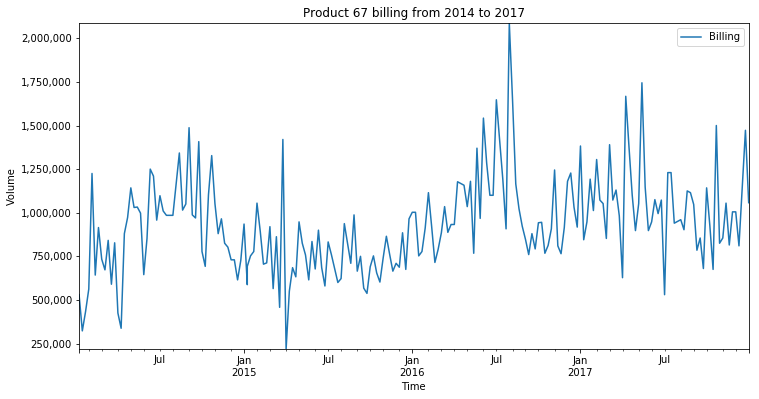

In [89]:
title = 'Product 67 billing from 2014 to 2017'
ylabel = 'Volume'
xlabel = 'Time'
ax = df67['Billing'].plot(figsize=(12,6),legend=True,title=title);
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

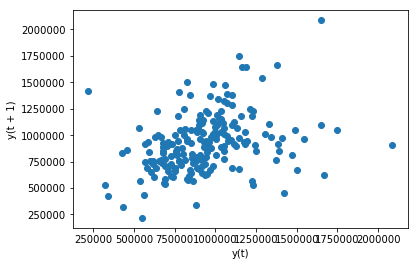

In [780]:
from pandas.plotting import lag_plot
lag_plot(df67['Billing'])

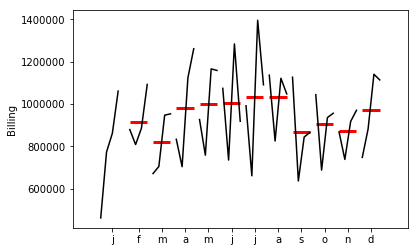

In [816]:
dfm = df67['Billing'].resample(rule='M').mean()
month_plot(dfm,ylabel='Billing');

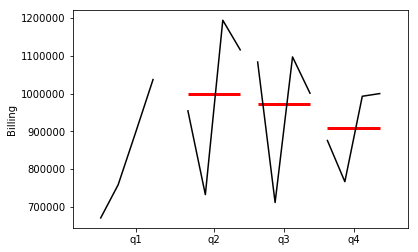

In [859]:
dfq = df67['Billing'].resample(rule='Q').mean()
quarter_plot(dfq,ylabel='Billing');

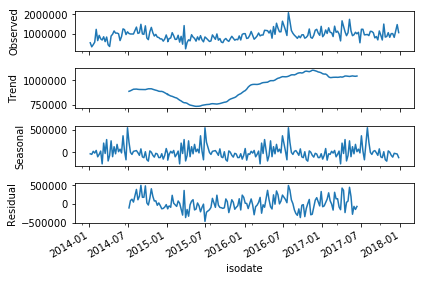

In [950]:
result = seasonal_decompose(df67['Billing'],model='add',freq=52)
result.plot();

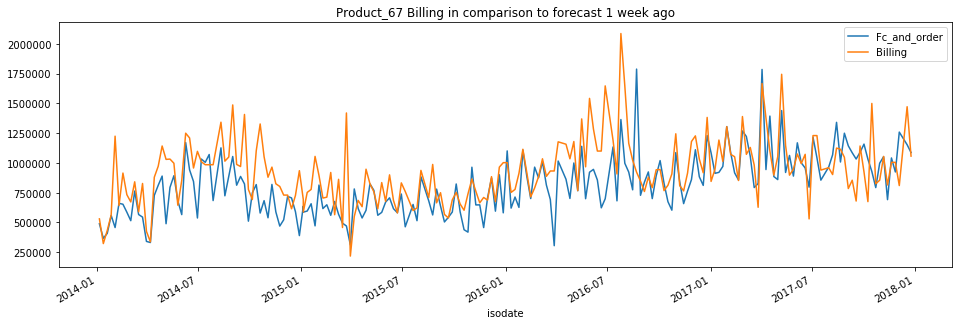

In [895]:
granger67_1[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_67 Billing in comparison to forecast 1 week ago');

In [932]:
MSE = mse(granger67_1['Fc_and_order'],granger67_1['Billing'])
RMSE = rmse(granger67_1['Fc_and_order'],granger67_1['Billing'])
MAE = meanabs(granger67_1['Fc_and_order'],granger67_1['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 68426835593.505
Client forecast RMSE: 261585.236
Client forecast  MAE: 186271.574


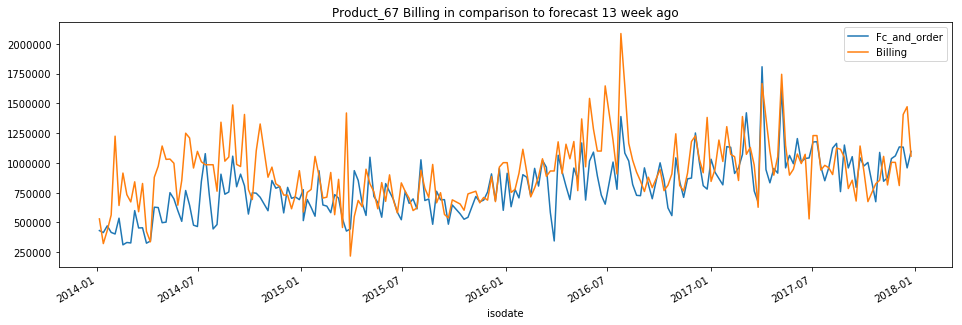

In [905]:
granger67_13[['Fc_and_order','Billing']].plot(figsize=(16,5),legend=True,title='Product_67 Billing in comparison to forecast 13 week ago');

In [933]:
MSE = mse(granger67_13['Fc_and_order'],granger67_13['Billing'])
RMSE = rmse(granger67_13['Fc_and_order'],granger67_13['Billing'])
MAE = meanabs(granger67_13['Fc_and_order'],granger67_13['Billing'])

print(f'Client forecast  MSE: {MSE:.3f}')
print(f'Client forecast RMSE: {RMSE:.3f}')
print(f'Client forecast  MAE: {MAE:.3f}')

Client forecast  MSE: 74647965181.892
Client forecast RMSE: 273217.798
Client forecast  MAE: 199227.133


In [967]:
adf_test(df67['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.514294
p-value                   0.112035
# lags used               4.000000
# observations          197.000000
critical value (1%)      -3.463987
critical value (5%)      -2.876326
critical value (10%)     -2.574652
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [626]:
auto_arima(df67['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2774.070
Method:                       css-mle   S.D. of innovations         237932.248
Date:                Mon, 30 May 2022   AIC                           5554.140
Time:                        18:38:48   BIC                           5564.049
Sample:                             1   HQIC                          5558.149
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2496.5310   3267.012     -0.764      0.446   -8899.756    3906.694
ma.L1.D.y     -0.8106      0.041    -19.854      0.000      -0.891      -0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2336           +0.0000j            1.2336            0.0000
-----------------------------------------------------------------------------
"""

In [627]:
train67 = df67['2017-09-30':]
test67 = df67[:'2017-09-30']

In [628]:
model = ARIMA(train67['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2607.072
Method:                       css-mle   S.D. of innovations         236190.322
Date:                Mon, 30 May 2022   AIC                           5220.144
Time:                        18:38:53   BIC                           5229.869
Sample:                    09-24-2017   HQIC                          5224.084
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2375.2307   3529.092     -0.673      0.502   -9292.123    4541.662
ma.L1.D.Billing    -0.7998      0.043    -18.463      0.000      -0.885      -0.715
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2504           +0.0000j            1.2504            0.0000
-----------------------------------------------------------------------------
"""

In [629]:
start = '2017-10-02'
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARIMA (0,1,1) Predictions')

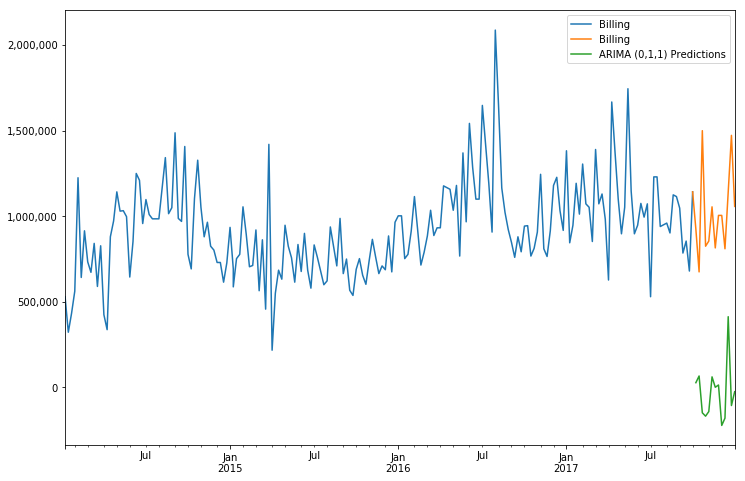

In [630]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ax = train67['Billing'].plot(figsize=(12,8),legend=True)
test67['Billing'].plot(legend=True)
predictions.plot(legend=True)

title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [266]:
error = rmse(test67['Billing'],predictions)
error

1088095.8812581906

In [631]:
auto_arima(df67['Billing'],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -2073.758
Date:                            Mon, 30 May 2022   AIC                           4163.516
Time:                                    18:43:09   BIC                           4187.547
Sample:                                         0   HQIC                          4173.279
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3820.6471   3.64e+04     -0.105      0.916   -7.51e+04    6.74e+04
ar.L1         -0.5676      0.097     -5.875      0.000      -0.757      -0.378
ar.L2         -0.3847      0.129     -2.993      0.003      -0.637      -0.133
ar.L3         -0.2931      0.144     -2.040      0.041      -0.575      -0.011
ar.L4         -0.0693      0.148     -0.467      0.641      -0.360       0.222
ar.S.L52      -0.6572      0.130     -5.054      0.000      -0.912      -0.402
ar.S.L104     -0.4057      0.110     -3.676      0.000      -0.622      -0.189
sigma2      9.771e+10      0.015   6.41e+12      0.000    9.77e+10    9.77e+10
===================================================================================
Ljung-Box (Q):                       23.02   Jarque-Bera (JB):                10.35
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               0.75   Skew:                             0.36
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.38e+33. Standard errors may be unstable.
"""

In [632]:
model = SARIMAX(train67['Billing'],order=(4,1,0),seasonal_order=(2,1,0,52),exog=train67['Fc_and_order'],enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -398.245
Date:                            Mon, 30 May 2022   AIC                            812.491
Time:                                    18:43:59   BIC                            823.429
Sample:                                10-01-2017   HQIC                           815.917
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.2197      0.491      0.447      0.655      -0.743       1.183
ar.L1           -0.4972      0.645     -0.771      0.441      -1.762       0.768
ar.L2           -0.0911      0.733     -0.124      0.901      -1.527       1.345
ar.L3           -0.2018      0.732     -0.276      0.783      -1.637       1.234
ar.L4            0.0721      0.666      0.108      0.914      -1.234       1.378
ar.S.L52        -0.4678      0.401     -1.165      0.244      -1.255       0.319
ar.S.L104       -0.3701      0.235     -1.574      0.115      -0.831       0.091
sigma2        8.319e+10   5.59e-12   1.49e+22      0.000    8.32e+10    8.32e+10
===================================================================================
Ljung-Box (Q):                       24.25   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.67   Prob(JB):                         0.39
Heteroskedasticity (H):               1.30   Skew:                            -0.51
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+38. Standard errors may be unstable.
"""

In [633]:
start = '2017-10-02'
end = '2017-12-31'

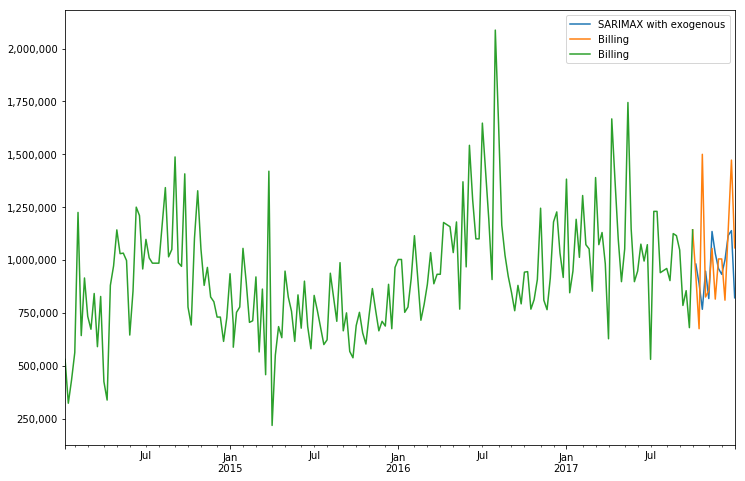

In [634]:
predictions = results.predict(start,end).rename('SARIMAX with exogenous')
ax = predictions.plot(figsize=(12,8),legend=True)
test67['Billing'].plot(legend=True)
train67['Billing'].plot(legend=True)

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = ''
ylabel=''
xlabel=''
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [271]:
error = rmse(test67['Billing'],predictions)
error

479392.8118739426

##### ARIMA forecast into the future

In [414]:
model = ARIMA(df67['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2774.081
Method:                       css-mle   S.D. of innovations         237945.504
Date:                Sun, 29 May 2022   AIC                           5554.161
Time:                        15:27:08   BIC                           5564.071
Sample:                    12-24-2017   HQIC                          5558.171
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2624.3779   3275.298     -0.801      0.424   -9043.844    3795.088
ma.L1.D.Billing    -0.8105      0.041    -19.833      0.000      -0.891      -0.730
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2338           +0.0000j            1.2338            0.0000
-----------------------------------------------------------------------------
"""

In [415]:
fcast = results.predict(start='2018-01-01',end='2018-04-01').rename('ARIMA (0,1,1) FORECAST')

In [416]:
len(fcast)

13

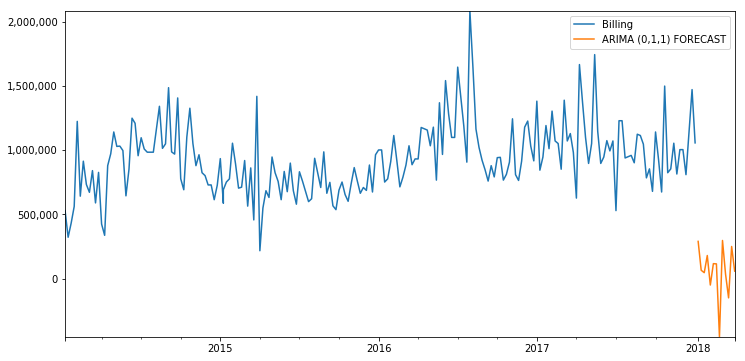

In [418]:
title = ''
ylabel = ''
xlabel = ''
ax = df67['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

##### SARIMA forecast into the future

In [436]:
model = SARIMAX(df67['Billing'],order=(4,0,0),seasonal_order=(2,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(4, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -2087.181
Date:                            Sun, 29 May 2022   AIC                           4188.363
Time:                                    15:35:17   BIC                           4209.437
Sample:                                12-31-2017   HQIC                          4196.925
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3709      0.094      3.959      0.000       0.187       0.555
ar.L2          0.0953      0.140      0.682      0.495      -0.179       0.369
ar.L3          0.0914      0.149      0.612      0.541      -0.201       0.384
ar.L4          0.2055      0.143      1.442      0.149      -0.074       0.485
ar.S.L52      -0.6144      0.139     -4.432      0.000      -0.886      -0.343
ar.S.L104     -0.3614      0.105     -3.429      0.001      -0.568      -0.155
sigma2      9.674e+10   3.35e-13   2.89e+23      0.000    9.67e+10    9.67e+10
===================================================================================
Ljung-Box (Q):                       21.40   Jarque-Bera (JB):                11.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.47
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+39. Standard errors may be unstable.
"""

In [437]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

In [438]:
len(fcast)

13

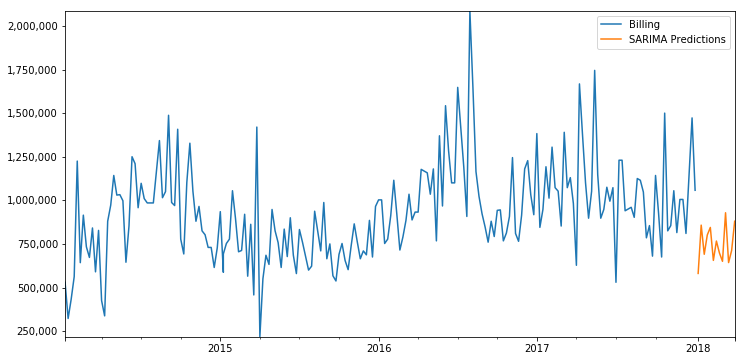

In [439]:
title = ''
ylabel = ''
xlabel = ''
ax = df67['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [440]:
len(df67.loc['2017-12-31':'2017-01-01'])

51

In [441]:
fcast.head()

2018-01-01/2018-01-07    580813.482311
2018-01-08/2018-01-14    857723.826429
2018-01-15/2018-01-21    690629.967773
2018-01-22/2018-01-28    801223.856696
2018-01-29/2018-02-04    844477.115200
Freq: W-SUN, Name: SARIMA Predictions, dtype: float64

##### SARIMAX forecast into the future

In [161]:
df67.tail()

Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2014-02-03/2014-02-09  Product_20    201405           1   201404   
2014-01-27/2014-02-02  Product_20    201404           1   201403   
2014-01-20/2014-01-26  Product_20    201403           1   201402   
2014-01-13/2014-01-19  Product_20    201402           1   201401   
2014-01-06/2014-01-12  Product_20    201401           1   201352   

                       Fc_and_order  Forecast   Billing  
isodate                                                  
2014-02-03/2014-02-09        414438  414438.0  432000.0  
2014-01-27/2014-02-02        549350  549350.0  568000.0  
2014-01-20/2014-01-26        759243  759243.0  788000.0  
2014-01-13/2014-01-19        644972  644972.0  752000.0  
2014-01-06/2014-01-12        523579  523579.0  628000.0

In [635]:
model = SARIMAX(df67['Billing'],exog=df67['Forecast'],order=(4,1,0),seasonal_order=(2,1,0,52),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  202
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -564.189
Date:                            Mon, 30 May 2022   AIC                           1144.377
Time:                                    18:45:27   BIC                           1158.086
Sample:                                12-31-2017   HQIC                          1149.369
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Forecast       0.5757      0.330      1.746      0.081      -0.070       1.222
ar.L1         -0.6423      0.489     -1.314      0.189      -1.600       0.315
ar.L2         -0.3355      0.578     -0.580      0.562      -1.469       0.798
ar.L3         -0.3321      0.478     -0.694      0.488      -1.270       0.605
ar.L4          0.0384      0.469      0.082      0.935      -0.882       0.959
ar.S.L52      -0.4592      0.265     -1.734      0.083      -0.978       0.060
ar.S.L104     -0.4020      0.246     -1.636      0.102      -0.884       0.080
sigma2       8.42e+10   2.77e-12   3.04e+22      0.000    8.42e+10    8.42e+10
===================================================================================
Ljung-Box (Q):                       41.90   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.39   Prob(JB):                         0.77
Heteroskedasticity (H):               1.06   Skew:                            -0.03
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+40. Standard errors may be unstable.
"""

In [636]:
exog_forecast = df67exo[:'2018-01-01'][['Forecast']]

In [637]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels',exog=exog_forecast).rename('SARIMAX Predictions')

In [638]:
len(fcast)

13

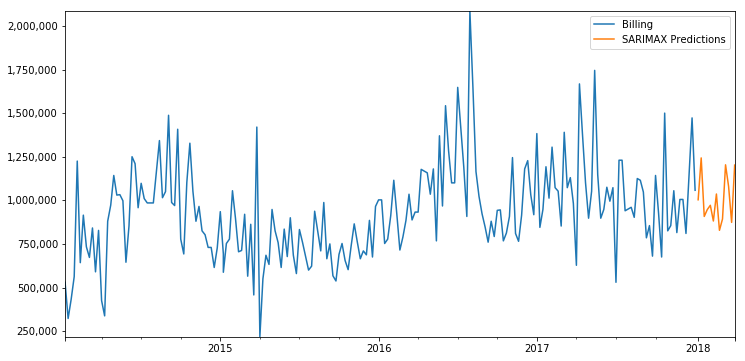

In [639]:
title = ''
ylabel = ''
xlabel = ''
ax = df67['Billing'].plot(figsize=(12,6),legend=True,title=title);
fcast.plot(legend=True)
ax.autoscale(axis='both',tight=True);
ax.set(xlabel=xlabel,ylabel=ylabel);

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter);

In [640]:
fcast67 = _create_output(fcast,'Product_67')

# EXPORT Q1 VALUES IN EXCEL FILE

In [641]:
save_forecast ([fcast19,fcast20,fcast22,fcast30,fcast39,fcast48,fcast50,fcast55,fcast57,fcast67])

SUCCESSFULLY SAVED IN C:\Users\tammo\OneDrive\Desktop\FC\FORECAST_2018_Q1.xlsx
